In [1]:
import functions as fn
import pandas as pd
from importlib import reload
from tqdm import tqdm
from termcolor import colored
import matplotlib.pyplot as plt
from ooipy.tools import ooiplotlib as ooiplt
import datetime

In [2]:
import sys, os

# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.__stdout__

In [3]:
df = pd.read_csv('E:/Acer backup 3/internships and jobs/UW/Reader grader and TA/Shima Abadi/Data/Offshore/ais_oregon_self_offshore_V1.csv',sep = ',')


In [9]:
df.columns

Index(['Unnamed: 0', 'MMSI', 'IMO', 'VESSEL NAME', 'VESSEL TYPE', 'LENGTH',
       'STATUS', 'SPEED (KNOTSx10)', 'LON', 'LAT', 'COURSE', 'HEADING',
       'TIMESTAMP UTC', 'oregon_shelf_Lat', 'oregon_shelf_Lon',
       'oregon_shelf_Loc', 'oregon_offshore_Lat', 'oregon_offshore_Lon',
       'oregon_offshore_Loc', 'ship_Loc', 'distance(in km) oregon offshore',
       'distance(in km) oregon shelf'],
      dtype='object')

In [5]:
df['TIMESTAMP UTC']=df['TIMESTAMP UTC'].astype('datetime64[ns]')


In [6]:
min_duration=10
path_to_write='E:/Acer backup 3/internships and jobs/UW/Reader grader and TA/Shima Abadi/Data/Benchmark_data/'

In [14]:
reload(fn)

<module 'functions' from 'C:\\Users\\khirod\\Documents\\GitHub\\Ocean-data-analysis\\functions.py'>

In [15]:
def get_benchmark_data(df,hydrophone_idx,inner_rad,outer_rad,min_duration,fmin=10,fmax=90,get_acoustic=True,get_spectrogram=True):
    
    if hydrophone_idx==1:
        hydro='Oregon_offshore'
    elif hydrophone_idx==2:
        hydro='Oregon_shelf'
    suffix=str(inner_rad)+'_'+ str(outer_rad)+'.csv'
    ais=fn.choose_df_oregon(df,hydrophone_idx)
    isolated_ships=fn.get_isolated_ships(ais,inner_rad,outer_rad,min_duration)
    isolated_ships.to_csv(path_to_write+hydro+'/isolated_ships_' + suffix)
    isolated_ais=fn.isolated_ais(ais,isolated_ships,inner_rad)
    isolated_ais.to_csv(path_to_write+hydro+'/isolated_ais_'+ suffix)
    
    if get_acoustic==True:
        print('Saving wav files')
        for i in tqdm(range(len(isolated_ships))):
            min_time=isolated_ships.start_time[i]
            max_time=isolated_ships.end_time[i]
            hydrophone_data=fn.get_acoustic(hydrophone_idx,min_time,max_time,fmin=fmin,fmax=fmax)
            if hydrophone_data==None:
                # print('data trace is none. Continuing to next')
                pass
            else:
                hydrophone_data.wav_write(filename=path_to_write+hydro+'/Audio'+'/isolated_ships_'+str(inner_rad)+'_'+ str(outer_rad)+'_'+str(i)+'.wav')
    if get_spectrogram==True:
        print('Saving spectrograms')
        for i in tqdm(range(len(isolated_ships))):
            min_time=isolated_ships.start_time[i]
            max_time=isolated_ships.end_time[i]
            spectrogram=fn.get_spectrogram_data(hydrophone_idx,min_time,max_time,fmin=fmin,fmax=fmax)
            if (spectrogram==None):
                # print('data trace is none. Continuing to next')
                pass
            else:
                if (spectrogram.values.shape[0]<2) | (spectrogram.values.shape[1]<2):
                    pass
                else:
                    #spectrogram.visualize(save_spec=True,plot_spec=False,filename=path_to_write+hydro+'/Spectrogram'+'/isolated_ships_'+str(inner_rad)+'_'+ str(outer_rad)+'_'+str(i)+'.png')
                    ooiplt.plot_spectrogram(spectrogram,plot=False,save=True,fmin=fmin,fmax=fmax,filename=path_to_write+hydro+'/Spectrogram'+'/isolated_ships_'+str(inner_rad)+'_'+ str(outer_rad)+'_'+str(i)+'.png')
    return isolated_ships,isolated_ais

## Creating benchmark data for Axial Base

### inner rad=10, outer_rad=30

In [17]:

d1,d2=get_benchmark_data(df,1,10,30,min_duration,get_acoustic=False,get_spectrogram=False)

 Max distance: 86.26 and Min distance: 0.0


100%|██████████████████████████████████████████████████████████████████████████████| 2462/2462 [01:34<00:00, 26.10it/s]


['Bulk Carrier',
 'Container Ship',
 'General Cargo',
 'Oil/Chemical Tanker',
 'Vehicles Carrier',
 'Cable Layer',
 'Cargo/Containership',
 'Heavy Load Carrier',
 'Passengers Ship',
 'Chemical Tanker',
 'Ro-Ro Cargo',
 'Inland Ro-Ro Cargo Ship',
 'Tug',
 'Special Vessel',
 'Trawler',
 'Fishing Vessel',
 'Towing Vessel',
 'Law Enforce',
 'Icebreaker',
 'Research/Survey Vessel',
 'Heavy Lift Vessel',
 'Passenger Ship',
 'Yacht',
 'Self Discharging Bulk Carrier',
 'Cargo',
 'Ro-Ro/Passenger Ship',
 'Fishing',
 'Sailing Vessel',
 'Fishery Research Vessel',
 'Patrol Vessel',
 'Military Ops',
 'Pleasure Craft',
 'Fish Factory',
 'Unspecified',
 'Replenishment Vessel',
 'Other',
 'Factory Trawler',
 'Logistics Naval Vessel',
 'Hopper Dredger',
 'Drill Ship',
 'SAR',
 'Offshore Supply Ship',
 'Inland, Unknown',
 'Wood Chips Carrier',
 'Crude Oil Tanker',
 'Tanker',
 'Oil Products Tanker']

### inner rad=5, outer_rad=30

In [16]:
d1,d2=get_benchmark_data(df,1,5,30,min_duration,get_acoustic=False)

NameError: name 'get_bechmark_data' is not defined

In [101]:
d1.head()

,MMSI,time_min,time_max,count,VESSEL TYPE,len_of_recording
0,210059000,2016-11-25 22:49:56,2016-11-25 23:02:56,2,Bulk Carrier,13.000000
1,212250000,2016-04-01 18:58:25,2016-04-01 19:22:08,3,Bulk Carrier,23.716667
2,212482000,2020-09-24 19:41:45,2020-09-24 19:57:23,5,Bulk Carrier,15.633333
3,220518000,2018-01-20 21:28:28,2018-01-20 22:07:29,3,Oil Products Tanker,39.016667
4,249666000,2019-04-19 04:21:58,2019-04-19 04:36:30,6,Passenger Ship,14.533333


## Creating benchmark data for Central Caldera

### inner rad=10, outer_rad=30

In [48]:
d1,d2=get_benchmark_data(df,2,10,30,min_duration,get_acoustic=False)

 Max distance: 168.72 and Min distance: 0.02


100%|████████████████████████████████████████████████████████████████████████████████| 613/613 [00:14<00:00, 43.39it/s]


Saving spectrograms


  0%|                                                                                          | 0/613 [00:00<?, ?it/s]

OO.AXCC1.AXCC1.HDH | 2016-12-23T12:32:31.000000Z - 2016-12-23T12:42:31.000000Z | 200.0 Hz, 120001 samples


  0%|▏                                                                                 | 1/613 [00:01<18:50,  1.85s/it]

OO.AXCC1.AXCC1.HDH | 2019-12-28T00:15:40.000000Z - 2019-12-28T00:25:40.000000Z | 200.0 Hz, 120001 samples


  0%|▎                                                                                 | 2/613 [00:04<20:42,  2.03s/it]

OO.AXCC1.AXCC1.HDH | 2018-01-30T03:18:49.000000Z - 2018-01-30T03:28:49.000000Z | 200.0 Hz, 120001 samples


  0%|▍                                                                                 | 3/613 [00:05<19:43,  1.94s/it]

OO.AXCC1.AXCC1.HDH | 2019-11-21T13:36:30.000000Z - 2019-11-21T13:46:30.000000Z | 200.0 Hz, 120001 samples


  1%|▌                                                                                 | 4/613 [00:08<21:13,  2.09s/it]

OO.AXCC1.AXCC1.HDH | 2018-02-14T19:13:16.000000Z - 2018-02-14T19:23:16.000000Z | 200.0 Hz, 120001 samples


  1%|▋                                                                                 | 5/613 [00:10<20:59,  2.07s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-31T19:31:37.000000Z - 2018-07-31T19:41:37.000000Z | 200.0 Hz, 120001 samples


  1%|▊                                                                                 | 6/613 [00:12<20:10,  1.99s/it]

OO.AXCC1.AXCC1.HDH | 2016-05-22T03:52:18.000000Z - 2016-05-22T04:02:18.000000Z | 200.0 Hz, 120001 samples


  1%|▉                                                                                 | 7/613 [00:14<21:54,  2.17s/it]

OO.AXCC1.AXCC1.HDH | 2017-02-05T14:38:01.000000Z - 2017-02-05T14:48:01.000000Z | 200.0 Hz, 120001 samples


  1%|█                                                                                 | 8/613 [00:16<20:51,  2.07s/it]

OO.AXCC1.AXCC1.HDH | 2016-12-15T16:35:17.000000Z - 2016-12-15T16:45:17.000000Z | 200.0 Hz, 120001 samples


  1%|█▏                                                                                | 9/613 [00:18<21:04,  2.09s/it]

OO.AXCC1.AXCC1.HDH | 2015-11-30T20:41:26.000000Z - 2015-11-30T20:51:26.000000Z | 200.0 Hz, 120001 samples


  2%|█▎                                                                               | 10/613 [00:20<20:20,  2.02s/it]

OO.AXCC1.AXCC1.HDH | 2016-01-14T06:43:00.000000Z - 2016-01-14T06:53:00.000000Z | 200.0 Hz, 120001 samples


  2%|█▍                                                                               | 11/613 [00:22<20:00,  1.99s/it]

OO.AXCC1.AXCC1.HDH | 2019-10-22T01:14:38.000000Z - 2019-10-22T01:24:38.000000Z | 200.0 Hz, 120001 samples


  2%|█▌                                                                               | 12/613 [00:24<21:06,  2.11s/it]

OO.AXCC1.AXCC1.HDH | 2020-11-09T07:19:42.000000Z - 2020-11-09T07:29:42.000000Z | 200.0 Hz, 120001 samples


  2%|█▋                                                                               | 13/613 [00:26<21:13,  2.12s/it]

OO.AXCC1.AXCC1.HDH | 2017-12-10T15:52:45.000000Z - 2017-12-10T16:02:45.000000Z | 200.0 Hz, 120001 samples


  2%|█▊                                                                               | 14/613 [00:28<20:14,  2.03s/it]

OO.AXCC1.AXCC1.HDH | 2015-10-29T16:28:17.000000Z - 2015-10-29T16:38:17.000000Z | 200.0 Hz, 120001 samples


  2%|█▉                                                                               | 15/613 [00:30<20:20,  2.04s/it]

OO.AXCC1.AXCC1.HDH | 2016-04-29T19:33:50.000000Z - 2016-04-29T19:43:50.000000Z | 200.0 Hz, 120001 samples


  3%|██                                                                               | 16/613 [00:33<21:14,  2.14s/it]

OO.AXCC1.AXCC1.HDH | 2015-09-21T22:38:24.000000Z - 2015-09-21T22:48:24.000000Z | 200.0 Hz, 120001 samples


  3%|██▏                                                                              | 17/613 [00:35<20:47,  2.09s/it]

OO.AXCC1.AXCC1.HDH | 2018-02-22T06:56:32.000000Z - 2018-02-22T07:06:32.000000Z | 200.0 Hz, 120001 samples


  3%|██▍                                                                              | 18/613 [00:37<20:20,  2.05s/it]

OO.AXCC1.AXCC1.HDH | 2016-02-12T11:27:01.000000Z - 2016-02-12T11:37:01.000000Z | 200.0 Hz, 120001 samples


  3%|██▌                                                                              | 19/613 [00:39<20:36,  2.08s/it]

OO.AXCC1.AXCC1.HDH | 2020-12-16T03:57:35.000000Z - 2020-12-16T04:07:35.000000Z | 200.0 Hz, 120001 samples


  3%|██▋                                                                              | 20/613 [00:41<20:07,  2.04s/it]

OO.AXCC1.AXCC1.HDH | 2019-02-20T07:59:24.000000Z - 2019-02-20T08:09:24.000000Z | 200.0 Hz, 120001 samples


  3%|██▊                                                                              | 21/613 [00:43<19:34,  1.98s/it]

OO.AXCC1.AXCC1.HDH | 2017-03-16T14:09:12.000000Z - 2017-03-16T14:19:12.000000Z | 200.0 Hz, 120001 samples


  4%|██▉                                                                              | 22/613 [00:44<18:35,  1.89s/it]

OO.AXCC1.AXCC1.HDH | 2020-11-22T20:26:37.000000Z - 2020-11-22T20:36:37.000000Z | 200.0 Hz, 120001 samples


  4%|███                                                                              | 23/613 [00:46<19:07,  1.94s/it]

OO.AXCC1.AXCC1.HDH | 2016-01-16T07:32:44.000000Z - 2016-01-16T07:42:44.000000Z | 200.0 Hz, 120001 samples


  4%|███▏                                                                             | 24/613 [00:48<18:39,  1.90s/it]

OO.AXCC1.AXCC1.HDH | 2016-11-26T04:14:46.000000Z - 2016-11-26T04:24:46.000000Z | 200.0 Hz, 120001 samples


  4%|███▎                                                                             | 25/613 [00:50<18:08,  1.85s/it]

OO.AXCC1.AXCC1.HDH | 2020-07-07T12:26:12.000000Z - 2020-07-07T12:36:12.000000Z | 200.0 Hz, 120001 samples


  4%|███▍                                                                             | 26/613 [00:52<18:04,  1.85s/it]

OO.AXCC1.AXCC1.HDH | 2016-03-04T05:55:14.000000Z - 2016-03-04T06:05:14.000000Z | 200.0 Hz, 120001 samples


  4%|███▌                                                                             | 27/613 [00:54<18:06,  1.85s/it]

OO.AXCC1.AXCC1.HDH | 2018-03-05T10:53:25.000000Z - 2018-03-05T11:03:25.000000Z | 200.0 Hz, 120001 samples


  5%|███▋                                                                             | 28/613 [00:56<19:33,  2.01s/it]

OO.AXCC1.AXCC1.HDH | 2016-12-24T22:59:40.000000Z - 2016-12-24T23:09:40.000000Z | 200.0 Hz, 120001 samples


  5%|███▊                                                                             | 29/613 [00:58<20:22,  2.09s/it]

OO.AXCC1.AXCC1.HDH | 2020-08-21T00:21:14.000000Z - 2020-08-21T00:31:14.000000Z | 200.0 Hz, 120001 samples


  5%|███▉                                                                             | 30/613 [01:00<20:31,  2.11s/it]

OO.AXCC1.AXCC1.HDH | 2016-09-02T15:08:54.000000Z - 2016-09-02T15:18:54.000000Z | 200.0 Hz, 120001 samples


  5%|████                                                                             | 31/613 [01:02<19:31,  2.01s/it]

OO.AXCC1.AXCC1.HDH | 2020-03-07T10:24:10.000000Z - 2020-03-07T10:34:10.000000Z | 200.0 Hz, 120001 samples


  5%|████▏                                                                            | 32/613 [01:04<19:02,  1.97s/it]

OO.AXCC1.AXCC1.HDH | 2019-10-15T02:54:40.000000Z - 2019-10-15T03:04:40.000000Z | 200.0 Hz, 120001 samples


  5%|████▎                                                                            | 33/613 [01:06<18:44,  1.94s/it]

OO.AXCC1.AXCC1.HDH | 2018-06-10T00:18:57.000000Z - 2018-06-10T00:28:57.000000Z | 200.0 Hz, 120001 samples


  6%|████▍                                                                            | 34/613 [01:08<19:04,  1.98s/it]

OO.AXCC1.AXCC1.HDH | 2018-06-19T06:33:43.000000Z - 2018-06-19T06:43:43.000000Z | 200.0 Hz, 120001 samples


  6%|████▌                                                                            | 35/613 [01:10<19:10,  1.99s/it]

OO.AXCC1.AXCC1.HDH | 2018-09-02T04:29:53.000000Z - 2018-09-02T04:39:53.000000Z | 200.0 Hz, 120001 samples


  6%|████▊                                                                            | 36/613 [01:12<19:38,  2.04s/it]

OO.AXCC1.AXCC1.HDH | 2019-09-26T07:56:00.000000Z - 2019-09-26T08:06:00.000000Z | 200.0 Hz, 120001 samples


  6%|████▉                                                                            | 37/613 [01:14<19:37,  2.04s/it]

OO.AXCC1.AXCC1.HDH | 2020-06-05T10:38:57.000000Z - 2020-06-05T10:48:57.000000Z | 200.0 Hz, 120001 samples


  6%|█████                                                                            | 38/613 [01:17<20:34,  2.15s/it]

OO.AXCC1.AXCC1.HDH | 2015-10-15T03:38:00.000000Z - 2015-10-15T03:48:00.000000Z | 200.0 Hz, 120001 samples


  6%|█████▏                                                                           | 39/613 [01:18<19:37,  2.05s/it]

OO.AXCC1.AXCC1.HDH | 2016-03-31T14:27:27.000000Z - 2016-03-31T14:37:27.000000Z | 200.0 Hz, 120001 samples


  7%|█████▎                                                                           | 40/613 [01:20<19:01,  1.99s/it]

OO.AXCC1.AXCC1.HDH | 2016-09-14T19:20:12.000000Z - 2016-09-14T19:30:12.000000Z | 200.0 Hz, 120001 samples


  7%|█████▍                                                                           | 41/613 [01:22<19:13,  2.02s/it]

OO.AXCC1.AXCC1.HDH | 2017-08-28T04:30:49.000000Z - 2017-08-28T04:40:49.000000Z | 200.0 Hz, 120001 samples


  7%|█████▌                                                                           | 42/613 [01:24<19:06,  2.01s/it]

OO.AXCC1.AXCC1.HDH | 2019-03-29T22:19:46.000000Z - 2019-03-29T22:29:46.000000Z | 200.0 Hz, 120001 samples


  7%|█████▋                                                                           | 43/613 [01:26<18:35,  1.96s/it]

OO.AXCC1.AXCC1.HDH | 2018-10-18T16:07:59.000000Z - 2018-10-18T16:17:59.000000Z | 200.0 Hz, 120001 samples


  7%|█████▊                                                                           | 44/613 [01:28<18:55,  2.00s/it]

OO.AXCC1.AXCC1.HDH | 2015-01-30T14:15:43.000000Z - 2015-01-30T14:25:43.000000Z | 200.0 Hz, 120001 samples


  7%|█████▉                                                                           | 45/613 [01:30<18:35,  1.96s/it]

OO.AXCC1.AXCC1.HDH | 2015-12-29T07:38:27.000000Z - 2015-12-29T07:48:27.000000Z | 200.0 Hz, 120001 samples


  8%|██████                                                                           | 46/613 [01:33<20:04,  2.12s/it]

OO.AXCC1.AXCC1.HDH | 2019-09-20T12:17:39.000000Z - 2019-09-20T12:27:39.000000Z | 200.0 Hz, 120001 samples


  8%|██████▏                                                                          | 47/613 [01:35<20:43,  2.20s/it]

OO.AXCC1.AXCC1.HDH | 2016-04-20T16:28:57.000000Z - 2016-04-20T16:38:57.000000Z | 200.0 Hz, 120001 samples


  8%|██████▎                                                                          | 48/613 [01:37<20:46,  2.21s/it]

OO.AXCC1.AXCC1.HDH | 2019-12-19T12:42:43.000000Z - 2019-12-19T12:52:43.000000Z | 200.0 Hz, 120001 samples


  8%|██████▍                                                                          | 49/613 [01:39<19:32,  2.08s/it]

  8%|██████▌                                                                          | 50/613 [01:42<20:50,  2.22s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2018-01-28T18:54:55.000000Z - 2018-01-28T19:04:55.000000Z | 200.0 Hz, 120001 samples


  8%|██████▋                                                                          | 51/613 [01:43<19:36,  2.09s/it]

OO.AXCC1.AXCC1.HDH | 2018-03-03T13:01:35.000000Z - 2018-03-03T13:11:35.000000Z | 200.0 Hz, 120001 samples


  8%|██████▊                                                                          | 52/613 [01:45<19:11,  2.05s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-06T05:01:13.000000Z - 2017-07-06T05:11:13.000000Z | 200.0 Hz, 120001 samples


  9%|███████                                                                          | 53/613 [01:47<19:24,  2.08s/it]

OO.AXCC1.AXCC1.HDH | 2020-12-04T05:41:21.000000Z - 2020-12-04T05:51:21.000000Z | 200.0 Hz, 120001 samples


  9%|███████▏                                                                         | 54/613 [01:49<19:12,  2.06s/it]

OO.AXCC1.AXCC1.HDH | 2015-11-02T11:24:14.000000Z - 2015-11-02T11:34:14.000000Z | 200.0 Hz, 120001 samples


  9%|███████▎                                                                         | 55/613 [01:51<18:58,  2.04s/it]

OO.AXCC1.AXCC1.HDH | 2018-02-21T05:34:40.000000Z - 2018-02-21T05:44:40.000000Z | 200.0 Hz, 120001 samples


  9%|███████▍                                                                         | 56/613 [01:53<18:29,  1.99s/it]

OO.AXCC1.AXCC1.HDH | 2017-02-13T08:30:46.000000Z - 2017-02-13T08:40:46.000000Z | 200.0 Hz, 120001 samples


  9%|███████▌                                                                         | 57/613 [01:56<19:08,  2.06s/it]

OO.AXCC1.AXCC1.HDH | 2019-08-14T05:29:04.000000Z - 2019-08-14T05:39:04.000000Z | 200.0 Hz, 120001 samples


  9%|███████▋                                                                         | 58/613 [01:58<19:34,  2.12s/it]

OO.AXCC1.AXCC1.HDH | 2019-02-07T20:17:45.000000Z - 2019-02-07T20:27:45.000000Z | 200.0 Hz, 120001 samples


 10%|███████▊                                                                         | 59/613 [02:00<20:03,  2.17s/it]

OO.AXCC1.AXCC1.HDH | 2017-10-01T23:54:40.000000Z - 2017-10-02T00:04:40.000000Z | 200.0 Hz, 120001 samples


 10%|███████▉                                                                         | 60/613 [02:02<20:27,  2.22s/it]

OO.AXCC1.AXCC1.HDH | 2020-10-01T21:14:39.000000Z - 2020-10-01T21:24:39.000000Z | 200.0 Hz, 120001 samples


 10%|████████                                                                         | 61/613 [02:05<20:26,  2.22s/it]

OO.AXCC1.AXCC1.HDH | 2016-04-13T15:17:08.000000Z - 2016-04-13T15:27:08.000000Z | 200.0 Hz, 120001 samples


 10%|████████▏                                                                        | 62/613 [02:06<19:19,  2.11s/it]

OO.AXCC1.AXCC1.HDH | 2016-07-21T07:08:36.000000Z - 2016-07-21T07:18:36.000000Z | 200.0 Hz, 120001 samples


 10%|████████▎                                                                        | 63/613 [02:09<20:37,  2.25s/it]

OO.AXCC1.AXCC1.HDH | 2016-07-21T21:28:26.000000Z - 2016-07-21T21:38:26.000000Z | 200.0 Hz, 120001 samples


 10%|████████▍                                                                        | 64/613 [02:11<20:30,  2.24s/it]

OO.AXCC1.AXCC1.HDH | 2016-07-21T23:11:26.000000Z - 2016-07-21T23:17:06.260000Z | 200.0 Hz, 68053 samples


 11%|████████▌                                                                        | 65/613 [02:13<19:59,  2.19s/it]

OO.AXCC1.AXCC1.HDH | 2016-07-22T05:30:46.000000Z - 2016-07-22T05:40:46.000000Z | 200.0 Hz, 120001 samples


 11%|████████▋                                                                        | 66/613 [02:16<20:46,  2.28s/it]

 11%|████████▊                                                                        | 67/613 [02:19<22:31,  2.48s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2016-07-23T05:57:38.000000Z - 2016-07-23T06:07:38.000000Z | 200.0 Hz, 120001 samples


 11%|████████▉                                                                        | 68/613 [02:21<21:29,  2.37s/it]

OO.AXCC1.AXCC1.HDH | 2016-07-23T07:07:17.000000Z - 2016-07-23T07:17:17.000000Z | 200.0 Hz, 120001 samples


 11%|█████████                                                                        | 69/613 [02:23<20:21,  2.25s/it]

OO.AXCC1.AXCC1.HDH | 2016-07-23T09:07:06.000000Z - 2016-07-23T09:17:06.000000Z | 200.0 Hz, 120001 samples


 11%|█████████▏                                                                       | 70/613 [02:25<19:56,  2.20s/it]

OO.AXCC1.AXCC1.HDH | 2016-08-02T02:02:10.000000Z - 2016-08-02T02:12:10.000000Z | 200.0 Hz, 120001 samples


 12%|█████████▍                                                                       | 71/613 [02:28<22:35,  2.50s/it]

 12%|█████████▌                                                                       | 72/613 [02:30<21:50,  2.42s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 12%|█████████▋                                                                       | 73/613 [02:33<21:44,  2.42s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 12%|█████████▊                                                                       | 74/613 [02:35<21:06,  2.35s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 12%|█████████▉                                                                       | 75/613 [02:38<21:55,  2.45s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 12%|██████████                                                                       | 76/613 [02:40<22:35,  2.52s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 13%|██████████▏                                                                      | 77/613 [02:43<23:10,  2.59s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 13%|██████████▎                                                                      | 78/613 [02:45<22:09,  2.49s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 13%|██████████▍                                                                      | 79/613 [02:48<21:48,  2.45s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 13%|██████████▌                                                                      | 80/613 [02:50<21:34,  2.43s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 13%|██████████▋                                                                      | 81/613 [02:53<22:26,  2.53s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2016-07-14T06:42:55.000000Z - 2016-07-14T06:52:55.000000Z | 200.0 Hz, 120001 samples


 13%|██████████▊                                                                      | 82/613 [02:55<21:39,  2.45s/it]

OO.AXCC1.AXCC1.HDH | 2016-07-25T08:00:13.000000Z - 2016-07-25T08:10:13.000000Z | 200.0 Hz, 120001 samples


 14%|██████████▉                                                                      | 83/613 [02:58<21:37,  2.45s/it]

OO.AXCC1.AXCC1.HDH | 2016-07-25T08:40:11.000000Z - 2016-07-25T08:50:11.000000Z | 200.0 Hz, 120001 samples


 14%|███████████                                                                      | 84/613 [03:00<21:06,  2.39s/it]

OO.AXCC1.AXCC1.HDH | 2016-07-25T10:18:42.000000Z - 2016-07-25T10:28:42.000000Z | 200.0 Hz, 120001 samples


 14%|███████████▏                                                                     | 85/613 [03:02<19:21,  2.20s/it]

 14%|███████████▎                                                                     | 86/613 [03:06<24:11,  2.75s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2016-07-26T17:23:52.000000Z - 2016-07-26T17:33:52.000000Z | 200.0 Hz, 120001 samples


 14%|███████████▍                                                                     | 87/613 [03:08<22:48,  2.60s/it]

OO.AXCC1.AXCC1.HDH | 2016-07-27T23:09:15.000000Z - 2016-07-27T23:19:15.000000Z | 200.0 Hz, 120001 samples


 14%|███████████▋                                                                     | 88/613 [03:10<20:44,  2.37s/it]

OO.AXCC1.AXCC1.HDH | 2020-08-27T20:24:28.000000Z - 2020-08-27T20:34:28.000000Z | 200.0 Hz, 120001 samples


 15%|███████████▊                                                                     | 89/613 [03:12<20:42,  2.37s/it]

OO.AXCC1.AXCC1.HDH | 2015-02-01T17:18:54.000000Z - 2015-02-01T17:28:54.000000Z | 200.0 Hz, 120001 samples


 15%|███████████▉                                                                     | 90/613 [03:14<20:28,  2.35s/it]

OO.AXCC1.AXCC1.HDH | 2020-03-18T20:13:50.000000Z - 2020-03-18T20:23:50.000000Z | 200.0 Hz, 120001 samples


 15%|████████████                                                                     | 91/613 [03:16<19:31,  2.24s/it]

OO.AXCC1.AXCC1.HDH | 2017-11-27T21:17:48.000000Z - 2017-11-27T21:27:48.000000Z | 200.0 Hz, 120001 samples


 15%|████████████▏                                                                    | 92/613 [03:18<18:28,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2018-03-18T18:28:43.000000Z - 2018-03-18T18:38:43.000000Z | 200.0 Hz, 120001 samples


 15%|████████████▎                                                                    | 93/613 [03:20<17:44,  2.05s/it]

OO.AXCC1.AXCC1.HDH | 2016-10-14T15:21:07.000000Z - 2016-10-14T15:31:07.000000Z | 200.0 Hz, 120001 samples


 15%|████████████▍                                                                    | 94/613 [03:22<17:27,  2.02s/it]

OO.AXCC1.AXCC1.HDH | 2015-04-23T06:54:50.000000Z - 2015-04-23T07:04:50.000000Z | 200.0 Hz, 120001 samples


 15%|████████████▌                                                                    | 95/613 [03:24<18:18,  2.12s/it]

OO.AXCC1.AXCC1.HDH | 2015-04-23T07:41:21.000000Z - 2015-04-23T07:51:21.000000Z | 200.0 Hz, 120001 samples


 16%|████████████▋                                                                    | 96/613 [03:27<18:36,  2.16s/it]

OO.AXCC1.AXCC1.HDH | 2015-04-23T09:25:39.000000Z - 2015-04-23T09:35:39.000000Z | 200.0 Hz, 120001 samples


 16%|████████████▊                                                                    | 97/613 [03:29<18:36,  2.16s/it]

OO.AXCC1.AXCC1.HDH | 2015-04-23T10:04:00.000000Z - 2015-04-23T10:14:00.000000Z | 200.0 Hz, 120001 samples


 16%|████████████▉                                                                    | 98/613 [03:31<18:32,  2.16s/it]

OO.AXCC1.AXCC1.HDH | 2015-04-24T04:43:40.000000Z - 2015-04-24T04:53:40.000000Z | 200.0 Hz, 120001 samples


 16%|█████████████                                                                    | 99/613 [03:33<19:10,  2.24s/it]

OO.AXCC1.AXCC1.HDH | 2015-04-25T03:27:11.000000Z - 2015-04-25T03:37:11.000000Z | 200.0 Hz, 120001 samples


 16%|█████████████                                                                   | 100/613 [03:35<18:36,  2.18s/it]

OO.AXCC1.AXCC1.HDH | 2015-04-28T21:05:31.000000Z - 2015-04-28T21:15:31.000000Z | 200.0 Hz, 120001 samples


 16%|█████████████▏                                                                  | 101/613 [03:37<17:40,  2.07s/it]

OO.AXCC1.AXCC1.HDH | 2015-04-29T03:19:59.000000Z - 2015-04-29T03:29:59.000000Z | 200.0 Hz, 120001 samples


 17%|█████████████▎                                                                  | 102/613 [03:39<17:15,  2.03s/it]

OO.AXCC1.AXCC1.HDH | 2016-08-20T07:30:18.000000Z - 2016-08-20T07:40:18.000000Z | 200.0 Hz, 120001 samples


 17%|█████████████▍                                                                  | 103/613 [03:41<17:02,  2.00s/it]

OO.AXCC1.AXCC1.HDH | 2015-07-08T18:49:13.000000Z - 2015-07-08T18:59:13.000000Z | 200.0 Hz, 120001 samples


 17%|█████████████▌                                                                  | 104/613 [03:43<17:44,  2.09s/it]

OO.AXCC1.AXCC1.HDH | 2020-02-07T15:21:03.000000Z - 2020-02-07T15:31:03.000000Z | 200.0 Hz, 120001 samples


 17%|█████████████▋                                                                  | 105/613 [03:45<17:12,  2.03s/it]

OO.AXCC1.AXCC1.HDH | 2015-12-25T14:22:16.000000Z - 2015-12-25T14:32:16.000000Z | 200.0 Hz, 120001 samples


 17%|█████████████▊                                                                  | 106/613 [03:47<16:22,  1.94s/it]

OO.AXCC1.AXCC1.HDH | 2019-10-12T20:30:18.000000Z - 2019-10-12T20:40:18.000000Z | 200.0 Hz, 120001 samples


 17%|█████████████▉                                                                  | 107/613 [03:49<16:34,  1.97s/it]

OO.AXCC1.AXCC1.HDH | 2015-12-26T15:47:05.000000Z - 2015-12-26T15:57:05.000000Z | 200.0 Hz, 120001 samples


 18%|██████████████                                                                  | 108/613 [03:51<16:18,  1.94s/it]

OO.AXCC1.AXCC1.HDH | 2017-05-25T14:00:32.000000Z - 2017-05-25T14:10:32.000000Z | 200.0 Hz, 120001 samples


 18%|██████████████▏                                                                 | 109/613 [03:53<17:46,  2.12s/it]

OO.AXCC1.AXCC1.HDH | 2018-05-14T03:36:32.000000Z - 2018-05-14T03:46:32.000000Z | 200.0 Hz, 120001 samples


 18%|██████████████▎                                                                 | 110/613 [03:55<17:20,  2.07s/it]

OO.AXCC1.AXCC1.HDH | 2015-02-26T12:22:10.000000Z - 2015-02-26T12:32:10.000000Z | 200.0 Hz, 120001 samples


 18%|██████████████▍                                                                 | 111/613 [03:58<17:26,  2.08s/it]

OO.AXCC1.AXCC1.HDH | 2015-01-16T21:31:00.000000Z - 2015-01-16T21:41:00.000000Z | 200.0 Hz, 120001 samples


 18%|██████████████▌                                                                 | 112/613 [04:00<17:32,  2.10s/it]

OO.AXCC1.AXCC1.HDH | 2017-11-15T14:10:15.000000Z - 2017-11-15T14:20:15.000000Z | 200.0 Hz, 120001 samples


 18%|██████████████▋                                                                 | 113/613 [04:02<17:48,  2.14s/it]

OO.AXCC1.AXCC1.HDH | 2019-02-04T21:31:16.000000Z - 2019-02-04T21:41:16.000000Z | 200.0 Hz, 120001 samples


 19%|██████████████▉                                                                 | 114/613 [04:04<16:52,  2.03s/it]

OO.AXCC1.AXCC1.HDH | 2017-04-04T01:00:19.000000Z - 2017-04-04T01:10:19.000000Z | 200.0 Hz, 120001 samples


 19%|███████████████                                                                 | 115/613 [04:06<17:11,  2.07s/it]

OO.AXCC1.AXCC1.HDH | 2020-04-07T15:55:52.000000Z - 2020-04-07T16:05:52.000000Z | 200.0 Hz, 120001 samples


 19%|███████████████▏                                                                | 116/613 [04:08<17:57,  2.17s/it]

OO.AXCC1.AXCC1.HDH | 2020-12-08T17:27:41.000000Z - 2020-12-08T17:37:41.000000Z | 200.0 Hz, 120001 samples


 19%|███████████████▎                                                                | 117/613 [04:10<18:02,  2.18s/it]

OO.AXCC1.AXCC1.HDH | 2019-02-17T15:22:51.000000Z - 2019-02-17T15:32:51.000000Z | 200.0 Hz, 120001 samples


 19%|███████████████▍                                                                | 118/613 [04:12<17:03,  2.07s/it]

OO.AXCC1.AXCC1.HDH | 2019-12-26T08:09:30.000000Z - 2019-12-26T08:19:30.000000Z | 200.0 Hz, 120001 samples


 19%|███████████████▌                                                                | 119/613 [04:14<17:21,  2.11s/it]

OO.AXCC1.AXCC1.HDH | 2015-10-31T20:13:49.000000Z - 2015-10-31T20:23:49.000000Z | 200.0 Hz, 120001 samples


 20%|███████████████▋                                                                | 120/613 [04:16<16:42,  2.03s/it]

OO.AXCC1.AXCC1.HDH | 2020-10-15T15:14:52.000000Z - 2020-10-15T15:24:52.000000Z | 200.0 Hz, 120001 samples


 20%|███████████████▊                                                                | 121/613 [04:18<16:14,  1.98s/it]

 20%|███████████████▉                                                                | 122/613 [04:21<18:17,  2.23s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2017-02-09T18:23:53.000000Z - 2017-02-09T18:33:53.000000Z | 200.0 Hz, 120001 samples


 20%|████████████████                                                                | 123/613 [04:23<17:15,  2.11s/it]

OO.AXCC1.AXCC1.HDH | 2017-11-29T09:33:03.000000Z - 2017-11-29T09:43:03.000000Z | 200.0 Hz, 120001 samples


 20%|████████████████▏                                                               | 124/613 [04:25<17:16,  2.12s/it]

OO.AXCC1.AXCC1.HDH | 2017-11-29T10:17:37.000000Z - 2017-11-29T10:27:37.000000Z | 200.0 Hz, 120001 samples


 20%|████████████████▎                                                               | 125/613 [04:27<17:17,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2016-03-22T03:45:57.000000Z - 2016-03-22T03:55:57.000000Z | 200.0 Hz, 120001 samples


 21%|████████████████▍                                                               | 126/613 [04:29<16:31,  2.04s/it]

OO.AXCC1.AXCC1.HDH | 2015-11-07T03:36:16.000000Z - 2015-11-07T03:46:16.000000Z | 200.0 Hz, 120001 samples


 21%|████████████████▌                                                               | 127/613 [04:31<16:03,  1.98s/it]

OO.AXCC1.AXCC1.HDH | 2019-03-03T20:56:28.000000Z - 2019-03-03T21:06:28.000000Z | 200.0 Hz, 120001 samples


 21%|████████████████▋                                                               | 128/613 [04:33<15:46,  1.95s/it]

 21%|████████████████▊                                                               | 129/613 [04:35<16:59,  2.11s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 21%|████████████████▉                                                               | 130/613 [04:38<18:07,  2.25s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2017-07-27T04:02:56.000000Z - 2017-07-27T04:12:56.000000Z | 200.0 Hz, 120001 samples


 21%|█████████████████                                                               | 131/613 [04:40<17:10,  2.14s/it]

OO.AXCC1.AXCC1.HDH | 2017-08-07T09:04:28.000000Z - 2017-08-07T09:14:28.000000Z | 200.0 Hz, 120001 samples


 22%|█████████████████▏                                                              | 132/613 [04:42<16:44,  2.09s/it]

 22%|█████████████████▎                                                              | 133/613 [04:44<17:25,  2.18s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2016-04-21T09:53:21.000000Z - 2016-04-21T10:03:21.000000Z | 200.0 Hz, 120001 samples


 22%|█████████████████▍                                                              | 134/613 [04:46<16:59,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2016-10-28T18:17:38.000000Z - 2016-10-28T18:27:38.000000Z | 200.0 Hz, 120001 samples


 22%|█████████████████▌                                                              | 135/613 [04:49<18:12,  2.29s/it]

OO.AXCC1.AXCC1.HDH | 2015-01-17T01:20:00.000000Z - 2015-01-17T01:30:00.000000Z | 200.0 Hz, 120001 samples


 22%|█████████████████▋                                                              | 136/613 [04:50<17:04,  2.15s/it]

OO.AXCC1.AXCC1.HDH | 2020-02-28T16:58:41.000000Z - 2020-02-28T17:08:41.000000Z | 200.0 Hz, 120001 samples


 22%|█████████████████▉                                                              | 137/613 [04:52<16:45,  2.11s/it]

OO.AXCC1.AXCC1.HDH | 2016-03-06T17:30:15.000000Z - 2016-03-06T17:40:15.000000Z | 200.0 Hz, 120001 samples


 23%|██████████████████                                                              | 138/613 [04:55<16:36,  2.10s/it]

OO.AXCC1.AXCC1.HDH | 2019-04-24T23:21:40.000000Z - 2019-04-24T23:31:40.000000Z | 200.0 Hz, 120001 samples


 23%|██████████████████▏                                                             | 139/613 [04:56<16:11,  2.05s/it]

OO.AXCC1.AXCC1.HDH | 2017-02-19T06:21:04.000000Z - 2017-02-19T06:31:04.000000Z | 200.0 Hz, 120001 samples


 23%|██████████████████▎                                                             | 140/613 [04:59<16:22,  2.08s/it]

OO.AXCC1.AXCC1.HDH | 2015-07-09T08:30:20.000000Z - 2015-07-09T08:40:20.000000Z | 200.0 Hz, 120001 samples


 23%|██████████████████▍                                                             | 141/613 [05:01<16:10,  2.06s/it]

OO.AXCC1.AXCC1.HDH | 2015-07-10T01:37:59.000000Z - 2015-07-10T01:47:59.000000Z | 200.0 Hz, 120001 samples


 23%|██████████████████▌                                                             | 142/613 [05:03<16:57,  2.16s/it]

OO.AXCC1.AXCC1.HDH | 2015-07-10T04:31:57.000000Z - 2015-07-10T04:41:57.000000Z | 200.0 Hz, 120001 samples


 23%|██████████████████▋                                                             | 143/613 [05:06<17:47,  2.27s/it]

OO.AXCC1.AXCC1.HDH | 2015-07-10T05:08:39.000000Z - 2015-07-10T05:18:39.000000Z | 200.0 Hz, 120001 samples


 23%|██████████████████▊                                                             | 144/613 [05:08<17:51,  2.28s/it]

OO.AXCC1.AXCC1.HDH | 2015-07-10T06:11:59.000000Z - 2015-07-10T06:21:59.000000Z | 200.0 Hz, 120001 samples


 24%|██████████████████▉                                                             | 145/613 [05:10<16:47,  2.15s/it]

OO.AXCC1.AXCC1.HDH | 2015-07-10T18:57:35.000000Z - 2015-07-10T19:07:35.000000Z | 200.0 Hz, 120001 samples


 24%|███████████████████                                                             | 146/613 [05:12<16:48,  2.16s/it]

OO.AXCC1.AXCC1.HDH | 2015-07-11T01:24:49.000000Z - 2015-07-11T01:34:49.000000Z | 200.0 Hz, 120001 samples


 24%|███████████████████▏                                                            | 147/613 [05:14<17:08,  2.21s/it]

OO.AXCC1.AXCC1.HDH | 2015-07-12T09:39:50.000000Z - 2015-07-12T09:49:50.000000Z | 200.0 Hz, 120001 samples


 24%|███████████████████▎                                                            | 148/613 [05:16<16:32,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2015-07-12T20:10:07.000000Z - 2015-07-12T20:20:07.000000Z | 200.0 Hz, 120001 samples


 24%|███████████████████▍                                                            | 149/613 [05:18<15:48,  2.04s/it]

OO.AXCC1.AXCC1.HDH | 2015-08-18T12:50:25.000000Z - 2015-08-18T13:00:25.000000Z | 200.0 Hz, 120001 samples


 24%|███████████████████▌                                                            | 150/613 [05:20<15:11,  1.97s/it]

OO.AXCC1.AXCC1.HDH | 2015-08-18T18:06:33.000000Z - 2015-08-18T18:16:33.000000Z | 200.0 Hz, 120001 samples


 25%|███████████████████▋                                                            | 151/613 [05:22<15:15,  1.98s/it]

OO.AXCC1.AXCC1.HDH | 2015-08-20T09:34:15.000000Z - 2015-08-20T09:44:15.000000Z | 200.0 Hz, 120001 samples


 25%|███████████████████▊                                                            | 152/613 [05:24<16:32,  2.15s/it]

OO.AXCC1.AXCC1.HDH | 2015-08-20T18:18:39.000000Z - 2015-08-20T18:28:39.000000Z | 200.0 Hz, 120001 samples


 25%|███████████████████▉                                                            | 153/613 [05:27<16:31,  2.16s/it]

 25%|████████████████████                                                            | 154/613 [05:28<14:31,  1.90s/it]

OO.AXCC1.AXCC1.HDH | 2015-08-21T10:46:45.000000Z - 2015-08-21T10:46:53.795000Z | 200.0 Hz, 1760 samples
OO.AXCC1.AXCC1.HDH | 2015-08-21T23:14:27.000000Z - 2015-08-21T23:24:27.000000Z | 200.0 Hz, 120001 samples


 25%|████████████████████▏                                                           | 155/613 [05:30<14:21,  1.88s/it]

OO.AXCC1.AXCC1.HDH | 2015-08-22T17:46:16.000000Z - 2015-08-22T17:56:16.000000Z | 200.0 Hz, 120001 samples


 25%|████████████████████▎                                                           | 156/613 [05:32<15:02,  1.98s/it]

OO.AXCC1.AXCC1.HDH | 2015-08-23T09:54:15.000000Z - 2015-08-23T10:04:15.000000Z | 200.0 Hz, 120001 samples


 26%|████████████████████▍                                                           | 157/613 [05:34<14:47,  1.95s/it]

OO.AXCC1.AXCC1.HDH | 2015-08-24T07:08:44.000000Z - 2015-08-24T07:18:44.000000Z | 200.0 Hz, 120001 samples


 26%|████████████████████▌                                                           | 158/613 [05:36<14:37,  1.93s/it]

OO.AXCC1.AXCC1.HDH | 2015-08-26T10:13:27.000000Z - 2015-08-26T10:23:27.000000Z | 200.0 Hz, 120001 samples


 26%|████████████████████▊                                                           | 159/613 [05:38<15:21,  2.03s/it]

OO.AXCC1.AXCC1.HDH | 2020-08-06T05:59:39.000000Z - 2020-08-06T06:09:39.000000Z | 200.0 Hz, 120001 samples


 26%|████████████████████▉                                                           | 160/613 [05:40<15:32,  2.06s/it]

OO.AXCC1.AXCC1.HDH | 2020-08-06T16:34:50.000000Z - 2020-08-06T16:44:50.000000Z | 200.0 Hz, 120001 samples


 26%|█████████████████████                                                           | 161/613 [05:42<15:05,  2.00s/it]

OO.AXCC1.AXCC1.HDH | 2020-08-06T18:49:58.000000Z - 2020-08-06T18:59:58.000000Z | 200.0 Hz, 120001 samples


 26%|█████████████████████▏                                                          | 162/613 [05:44<14:29,  1.93s/it]

OO.AXCC1.AXCC1.HDH | 2020-08-08T10:11:10.000000Z - 2020-08-08T10:21:10.000000Z | 200.0 Hz, 120001 samples


 27%|█████████████████████▎                                                          | 163/613 [05:46<15:15,  2.03s/it]

OO.AXCC1.AXCC1.HDH | 2020-08-09T15:21:19.000000Z - 2020-08-09T15:31:19.000000Z | 200.0 Hz, 120001 samples


 27%|█████████████████████▍                                                          | 164/613 [05:48<15:02,  2.01s/it]

OO.AXCC1.AXCC1.HDH | 2020-08-16T17:49:45.000000Z - 2020-08-16T17:59:45.000000Z | 200.0 Hz, 120001 samples


 27%|█████████████████████▌                                                          | 165/613 [05:50<16:16,  2.18s/it]

OO.AXCC1.AXCC1.HDH | 2020-08-17T03:24:25.000000Z - 2020-08-17T03:34:25.000000Z | 200.0 Hz, 120001 samples


 27%|█████████████████████▋                                                          | 166/613 [05:53<16:33,  2.22s/it]

OO.AXCC1.AXCC1.HDH | 2020-08-17T04:37:44.000000Z - 2020-08-17T04:47:44.000000Z | 200.0 Hz, 120001 samples


 27%|█████████████████████▊                                                          | 167/613 [05:55<17:10,  2.31s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-02T21:02:54.000000Z - 2020-09-02T21:12:54.000000Z | 200.0 Hz, 120001 samples


 27%|█████████████████████▉                                                          | 168/613 [05:57<16:41,  2.25s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-03T11:28:03.000000Z - 2020-09-03T11:38:03.000000Z | 200.0 Hz, 120001 samples


 28%|██████████████████████                                                          | 169/613 [06:00<16:18,  2.20s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-05T01:01:42.000000Z - 2020-09-05T01:11:42.000000Z | 200.0 Hz, 120001 samples


 28%|██████████████████████▏                                                         | 170/613 [06:01<15:39,  2.12s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-05T04:08:53.000000Z - 2020-09-05T04:18:53.000000Z | 200.0 Hz, 120001 samples


 28%|██████████████████████▎                                                         | 171/613 [06:04<16:00,  2.17s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-05T09:09:37.000000Z - 2020-09-05T09:19:37.000000Z | 200.0 Hz, 120001 samples


 28%|██████████████████████▍                                                         | 172/613 [06:06<15:24,  2.10s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-05T11:26:22.000000Z - 2020-09-05T11:36:22.000000Z | 200.0 Hz, 120001 samples


 28%|██████████████████████▌                                                         | 173/613 [06:07<14:40,  2.00s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-06T21:35:54.000000Z - 2020-09-06T21:45:54.000000Z | 200.0 Hz, 120001 samples


 28%|██████████████████████▋                                                         | 174/613 [06:10<16:02,  2.19s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-07T09:28:43.000000Z - 2020-09-07T09:38:43.000000Z | 200.0 Hz, 120001 samples


 29%|██████████████████████▊                                                         | 175/613 [06:13<16:51,  2.31s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-07T19:56:33.000000Z - 2020-09-07T20:06:33.000000Z | 200.0 Hz, 120001 samples


 29%|██████████████████████▉                                                         | 176/613 [06:15<16:48,  2.31s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-07T23:12:30.000000Z - 2020-09-07T23:22:30.000000Z | 200.0 Hz, 120001 samples


 29%|███████████████████████                                                         | 177/613 [06:17<16:21,  2.25s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-07T23:40:33.000000Z - 2020-09-07T23:50:33.000000Z | 200.0 Hz, 120001 samples


 29%|███████████████████████▏                                                        | 178/613 [06:19<15:32,  2.14s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-08T15:16:42.000000Z - 2020-09-08T15:26:42.000000Z | 200.0 Hz, 120001 samples


 29%|███████████████████████▎                                                        | 179/613 [06:21<15:57,  2.21s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-09T03:19:13.000000Z - 2020-09-09T03:29:13.000000Z | 200.0 Hz, 120001 samples


 29%|███████████████████████▍                                                        | 180/613 [06:24<16:10,  2.24s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-10T20:48:53.000000Z - 2020-09-10T20:58:53.000000Z | 200.0 Hz, 120001 samples


 30%|███████████████████████▌                                                        | 181/613 [06:26<15:29,  2.15s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-12T00:57:23.000000Z - 2020-09-12T01:07:23.000000Z | 200.0 Hz, 120001 samples


 30%|███████████████████████▊                                                        | 182/613 [06:28<15:13,  2.12s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-12T03:24:44.000000Z - 2020-09-12T03:34:44.000000Z | 200.0 Hz, 120001 samples


 30%|███████████████████████▉                                                        | 183/613 [06:30<15:01,  2.10s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-12T05:53:52.000000Z - 2020-09-12T06:03:52.000000Z | 200.0 Hz, 120001 samples


 30%|████████████████████████                                                        | 184/613 [06:32<15:13,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-12T07:19:39.000000Z - 2020-09-12T07:29:39.000000Z | 200.0 Hz, 120001 samples


 30%|████████████████████████▏                                                       | 185/613 [06:34<15:08,  2.12s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-13T16:50:52.000000Z - 2020-09-13T17:00:52.000000Z | 200.0 Hz, 120001 samples


 30%|████████████████████████▎                                                       | 186/613 [06:36<14:52,  2.09s/it]

 31%|████████████████████████▍                                                       | 187/613 [06:39<16:48,  2.37s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2020-09-15T22:53:04.000000Z - 2020-09-15T23:03:04.000000Z | 200.0 Hz, 120001 samples


 31%|████████████████████████▌                                                       | 188/613 [06:41<16:19,  2.30s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-16T06:14:30.000000Z - 2020-09-16T06:24:30.000000Z | 200.0 Hz, 120001 samples


 31%|████████████████████████▋                                                       | 189/613 [06:44<16:32,  2.34s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-16T09:05:24.000000Z - 2020-09-16T09:15:24.000000Z | 200.0 Hz, 120001 samples


 31%|████████████████████████▊                                                       | 190/613 [06:46<16:14,  2.30s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-17T21:17:43.000000Z - 2020-09-17T21:27:43.000000Z | 200.0 Hz, 120001 samples


 31%|████████████████████████▉                                                       | 191/613 [06:48<15:14,  2.17s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-18T05:32:23.000000Z - 2020-09-18T05:42:23.000000Z | 200.0 Hz, 120001 samples


 31%|█████████████████████████                                                       | 192/613 [06:50<15:50,  2.26s/it]

OO.AXCC1.AXCC1.HDH | 2017-11-17T13:19:53.000000Z - 2017-11-17T13:29:53.000000Z | 200.0 Hz, 120001 samples


 31%|█████████████████████████▏                                                      | 193/613 [06:52<15:26,  2.21s/it]

OO.AXCC1.AXCC1.HDH | 2018-05-18T03:48:37.000000Z - 2018-05-18T03:58:37.000000Z | 200.0 Hz, 120001 samples


 32%|█████████████████████████▎                                                      | 194/613 [06:54<14:40,  2.10s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-13T02:21:30.000000Z - 2018-07-13T02:31:30.000000Z | 200.0 Hz, 120001 samples


 32%|█████████████████████████▍                                                      | 195/613 [06:56<14:15,  2.05s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-27T03:31:29.000000Z - 2018-07-27T03:41:29.000000Z | 200.0 Hz, 120001 samples


 32%|█████████████████████████▌                                                      | 196/613 [06:58<13:43,  1.98s/it]

OO.AXCC1.AXCC1.HDH | 2018-10-05T04:25:43.000000Z - 2018-10-05T04:35:43.000000Z | 200.0 Hz, 120001 samples


 32%|█████████████████████████▋                                                      | 197/613 [07:00<14:03,  2.03s/it]

OO.AXCC1.AXCC1.HDH | 2019-03-12T09:59:29.000000Z - 2019-03-12T10:09:29.000000Z | 200.0 Hz, 120001 samples


 32%|█████████████████████████▊                                                      | 198/613 [07:02<14:15,  2.06s/it]

 32%|█████████████████████████▉                                                      | 199/613 [07:03<12:01,  1.74s/it]

OO.AXCC1.AXCC1.HDH | 2017-03-09T23:17:31.000000Z - 2017-03-09T23:17:36.265000Z | 200.0 Hz, 1054 samples
OO.AXCC1.AXCC1.HDH | 2017-03-23T22:55:50.000000Z - 2017-03-23T23:05:50.000000Z | 200.0 Hz, 120001 samples


 33%|██████████████████████████                                                      | 200/613 [07:05<13:21,  1.94s/it]

OO.AXCC1.AXCC1.HDH | 2017-04-09T02:08:16.000000Z - 2017-04-09T02:18:16.000000Z | 200.0 Hz, 120001 samples


 33%|██████████████████████████▏                                                     | 201/613 [07:08<15:22,  2.24s/it]

OO.AXCC1.AXCC1.HDH | 2017-05-05T04:01:58.000000Z - 2017-05-05T04:11:58.000000Z | 200.0 Hz, 120001 samples


 33%|██████████████████████████▎                                                     | 202/613 [07:11<15:02,  2.20s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-14T01:17:07.000000Z - 2017-07-14T01:27:07.000000Z | 200.0 Hz, 120001 samples


 33%|██████████████████████████▍                                                     | 203/613 [07:13<14:48,  2.17s/it]

OO.AXCC1.AXCC1.HDH | 2015-02-06T12:21:15.000000Z - 2015-02-06T12:31:15.000000Z | 200.0 Hz, 120001 samples


 33%|██████████████████████████▌                                                     | 204/613 [07:15<15:02,  2.21s/it]

OO.AXCC1.AXCC1.HDH | 2015-05-29T19:53:17.000000Z - 2015-05-29T20:03:17.000000Z | 200.0 Hz, 120001 samples


 33%|██████████████████████████▊                                                     | 205/613 [07:17<15:31,  2.28s/it]

OO.AXCC1.AXCC1.HDH | 2015-09-18T07:05:27.000000Z - 2015-09-18T07:15:27.000000Z | 200.0 Hz, 120001 samples


 34%|██████████████████████████▉                                                     | 206/613 [07:20<16:06,  2.38s/it]

OO.AXCC1.AXCC1.HDH | 2015-10-16T07:10:17.000000Z - 2015-10-16T07:20:17.000000Z | 200.0 Hz, 120001 samples


 34%|███████████████████████████                                                     | 207/613 [07:22<15:29,  2.29s/it]

OO.AXCC1.AXCC1.HDH | 2016-04-15T12:24:27.000000Z - 2016-04-15T12:34:27.000000Z | 200.0 Hz, 120001 samples


 34%|███████████████████████████▏                                                    | 208/613 [07:25<15:49,  2.34s/it]

OO.AXCC1.AXCC1.HDH | 2016-06-02T18:14:42.000000Z - 2016-06-02T18:24:42.000000Z | 200.0 Hz, 120001 samples


 34%|███████████████████████████▎                                                    | 209/613 [07:27<15:21,  2.28s/it]

OO.AXCC1.AXCC1.HDH | 2016-06-16T22:11:15.000000Z - 2016-06-16T22:21:15.000000Z | 200.0 Hz, 120001 samples


 34%|███████████████████████████▍                                                    | 210/613 [07:29<15:36,  2.32s/it]

OO.AXCC1.AXCC1.HDH | 2016-07-15T09:52:03.000000Z - 2016-07-15T10:02:03.000000Z | 200.0 Hz, 120001 samples


 34%|███████████████████████████▌                                                    | 211/613 [07:31<14:23,  2.15s/it]

OO.AXCC1.AXCC1.HDH | 2016-09-10T04:01:29.000000Z - 2016-09-10T04:11:29.000000Z | 200.0 Hz, 120001 samples


 35%|███████████████████████████▋                                                    | 212/613 [07:33<13:37,  2.04s/it]

OO.AXCC1.AXCC1.HDH | 2016-10-20T18:51:38.000000Z - 2016-10-20T19:01:38.000000Z | 200.0 Hz, 120001 samples


 35%|███████████████████████████▊                                                    | 213/613 [07:35<13:59,  2.10s/it]

OO.AXCC1.AXCC1.HDH | 2018-02-02T15:22:21.000000Z - 2018-02-02T15:32:21.000000Z | 200.0 Hz, 120001 samples


 35%|███████████████████████████▉                                                    | 214/613 [07:37<14:10,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2018-02-15T19:48:18.000000Z - 2018-02-15T19:58:18.000000Z | 200.0 Hz, 120001 samples


 35%|████████████████████████████                                                    | 215/613 [07:39<14:20,  2.16s/it]

OO.AXCC1.AXCC1.HDH | 2018-03-29T19:43:29.000000Z - 2018-03-29T19:53:29.000000Z | 200.0 Hz, 120001 samples


 35%|████████████████████████████▏                                                   | 216/613 [07:41<13:48,  2.09s/it]

OO.AXCC1.AXCC1.HDH | 2018-04-26T20:34:34.000000Z - 2018-04-26T20:44:34.000000Z | 200.0 Hz, 120001 samples


 35%|████████████████████████████▎                                                   | 217/613 [07:43<13:12,  2.00s/it]

OO.AXCC1.AXCC1.HDH | 2018-05-24T20:16:12.000000Z - 2018-05-24T20:26:12.000000Z | 200.0 Hz, 120001 samples


 36%|████████████████████████████▍                                                   | 218/613 [07:45<13:29,  2.05s/it]

OO.AXCC1.AXCC1.HDH | 2018-06-07T18:16:54.000000Z - 2018-06-07T18:26:54.000000Z | 200.0 Hz, 120001 samples


 36%|████████████████████████████▌                                                   | 219/613 [07:47<13:59,  2.13s/it]

 36%|████████████████████████████▋                                                   | 220/613 [07:51<15:56,  2.43s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2018-07-19T17:22:59.000000Z - 2018-07-19T17:32:59.000000Z | 200.0 Hz, 120001 samples


 36%|████████████████████████████▊                                                   | 221/613 [07:53<15:14,  2.33s/it]

OO.AXCC1.AXCC1.HDH | 2018-08-16T19:20:54.000000Z - 2018-08-16T19:30:54.000000Z | 200.0 Hz, 120001 samples


 36%|████████████████████████████▉                                                   | 222/613 [07:55<14:50,  2.28s/it]

OO.AXCC1.AXCC1.HDH | 2018-09-28T01:49:46.000000Z - 2018-09-28T01:59:46.000000Z | 200.0 Hz, 120001 samples


 36%|█████████████████████████████                                                   | 223/613 [07:57<13:48,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2018-10-11T22:02:33.000000Z - 2018-10-11T22:12:33.000000Z | 200.0 Hz, 120001 samples


 37%|█████████████████████████████▏                                                  | 224/613 [07:59<13:36,  2.10s/it]

OO.AXCC1.AXCC1.HDH | 2019-02-08T16:08:44.000000Z - 2019-02-08T16:18:44.000000Z | 200.0 Hz, 120001 samples


 37%|█████████████████████████████▎                                                  | 225/613 [08:00<12:59,  2.01s/it]

OO.AXCC1.AXCC1.HDH | 2019-02-23T17:02:47.000000Z - 2019-02-23T17:12:47.000000Z | 200.0 Hz, 120001 samples


 37%|█████████████████████████████▍                                                  | 226/613 [08:02<12:23,  1.92s/it]

OO.AXCC1.AXCC1.HDH | 2016-05-12T22:07:35.000000Z - 2016-05-12T22:17:35.000000Z | 200.0 Hz, 120001 samples


 37%|█████████████████████████████▌                                                  | 227/613 [08:04<12:39,  1.97s/it]

OO.AXCC1.AXCC1.HDH | 2016-05-26T21:50:54.000000Z - 2016-05-26T22:00:54.000000Z | 200.0 Hz, 120001 samples


 37%|█████████████████████████████▊                                                  | 228/613 [08:06<12:54,  2.01s/it]

OO.AXCC1.AXCC1.HDH | 2016-06-09T18:39:38.000000Z - 2016-06-09T18:46:07.930000Z | 200.0 Hz, 77987 samples


 37%|█████████████████████████████▉                                                  | 229/613 [08:09<13:19,  2.08s/it]

OO.AXCC1.AXCC1.HDH | 2016-06-23T21:29:58.000000Z - 2016-06-23T21:39:58.000000Z | 200.0 Hz, 120001 samples


 38%|██████████████████████████████                                                  | 230/613 [08:11<13:15,  2.08s/it]

OO.AXCC1.AXCC1.HDH | 2016-07-07T22:02:46.000000Z - 2016-07-07T22:12:46.000000Z | 200.0 Hz, 120001 samples


 38%|██████████████████████████████▏                                                 | 231/613 [08:12<12:30,  1.96s/it]

OO.AXCC1.AXCC1.HDH | 2016-07-21T20:37:46.000000Z - 2016-07-21T20:47:46.000000Z | 200.0 Hz, 120001 samples


 38%|██████████████████████████████▎                                                 | 232/613 [08:15<12:50,  2.02s/it]

OO.AXCC1.AXCC1.HDH | 2016-08-18T21:45:18.000000Z - 2016-08-18T21:55:18.000000Z | 200.0 Hz, 120001 samples


 38%|██████████████████████████████▍                                                 | 233/613 [08:17<13:32,  2.14s/it]

OO.AXCC1.AXCC1.HDH | 2016-09-16T00:29:02.000000Z - 2016-09-16T00:39:02.000000Z | 200.0 Hz, 120001 samples


 38%|██████████████████████████████▌                                                 | 234/613 [08:19<13:27,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2016-09-29T21:54:04.000000Z - 2016-09-29T22:04:04.000000Z | 200.0 Hz, 120001 samples


 38%|██████████████████████████████▋                                                 | 235/613 [08:21<12:42,  2.02s/it]

OO.AXCC1.AXCC1.HDH | 2016-10-28T03:46:46.000000Z - 2016-10-28T03:56:46.000000Z | 200.0 Hz, 120001 samples


 38%|██████████████████████████████▊                                                 | 236/613 [08:23<13:10,  2.10s/it]

OO.AXCC1.AXCC1.HDH | 2016-11-11T05:31:46.000000Z - 2016-11-11T05:41:46.000000Z | 200.0 Hz, 120001 samples


 39%|██████████████████████████████▉                                                 | 237/613 [08:26<14:00,  2.23s/it]

 39%|███████████████████████████████                                                 | 238/613 [08:29<16:25,  2.63s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2017-03-03T03:16:36.000000Z - 2017-03-03T03:26:36.000000Z | 200.0 Hz, 120001 samples


 39%|███████████████████████████████▏                                                | 239/613 [08:31<15:31,  2.49s/it]

OO.AXCC1.AXCC1.HDH | 2017-05-12T06:46:11.000000Z - 2017-05-12T06:56:11.000000Z | 200.0 Hz, 120001 samples


 39%|███████████████████████████████▎                                                | 240/613 [08:33<14:42,  2.37s/it]

OO.AXCC1.AXCC1.HDH | 2017-05-26T01:22:38.000000Z - 2017-05-26T01:32:38.000000Z | 200.0 Hz, 120001 samples


 39%|███████████████████████████████▍                                                | 241/613 [08:36<14:13,  2.29s/it]

OO.AXCC1.AXCC1.HDH | 2017-06-23T04:27:41.000000Z - 2017-06-23T04:37:41.000000Z | 200.0 Hz, 120001 samples


 39%|███████████████████████████████▌                                                | 242/613 [08:38<13:55,  2.25s/it]

OO.AXCC1.AXCC1.HDH | 2017-08-04T08:11:39.000000Z - 2017-08-04T08:21:39.000000Z | 200.0 Hz, 120001 samples


 40%|███████████████████████████████▋                                                | 243/613 [08:40<13:46,  2.23s/it]

OO.AXCC1.AXCC1.HDH | 2019-02-01T13:17:43.000000Z - 2019-02-01T13:27:43.000000Z | 200.0 Hz, 120001 samples


 40%|███████████████████████████████▊                                                | 244/613 [08:42<12:52,  2.09s/it]

OO.AXCC1.AXCC1.HDH | 2019-02-19T07:37:01.000000Z - 2019-02-19T07:47:01.000000Z | 200.0 Hz, 120001 samples


 40%|███████████████████████████████▉                                                | 245/613 [08:44<12:29,  2.04s/it]

OO.AXCC1.AXCC1.HDH | 2019-03-15T03:02:37.000000Z - 2019-03-15T03:12:37.000000Z | 200.0 Hz, 120001 samples


 40%|████████████████████████████████                                                | 246/613 [08:46<12:41,  2.07s/it]

OO.AXCC1.AXCC1.HDH | 2019-03-29T01:09:09.000000Z - 2019-03-29T01:19:09.000000Z | 200.0 Hz, 120001 samples


 40%|████████████████████████████████▏                                               | 247/613 [08:48<13:18,  2.18s/it]

OO.AXCC1.AXCC1.HDH | 2019-04-11T21:00:40.000000Z - 2019-04-11T21:10:40.000000Z | 200.0 Hz, 120001 samples


 40%|████████████████████████████████▎                                               | 248/613 [08:50<12:31,  2.06s/it]

 41%|████████████████████████████████▍                                               | 249/613 [08:53<13:33,  2.24s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2019-05-09T20:06:25.000000Z - 2019-05-09T20:16:25.000000Z | 200.0 Hz, 120001 samples


 41%|████████████████████████████████▋                                               | 250/613 [08:54<12:41,  2.10s/it]

OO.AXCC1.AXCC1.HDH | 2019-05-23T18:48:17.000000Z - 2019-05-23T18:58:17.000000Z | 200.0 Hz, 120001 samples


 41%|████████████████████████████████▊                                               | 251/613 [08:57<13:18,  2.21s/it]

 41%|████████████████████████████████▉                                               | 252/613 [08:59<13:47,  2.29s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2019-08-15T19:42:28.000000Z - 2019-08-15T19:52:28.000000Z | 200.0 Hz, 120001 samples


 41%|█████████████████████████████████                                               | 253/613 [09:01<13:28,  2.25s/it]

 41%|█████████████████████████████████▏                                              | 254/613 [09:04<14:34,  2.43s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 42%|█████████████████████████████████▎                                              | 255/613 [09:08<16:08,  2.71s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2019-10-11T13:52:51.000000Z - 2019-10-11T14:02:51.000000Z | 200.0 Hz, 120001 samples


 42%|█████████████████████████████████▍                                              | 256/613 [09:10<15:18,  2.57s/it]

OO.AXCC1.AXCC1.HDH | 2019-10-25T04:08:15.000000Z - 2019-10-25T04:18:15.000000Z | 200.0 Hz, 120001 samples


 42%|█████████████████████████████████▌                                              | 257/613 [09:12<14:27,  2.44s/it]

OO.AXCC1.AXCC1.HDH | 2019-11-08T00:28:30.000000Z - 2019-11-08T00:38:30.000000Z | 200.0 Hz, 120001 samples


 42%|█████████████████████████████████▋                                              | 258/613 [09:14<13:13,  2.24s/it]

OO.AXCC1.AXCC1.HDH | 2019-11-22T07:59:30.000000Z - 2019-11-22T08:09:30.000000Z | 200.0 Hz, 120001 samples


 42%|█████████████████████████████████▊                                              | 259/613 [09:16<12:18,  2.08s/it]

OO.AXCC1.AXCC1.HDH | 2019-12-20T19:00:55.000000Z - 2019-12-20T19:10:55.000000Z | 200.0 Hz, 120001 samples


 42%|█████████████████████████████████▉                                              | 260/613 [09:18<12:14,  2.08s/it]

OO.AXCC1.AXCC1.HDH | 2020-01-03T12:51:45.000000Z - 2020-01-03T13:01:45.000000Z | 200.0 Hz, 120001 samples


 43%|██████████████████████████████████                                              | 261/613 [09:19<11:33,  1.97s/it]

OO.AXCC1.AXCC1.HDH | 2020-01-17T15:24:33.000000Z - 2020-01-17T15:34:33.000000Z | 200.0 Hz, 120001 samples


 43%|██████████████████████████████████▏                                             | 262/613 [09:21<11:11,  1.91s/it]

OO.AXCC1.AXCC1.HDH | 2020-02-28T08:30:53.000000Z - 2020-02-28T08:40:53.000000Z | 200.0 Hz, 120001 samples


 43%|██████████████████████████████████▎                                             | 263/613 [09:23<10:37,  1.82s/it]

OO.AXCC1.AXCC1.HDH | 2020-03-13T03:15:22.000000Z - 2020-03-13T03:25:22.000000Z | 200.0 Hz, 120001 samples


 43%|██████████████████████████████████▍                                             | 264/613 [09:25<10:49,  1.86s/it]

OO.AXCC1.AXCC1.HDH | 2020-03-27T06:29:04.000000Z - 2020-03-27T06:39:04.000000Z | 200.0 Hz, 120001 samples


 43%|██████████████████████████████████▌                                             | 265/613 [09:27<11:15,  1.94s/it]

OO.AXCC1.AXCC1.HDH | 2020-04-10T22:39:56.000000Z - 2020-04-10T22:49:56.000000Z | 200.0 Hz, 120001 samples


 43%|██████████████████████████████████▋                                             | 266/613 [09:29<12:21,  2.14s/it]

OO.AXCC1.AXCC1.HDH | 2020-04-23T22:54:11.000000Z - 2020-04-23T23:04:11.000000Z | 200.0 Hz, 120001 samples


 44%|██████████████████████████████████▊                                             | 267/613 [09:32<12:14,  2.12s/it]

 44%|██████████████████████████████████▉                                             | 268/613 [09:35<14:18,  2.49s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2020-06-05T00:17:23.000000Z - 2020-06-05T00:27:23.000000Z | 200.0 Hz, 120001 samples


 44%|███████████████████████████████████                                             | 269/613 [09:37<13:14,  2.31s/it]

OO.AXCC1.AXCC1.HDH | 2020-06-19T00:40:39.000000Z - 2020-06-19T00:50:39.000000Z | 200.0 Hz, 120001 samples


 44%|███████████████████████████████████▏                                            | 270/613 [09:39<12:36,  2.20s/it]

OO.AXCC1.AXCC1.HDH | 2020-07-30T16:28:01.000000Z - 2020-07-30T16:38:01.000000Z | 200.0 Hz, 120001 samples


 44%|███████████████████████████████████▎                                            | 271/613 [09:41<12:43,  2.23s/it]

OO.AXCC1.AXCC1.HDH | 2015-02-01T19:54:12.000000Z - 2015-02-01T20:04:12.000000Z | 200.0 Hz, 120001 samples


 44%|███████████████████████████████████▍                                            | 272/613 [09:43<11:55,  2.10s/it]

OO.AXCC1.AXCC1.HDH | 2017-05-28T00:27:52.000000Z - 2017-05-28T00:37:52.000000Z | 200.0 Hz, 120001 samples


 45%|███████████████████████████████████▋                                            | 273/613 [09:45<12:14,  2.16s/it]

OO.AXCC1.AXCC1.HDH | 2017-06-24T11:38:42.000000Z - 2017-06-24T11:48:42.000000Z | 200.0 Hz, 120001 samples


 45%|███████████████████████████████████▊                                            | 274/613 [09:47<11:52,  2.10s/it]

OO.AXCC1.AXCC1.HDH | 2020-04-05T23:36:00.000000Z - 2020-04-05T23:46:00.000000Z | 200.0 Hz, 120001 samples


 45%|███████████████████████████████████▉                                            | 275/613 [09:49<11:41,  2.08s/it]

OO.AXCC1.AXCC1.HDH | 2020-07-19T23:56:12.000000Z - 2020-07-20T00:06:12.000000Z | 200.0 Hz, 120001 samples


 45%|████████████████████████████████████                                            | 276/613 [09:51<11:35,  2.06s/it]

OO.AXCC1.AXCC1.HDH | 2020-08-23T23:10:10.000000Z - 2020-08-23T23:20:10.000000Z | 200.0 Hz, 120001 samples


 45%|████████████████████████████████████▏                                           | 277/613 [09:53<11:56,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-31T07:48:36.000000Z - 2018-07-31T07:58:36.000000Z | 200.0 Hz, 120001 samples


 45%|████████████████████████████████████▎                                           | 278/613 [09:55<11:20,  2.03s/it]

OO.AXCC1.AXCC1.HDH | 2016-06-01T17:47:54.000000Z - 2016-06-01T17:57:54.000000Z | 200.0 Hz, 120001 samples


 46%|████████████████████████████████████▍                                           | 279/613 [09:58<11:49,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2016-09-17T21:06:45.000000Z - 2016-09-17T21:16:45.000000Z | 200.0 Hz, 120001 samples


 46%|████████████████████████████████████▌                                           | 280/613 [10:00<12:40,  2.28s/it]

OO.AXCC1.AXCC1.HDH | 2017-05-17T02:20:38.000000Z - 2017-05-17T02:30:38.000000Z | 200.0 Hz, 120001 samples


 46%|████████████████████████████████████▋                                           | 281/613 [10:03<12:51,  2.32s/it]

OO.AXCC1.AXCC1.HDH | 2017-05-21T23:47:25.000000Z - 2017-05-21T23:57:25.000000Z | 200.0 Hz, 120001 samples


 46%|████████████████████████████████████▊                                           | 282/613 [10:05<12:49,  2.32s/it]

OO.AXCC1.AXCC1.HDH | 2017-08-05T17:47:16.000000Z - 2017-08-05T17:57:16.000000Z | 200.0 Hz, 120001 samples


 46%|████████████████████████████████████▉                                           | 283/613 [10:07<12:43,  2.31s/it]

OO.AXCC1.AXCC1.HDH | 2017-09-02T19:51:09.000000Z - 2017-09-02T20:01:09.000000Z | 200.0 Hz, 120001 samples


 46%|█████████████████████████████████████                                           | 284/613 [10:09<12:06,  2.21s/it]

OO.AXCC1.AXCC1.HDH | 2017-10-01T16:16:28.000000Z - 2017-10-01T16:26:28.000000Z | 200.0 Hz, 120001 samples


 46%|█████████████████████████████████████▏                                          | 285/613 [10:11<12:11,  2.23s/it]

OO.AXCC1.AXCC1.HDH | 2017-10-30T08:45:10.000000Z - 2017-10-30T08:55:10.000000Z | 200.0 Hz, 120001 samples


 47%|█████████████████████████████████████▎                                          | 286/613 [10:14<11:56,  2.19s/it]

OO.AXCC1.AXCC1.HDH | 2018-03-05T13:10:12.000000Z - 2018-03-05T13:20:12.000000Z | 200.0 Hz, 120001 samples


 47%|█████████████████████████████████████▍                                          | 287/613 [10:16<12:19,  2.27s/it]

OO.AXCC1.AXCC1.HDH | 2018-03-12T20:30:54.000000Z - 2018-03-12T20:40:54.000000Z | 200.0 Hz, 120001 samples


 47%|█████████████████████████████████████▌                                          | 288/613 [10:18<12:22,  2.28s/it]

OO.AXCC1.AXCC1.HDH | 2020-04-12T02:15:49.000000Z - 2020-04-12T02:25:49.000000Z | 200.0 Hz, 120001 samples


 47%|█████████████████████████████████████▋                                          | 289/613 [10:21<12:37,  2.34s/it]

OO.AXCC1.AXCC1.HDH | 2019-08-01T00:12:01.000000Z - 2019-08-01T00:22:01.000000Z | 200.0 Hz, 120001 samples


 47%|█████████████████████████████████████▊                                          | 290/613 [10:23<11:41,  2.17s/it]

OO.AXCC1.AXCC1.HDH | 2019-08-01T07:36:32.000000Z - 2019-08-01T07:46:32.000000Z | 200.0 Hz, 120001 samples


 47%|█████████████████████████████████████▉                                          | 291/613 [10:25<11:22,  2.12s/it]

OO.AXCC1.AXCC1.HDH | 2019-08-01T15:21:25.000000Z - 2019-08-01T15:31:25.000000Z | 200.0 Hz, 120001 samples


 48%|██████████████████████████████████████                                          | 292/613 [10:26<10:41,  2.00s/it]

OO.AXCC1.AXCC1.HDH | 2019-08-01T23:56:14.000000Z - 2019-08-02T00:06:14.000000Z | 200.0 Hz, 120001 samples


 48%|██████████████████████████████████████▏                                         | 293/613 [10:29<11:05,  2.08s/it]

OO.AXCC1.AXCC1.HDH | 2019-08-02T11:20:28.000000Z - 2019-08-02T11:30:28.000000Z | 200.0 Hz, 120001 samples


 48%|██████████████████████████████████████▎                                         | 294/613 [10:31<10:59,  2.07s/it]

 48%|██████████████████████████████████████▍                                         | 295/613 [10:34<13:13,  2.49s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 48%|██████████████████████████████████████▋                                         | 296/613 [10:37<13:24,  2.54s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 48%|██████████████████████████████████████▊                                         | 297/613 [10:40<15:10,  2.88s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2019-08-04T06:44:09.000000Z - 2019-08-04T06:54:09.000000Z | 200.0 Hz, 120001 samples


 49%|██████████████████████████████████████▉                                         | 298/613 [10:42<13:37,  2.59s/it]

OO.AXCC1.AXCC1.HDH | 2019-08-05T10:58:00.000000Z - 2019-08-05T11:08:00.000000Z | 200.0 Hz, 120001 samples


 49%|███████████████████████████████████████                                         | 299/613 [10:44<12:30,  2.39s/it]

OO.AXCC1.AXCC1.HDH | 2019-08-06T00:52:57.000000Z - 2019-08-06T01:02:57.000000Z | 200.0 Hz, 120001 samples


 49%|███████████████████████████████████████▏                                        | 300/613 [10:46<11:41,  2.24s/it]

OO.AXCC1.AXCC1.HDH | 2019-08-06T07:35:00.000000Z - 2019-08-06T07:45:00.000000Z | 200.0 Hz, 120001 samples


 49%|███████████████████████████████████████▎                                        | 301/613 [10:48<11:12,  2.16s/it]

 49%|███████████████████████████████████████▍                                        | 302/613 [10:50<11:24,  2.20s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 49%|███████████████████████████████████████▌                                        | 303/613 [10:53<11:21,  2.20s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 50%|███████████████████████████████████████▋                                        | 304/613 [10:55<12:04,  2.34s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 50%|███████████████████████████████████████▊                                        | 305/613 [10:58<12:20,  2.41s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 50%|███████████████████████████████████████▉                                        | 306/613 [11:00<12:14,  2.39s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 50%|████████████████████████████████████████                                        | 307/613 [11:02<11:46,  2.31s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 50%|████████████████████████████████████████▏                                       | 308/613 [11:05<12:21,  2.43s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 50%|████████████████████████████████████████▎                                       | 309/613 [11:07<11:57,  2.36s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 51%|████████████████████████████████████████▍                                       | 310/613 [11:10<11:52,  2.35s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 51%|████████████████████████████████████████▌                                       | 311/613 [11:12<12:22,  2.46s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2019-08-10T09:46:29.000000Z - 2019-08-10T09:56:29.000000Z | 200.0 Hz, 120001 samples


 51%|████████████████████████████████████████▋                                       | 312/613 [11:14<11:17,  2.25s/it]

OO.AXCC1.AXCC1.HDH | 2019-08-10T17:07:11.000000Z - 2019-08-10T17:17:11.000000Z | 200.0 Hz, 120001 samples


 51%|████████████████████████████████████████▊                                       | 313/613 [11:16<10:44,  2.15s/it]

OO.AXCC1.AXCC1.HDH | 2019-08-10T23:08:10.000000Z - 2019-08-10T23:18:10.000000Z | 200.0 Hz, 120001 samples


 51%|████████████████████████████████████████▉                                       | 314/613 [11:18<11:08,  2.24s/it]

OO.AXCC1.AXCC1.HDH | 2019-08-11T06:47:24.000000Z - 2019-08-11T06:57:24.000000Z | 200.0 Hz, 120001 samples


 51%|█████████████████████████████████████████                                       | 315/613 [11:20<10:52,  2.19s/it]

OO.AXCC1.AXCC1.HDH | 2019-08-12T06:14:40.000000Z - 2019-08-12T06:24:40.000000Z | 200.0 Hz, 120001 samples


 52%|█████████████████████████████████████████▏                                      | 316/613 [11:23<10:38,  2.15s/it]

OO.AXCC1.AXCC1.HDH | 2017-05-31T14:34:51.000000Z - 2017-05-31T14:44:51.000000Z | 200.0 Hz, 120001 samples


 52%|█████████████████████████████████████████▎                                      | 317/613 [11:25<10:33,  2.14s/it]

 52%|█████████████████████████████████████████▌                                      | 318/613 [11:27<11:06,  2.26s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 52%|█████████████████████████████████████████▋                                      | 319/613 [11:29<10:35,  2.16s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2016-05-24T09:29:22.000000Z - 2016-05-24T09:39:22.000000Z | 200.0 Hz, 120001 samples


 52%|█████████████████████████████████████████▊                                      | 320/613 [11:31<10:28,  2.14s/it]

 52%|█████████████████████████████████████████▉                                      | 321/613 [11:34<11:19,  2.33s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 53%|██████████████████████████████████████████                                      | 322/613 [11:37<12:28,  2.57s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2019-11-28T06:52:32.000000Z - 2019-11-28T07:02:32.000000Z | 200.0 Hz, 120001 samples


 53%|██████████████████████████████████████████▏                                     | 323/613 [11:40<12:27,  2.58s/it]

OO.AXCC1.AXCC1.HDH | 2020-07-21T23:22:39.000000Z - 2020-07-21T23:32:39.000000Z | 200.0 Hz, 120001 samples


 53%|██████████████████████████████████████████▎                                     | 324/613 [11:42<12:14,  2.54s/it]

OO.AXCC1.AXCC1.HDH | 2020-07-22T01:32:30.000000Z - 2020-07-22T01:42:30.000000Z | 200.0 Hz, 120001 samples


 53%|██████████████████████████████████████████▍                                     | 325/613 [11:44<11:15,  2.35s/it]

OO.AXCC1.AXCC1.HDH | 2020-07-22T01:57:44.000000Z - 2020-07-22T02:07:44.000000Z | 200.0 Hz, 120001 samples


 53%|██████████████████████████████████████████▌                                     | 326/613 [11:46<10:34,  2.21s/it]

OO.AXCC1.AXCC1.HDH | 2020-07-22T08:58:44.000000Z - 2020-07-22T09:08:44.000000Z | 200.0 Hz, 120001 samples


 53%|██████████████████████████████████████████▋                                     | 327/613 [11:48<10:23,  2.18s/it]

OO.AXCC1.AXCC1.HDH | 2020-07-24T23:14:01.000000Z - 2020-07-24T23:24:01.000000Z | 200.0 Hz, 120001 samples


 54%|██████████████████████████████████████████▊                                     | 328/613 [11:50<10:29,  2.21s/it]

OO.AXCC1.AXCC1.HDH | 2020-12-24T17:25:49.000000Z - 2020-12-24T17:35:49.000000Z | 200.0 Hz, 120001 samples


 54%|██████████████████████████████████████████▉                                     | 329/613 [11:52<09:50,  2.08s/it]

OO.AXCC1.AXCC1.HDH | 2020-07-25T17:14:57.000000Z - 2020-07-25T17:24:57.000000Z | 200.0 Hz, 120001 samples


 54%|███████████████████████████████████████████                                     | 330/613 [11:54<09:38,  2.04s/it]

OO.AXCC1.AXCC1.HDH | 2020-03-28T08:33:51.000000Z - 2020-03-28T08:43:51.000000Z | 200.0 Hz, 120001 samples


 54%|███████████████████████████████████████████▏                                    | 331/613 [11:56<09:38,  2.05s/it]

OO.AXCC1.AXCC1.HDH | 2020-04-12T19:53:14.000000Z - 2020-04-12T20:03:14.000000Z | 200.0 Hz, 120001 samples


 54%|███████████████████████████████████████████▎                                    | 332/613 [11:58<09:48,  2.09s/it]

OO.AXCC1.AXCC1.HDH | 2020-04-28T13:57:39.000000Z - 2020-04-28T14:07:39.000000Z | 200.0 Hz, 120001 samples


 54%|███████████████████████████████████████████▍                                    | 333/613 [12:01<10:06,  2.17s/it]

OO.AXCC1.AXCC1.HDH | 2017-08-13T11:48:53.000000Z - 2017-08-13T11:58:53.000000Z | 200.0 Hz, 120001 samples


 54%|███████████████████████████████████████████▌                                    | 334/613 [12:03<09:51,  2.12s/it]

OO.AXCC1.AXCC1.HDH | 2017-04-29T18:48:19.000000Z - 2017-04-29T18:58:19.000000Z | 200.0 Hz, 120001 samples


 55%|███████████████████████████████████████████▋                                    | 335/613 [12:05<10:05,  2.18s/it]

OO.AXCC1.AXCC1.HDH | 2016-09-15T15:41:46.000000Z - 2016-09-15T15:51:46.000000Z | 200.0 Hz, 120001 samples


 55%|███████████████████████████████████████████▊                                    | 336/613 [12:07<09:38,  2.09s/it]

OO.AXCC1.AXCC1.HDH | 2016-08-01T16:45:35.000000Z - 2016-08-01T16:55:35.000000Z | 200.0 Hz, 120001 samples


 55%|███████████████████████████████████████████▉                                    | 337/613 [12:09<09:58,  2.17s/it]

OO.AXCC1.AXCC1.HDH | 2016-08-01T17:25:36.000000Z - 2016-08-01T17:35:36.000000Z | 200.0 Hz, 120001 samples


 55%|████████████████████████████████████████████                                    | 338/613 [12:11<09:56,  2.17s/it]

OO.AXCC1.AXCC1.HDH | 2016-08-01T18:16:33.000000Z - 2016-08-01T18:26:33.000000Z | 200.0 Hz, 120001 samples


 55%|████████████████████████████████████████████▏                                   | 339/613 [12:13<09:20,  2.04s/it]

OO.AXCC1.AXCC1.HDH | 2016-08-01T19:05:36.000000Z - 2016-08-01T19:15:36.000000Z | 200.0 Hz, 120001 samples


 55%|████████████████████████████████████████████▎                                   | 340/613 [12:15<09:28,  2.08s/it]

OO.AXCC1.AXCC1.HDH | 2016-08-01T21:35:17.000000Z - 2016-08-01T21:45:17.000000Z | 200.0 Hz, 120001 samples


 56%|████████████████████████████████████████████▌                                   | 341/613 [12:18<09:43,  2.15s/it]

OO.AXCC1.AXCC1.HDH | 2016-08-02T03:02:17.000000Z - 2016-08-02T03:12:17.000000Z | 200.0 Hz, 120001 samples


 56%|████████████████████████████████████████████▋                                   | 342/613 [12:20<09:40,  2.14s/it]

OO.AXCC1.AXCC1.HDH | 2016-08-09T20:25:22.000000Z - 2016-08-09T20:35:22.000000Z | 200.0 Hz, 120001 samples


 56%|████████████████████████████████████████████▊                                   | 343/613 [12:22<09:48,  2.18s/it]

OO.AXCC1.AXCC1.HDH | 2016-08-11T07:24:40.000000Z - 2016-08-11T07:34:40.000000Z | 200.0 Hz, 120001 samples


 56%|████████████████████████████████████████████▉                                   | 344/613 [12:24<10:08,  2.26s/it]

OO.AXCC1.AXCC1.HDH | 2016-08-11T09:53:33.000000Z - 2016-08-11T10:03:33.000000Z | 200.0 Hz, 120001 samples


 56%|█████████████████████████████████████████████                                   | 345/613 [12:27<10:09,  2.27s/it]

OO.AXCC1.AXCC1.HDH | 2016-08-12T02:07:22.000000Z - 2016-08-12T02:17:22.000000Z | 200.0 Hz, 120001 samples


 56%|█████████████████████████████████████████████▏                                  | 346/613 [12:29<09:51,  2.22s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-15T01:10:02.000000Z - 2017-07-15T01:20:02.000000Z | 200.0 Hz, 120001 samples


 57%|█████████████████████████████████████████████▎                                  | 347/613 [12:31<09:57,  2.24s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-15T06:46:03.000000Z - 2017-07-15T06:56:03.000000Z | 200.0 Hz, 120001 samples


 57%|█████████████████████████████████████████████▍                                  | 348/613 [12:33<09:50,  2.23s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-18T15:44:32.000000Z - 2017-07-18T15:54:32.000000Z | 200.0 Hz, 120001 samples


 57%|█████████████████████████████████████████████▌                                  | 349/613 [12:35<09:33,  2.17s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-18T20:24:54.000000Z - 2017-07-18T20:34:54.000000Z | 200.0 Hz, 120001 samples


 57%|█████████████████████████████████████████████▋                                  | 350/613 [12:38<10:30,  2.40s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-19T06:25:52.000000Z - 2017-07-19T06:35:52.000000Z | 200.0 Hz, 120001 samples


 57%|█████████████████████████████████████████████▊                                  | 351/613 [12:41<10:22,  2.38s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-20T05:30:23.000000Z - 2017-07-20T05:40:23.000000Z | 200.0 Hz, 120001 samples


 57%|█████████████████████████████████████████████▉                                  | 352/613 [12:43<10:05,  2.32s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-20T22:59:42.000000Z - 2017-07-20T23:09:42.000000Z | 200.0 Hz, 120001 samples


 58%|██████████████████████████████████████████████                                  | 353/613 [12:45<10:07,  2.34s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-21T10:17:52.000000Z - 2017-07-21T10:27:52.000000Z | 200.0 Hz, 120001 samples


 58%|██████████████████████████████████████████████▏                                 | 354/613 [12:47<09:57,  2.31s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-22T04:23:12.000000Z - 2017-07-22T04:33:12.000000Z | 200.0 Hz, 120001 samples


 58%|██████████████████████████████████████████████▎                                 | 355/613 [12:49<09:35,  2.23s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-22T05:29:08.000000Z - 2017-07-22T05:39:08.000000Z | 200.0 Hz, 120001 samples


 58%|██████████████████████████████████████████████▍                                 | 356/613 [12:52<09:41,  2.26s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-22T07:39:36.000000Z - 2017-07-22T07:49:36.000000Z | 200.0 Hz, 120001 samples


 58%|██████████████████████████████████████████████▌                                 | 357/613 [12:54<09:27,  2.22s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-22T08:57:53.000000Z - 2017-07-22T09:07:53.000000Z | 200.0 Hz, 120001 samples


 58%|██████████████████████████████████████████████▋                                 | 358/613 [12:56<09:19,  2.19s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-22T14:38:03.000000Z - 2017-07-22T14:48:03.000000Z | 200.0 Hz, 120001 samples


 59%|██████████████████████████████████████████████▊                                 | 359/613 [12:58<08:51,  2.09s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-22T17:56:50.000000Z - 2017-07-22T18:06:50.000000Z | 200.0 Hz, 120001 samples


 59%|██████████████████████████████████████████████▉                                 | 360/613 [13:00<09:01,  2.14s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-22T18:53:42.000000Z - 2017-07-22T19:03:42.000000Z | 200.0 Hz, 120001 samples


 59%|███████████████████████████████████████████████                                 | 361/613 [13:02<09:12,  2.19s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-31T18:50:42.000000Z - 2017-07-31T19:00:42.000000Z | 200.0 Hz, 120001 samples


 59%|███████████████████████████████████████████████▏                                | 362/613 [13:05<09:14,  2.21s/it]

OO.AXCC1.AXCC1.HDH | 2017-08-14T02:50:09.000000Z - 2017-08-14T03:00:09.000000Z | 200.0 Hz, 120001 samples


 59%|███████████████████████████████████████████████▎                                | 363/613 [13:07<09:29,  2.28s/it]

 59%|███████████████████████████████████████████████▌                                | 364/613 [13:11<10:46,  2.60s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 60%|███████████████████████████████████████████████▋                                | 365/613 [13:13<10:21,  2.51s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 60%|███████████████████████████████████████████████▊                                | 366/613 [13:15<10:07,  2.46s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 60%|███████████████████████████████████████████████▉                                | 367/613 [13:18<10:21,  2.53s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 60%|████████████████████████████████████████████████                                | 368/613 [13:22<11:56,  2.92s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2017-08-21T21:17:01.000000Z - 2017-08-21T21:27:01.000000Z | 200.0 Hz, 120001 samples


 60%|████████████████████████████████████████████████▏                               | 369/613 [13:24<10:56,  2.69s/it]

OO.AXCC1.AXCC1.HDH | 2017-08-22T00:50:21.000000Z - 2017-08-22T01:00:21.000000Z | 200.0 Hz, 120001 samples


 60%|████████████████████████████████████████████████▎                               | 370/613 [13:26<09:57,  2.46s/it]

OO.AXCC1.AXCC1.HDH | 2017-08-22T05:31:50.000000Z - 2017-08-22T05:41:50.000000Z | 200.0 Hz, 120001 samples


 61%|████████████████████████████████████████████████▍                               | 371/613 [13:28<09:48,  2.43s/it]

OO.AXCC1.AXCC1.HDH | 2017-08-22T14:35:01.000000Z - 2017-08-22T14:45:01.000000Z | 200.0 Hz, 120001 samples


 61%|████████████████████████████████████████████████▌                               | 372/613 [13:30<08:59,  2.24s/it]

OO.AXCC1.AXCC1.HDH | 2017-08-22T16:39:10.000000Z - 2017-08-22T16:49:10.000000Z | 200.0 Hz, 120001 samples


 61%|████████████████████████████████████████████████▋                               | 373/613 [13:32<08:39,  2.16s/it]

OO.AXCC1.AXCC1.HDH | 2017-08-22T18:08:11.000000Z - 2017-08-22T18:18:11.000000Z | 200.0 Hz, 120001 samples


 61%|████████████████████████████████████████████████▊                               | 374/613 [13:34<08:34,  2.15s/it]

OO.AXCC1.AXCC1.HDH | 2017-08-22T19:47:51.000000Z - 2017-08-22T19:57:51.000000Z | 200.0 Hz, 120001 samples


 61%|████████████████████████████████████████████████▉                               | 375/613 [13:36<08:05,  2.04s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-03T13:54:40.000000Z - 2018-07-03T14:04:40.000000Z | 200.0 Hz, 120001 samples


 61%|█████████████████████████████████████████████████                               | 376/613 [13:38<07:49,  1.98s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-04T13:15:29.000000Z - 2018-07-04T13:25:29.000000Z | 200.0 Hz, 120001 samples


 62%|█████████████████████████████████████████████████▏                              | 377/613 [13:40<08:05,  2.06s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-04T13:57:36.000000Z - 2018-07-04T14:07:36.000000Z | 200.0 Hz, 120001 samples


 62%|█████████████████████████████████████████████████▎                              | 378/613 [13:42<08:19,  2.12s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-04T14:09:48.000000Z - 2018-07-04T14:19:48.000000Z | 200.0 Hz, 120001 samples


 62%|█████████████████████████████████████████████████▍                              | 379/613 [13:44<08:13,  2.11s/it]

 62%|█████████████████████████████████████████████████▌                              | 380/613 [13:47<09:31,  2.45s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2018-07-06T15:20:29.000000Z - 2018-07-06T15:30:29.000000Z | 200.0 Hz, 120001 samples


 62%|█████████████████████████████████████████████████▋                              | 381/613 [13:49<08:54,  2.30s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-07T11:22:09.000000Z - 2018-07-07T11:32:09.000000Z | 200.0 Hz, 120001 samples


 62%|█████████████████████████████████████████████████▊                              | 382/613 [13:51<08:23,  2.18s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-07T12:36:35.000000Z - 2018-07-07T12:46:35.000000Z | 200.0 Hz, 120001 samples


 62%|█████████████████████████████████████████████████▉                              | 383/613 [13:54<08:28,  2.21s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-07T16:52:58.000000Z - 2018-07-07T17:02:58.000000Z | 200.0 Hz, 120001 samples


 63%|██████████████████████████████████████████████████                              | 384/613 [13:55<07:56,  2.08s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-07T17:37:28.000000Z - 2018-07-07T17:47:28.000000Z | 200.0 Hz, 120001 samples


 63%|██████████████████████████████████████████████████▏                             | 385/613 [13:58<07:57,  2.09s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-07T18:12:18.000000Z - 2018-07-07T18:22:18.000000Z | 200.0 Hz, 120001 samples


 63%|██████████████████████████████████████████████████▍                             | 386/613 [14:00<07:53,  2.08s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-07T18:34:09.000000Z - 2018-07-07T18:44:09.000000Z | 200.0 Hz, 120001 samples


 63%|██████████████████████████████████████████████████▌                             | 387/613 [14:02<07:45,  2.06s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-07T18:52:39.000000Z - 2018-07-07T19:02:39.000000Z | 200.0 Hz, 120001 samples


 63%|██████████████████████████████████████████████████▋                             | 388/613 [14:03<07:29,  2.00s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-07T19:17:28.000000Z - 2018-07-07T19:27:28.000000Z | 200.0 Hz, 120001 samples


 63%|██████████████████████████████████████████████████▊                             | 389/613 [14:05<07:19,  1.96s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-07T19:58:54.000000Z - 2018-07-07T20:08:54.000000Z | 200.0 Hz, 120001 samples


 64%|██████████████████████████████████████████████████▉                             | 390/613 [14:07<07:30,  2.02s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-07T20:20:28.000000Z - 2018-07-07T20:30:28.000000Z | 200.0 Hz, 120001 samples


 64%|███████████████████████████████████████████████████                             | 391/613 [14:10<07:41,  2.08s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-27T09:57:06.000000Z - 2018-07-27T10:07:06.000000Z | 200.0 Hz, 120001 samples


 64%|███████████████████████████████████████████████████▏                            | 392/613 [14:12<07:21,  2.00s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-28T19:39:06.000000Z - 2018-07-28T19:49:06.000000Z | 200.0 Hz, 120001 samples


 64%|███████████████████████████████████████████████████▎                            | 393/613 [14:14<07:32,  2.06s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-30T10:02:22.000000Z - 2018-07-30T10:12:22.000000Z | 200.0 Hz, 120001 samples


 64%|███████████████████████████████████████████████████▍                            | 394/613 [14:16<07:44,  2.12s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-30T10:48:35.000000Z - 2018-07-30T10:58:35.000000Z | 200.0 Hz, 120001 samples


 64%|███████████████████████████████████████████████████▌                            | 395/613 [14:19<08:18,  2.29s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-31T08:33:17.000000Z - 2018-07-31T08:43:17.000000Z | 200.0 Hz, 120001 samples


 65%|███████████████████████████████████████████████████▋                            | 396/613 [14:21<07:55,  2.19s/it]

OO.AXCC1.AXCC1.HDH | 2018-08-21T03:55:18.000000Z - 2018-08-21T04:05:18.000000Z | 200.0 Hz, 120001 samples


 65%|███████████████████████████████████████████████████▊                            | 397/613 [14:22<07:26,  2.07s/it]

OO.AXCC1.AXCC1.HDH | 2018-07-08T21:16:27.090000Z - 2018-07-08T21:20:44.000000Z | 200.0 Hz, 51383 samples


 65%|███████████████████████████████████████████████████▉                            | 398/613 [14:24<07:17,  2.03s/it]

OO.AXCC1.AXCC1.HDH | 2018-08-06T19:42:11.000000Z - 2018-08-06T19:52:11.000000Z | 200.0 Hz, 120001 samples


 65%|████████████████████████████████████████████████████                            | 399/613 [14:26<07:21,  2.06s/it]

 65%|████████████████████████████████████████████████████▏                           | 400/613 [14:29<08:00,  2.26s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2019-04-15T06:36:14.000000Z - 2019-04-15T06:46:14.000000Z | 200.0 Hz, 120001 samples


 65%|████████████████████████████████████████████████████▎                           | 401/613 [14:31<07:36,  2.15s/it]

OO.AXCC1.AXCC1.HDH | 2019-05-06T10:11:01.000000Z - 2019-05-06T10:21:01.000000Z | 200.0 Hz, 120001 samples


 66%|████████████████████████████████████████████████████▍                           | 402/613 [14:33<07:16,  2.07s/it]

 66%|████████████████████████████████████████████████████▌                           | 403/613 [14:36<07:52,  2.25s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 66%|████████████████████████████████████████████████████▋                           | 404/613 [14:39<08:43,  2.51s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2020-06-06T07:02:47.000000Z - 2020-06-06T07:12:47.000000Z | 200.0 Hz, 120001 samples


 66%|████████████████████████████████████████████████████▊                           | 405/613 [14:41<08:35,  2.48s/it]

OO.AXCC1.AXCC1.HDH | 2020-07-12T21:15:00.000000Z - 2020-07-12T21:25:00.000000Z | 200.0 Hz, 120001 samples


 66%|████████████████████████████████████████████████████▉                           | 406/613 [14:43<08:16,  2.40s/it]

OO.AXCC1.AXCC1.HDH | 2020-08-30T09:06:06.000000Z - 2020-08-30T09:16:06.000000Z | 200.0 Hz, 120001 samples


 66%|█████████████████████████████████████████████████████                           | 407/613 [14:46<08:10,  2.38s/it]

OO.AXCC1.AXCC1.HDH | 2020-11-05T04:12:45.000000Z - 2020-11-05T04:22:45.000000Z | 200.0 Hz, 120001 samples


 67%|█████████████████████████████████████████████████████▏                          | 408/613 [14:48<08:05,  2.37s/it]

OO.AXCC1.AXCC1.HDH | 2020-11-15T11:10:07.000000Z - 2020-11-15T11:20:07.000000Z | 200.0 Hz, 120001 samples


 67%|█████████████████████████████████████████████████████▍                          | 409/613 [14:51<08:10,  2.40s/it]

OO.AXCC1.AXCC1.HDH | 2020-11-26T18:30:55.000000Z - 2020-11-26T18:40:55.000000Z | 200.0 Hz, 120001 samples


 67%|█████████████████████████████████████████████████████▌                          | 410/613 [14:52<07:31,  2.22s/it]

OO.AXCC1.AXCC1.HDH | 2018-08-14T03:24:42.000000Z - 2018-08-14T03:34:42.000000Z | 200.0 Hz, 120001 samples


 67%|█████████████████████████████████████████████████████▋                          | 411/613 [14:54<07:15,  2.15s/it]

OO.AXCC1.AXCC1.HDH | 2018-08-19T14:01:42.000000Z - 2018-08-19T14:11:42.000000Z | 200.0 Hz, 120001 samples


 67%|█████████████████████████████████████████████████████▊                          | 412/613 [14:57<07:15,  2.16s/it]

OO.AXCC1.AXCC1.HDH | 2018-08-21T12:15:39.000000Z - 2018-08-21T12:25:39.000000Z | 200.0 Hz, 120001 samples


 67%|█████████████████████████████████████████████████████▉                          | 413/613 [14:59<07:06,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2018-08-22T04:22:17.000000Z - 2018-08-22T04:32:17.000000Z | 200.0 Hz, 120001 samples


 68%|██████████████████████████████████████████████████████                          | 414/613 [15:00<06:44,  2.03s/it]

 68%|██████████████████████████████████████████████████████▏                         | 415/613 [15:03<06:54,  2.09s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 68%|██████████████████████████████████████████████████████▎                         | 416/613 [15:05<07:28,  2.28s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 68%|██████████████████████████████████████████████████████▍                         | 417/613 [15:09<08:22,  2.56s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 68%|██████████████████████████████████████████████████████▌                         | 418/613 [15:12<09:10,  2.82s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 68%|██████████████████████████████████████████████████████▋                         | 419/613 [15:15<09:18,  2.88s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 69%|██████████████████████████████████████████████████████▊                         | 420/613 [15:18<09:50,  3.06s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 69%|██████████████████████████████████████████████████████▉                         | 421/613 [15:21<09:35,  3.00s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 69%|███████████████████████████████████████████████████████                         | 422/613 [15:24<08:56,  2.81s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 69%|███████████████████████████████████████████████████████▏                        | 423/613 [15:26<08:41,  2.75s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 69%|███████████████████████████████████████████████████████▎                        | 424/613 [15:29<08:52,  2.82s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 69%|███████████████████████████████████████████████████████▍                        | 425/613 [15:32<08:22,  2.68s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 69%|███████████████████████████████████████████████████████▌                        | 426/613 [15:35<08:46,  2.81s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 70%|███████████████████████████████████████████████████████▋                        | 427/613 [15:38<09:35,  3.09s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2018-08-25T05:33:42.000000Z - 2018-08-25T05:43:42.000000Z | 200.0 Hz, 120001 samples


 70%|███████████████████████████████████████████████████████▊                        | 428/613 [15:40<08:25,  2.73s/it]

OO.AXCC1.AXCC1.HDH | 2018-08-25T16:33:54.000000Z - 2018-08-25T16:43:54.000000Z | 200.0 Hz, 120001 samples


 70%|███████████████████████████████████████████████████████▉                        | 429/613 [15:42<07:38,  2.49s/it]

OO.AXCC1.AXCC1.HDH | 2020-11-10T19:58:14.000000Z - 2020-11-10T20:08:14.000000Z | 200.0 Hz, 120001 samples


 70%|████████████████████████████████████████████████████████                        | 430/613 [15:44<07:04,  2.32s/it]

OO.AXCC1.AXCC1.HDH | 2015-04-02T19:06:44.000000Z - 2015-04-02T19:16:44.000000Z | 200.0 Hz, 120001 samples


 70%|████████████████████████████████████████████████████████▏                       | 431/613 [15:46<06:57,  2.30s/it]

OO.AXCC1.AXCC1.HDH | 2016-04-16T18:17:02.000000Z - 2016-04-16T18:27:02.000000Z | 200.0 Hz, 120001 samples


 70%|████████████████████████████████████████████████████████▍                       | 432/613 [15:48<06:31,  2.16s/it]

OO.AXCC1.AXCC1.HDH | 2020-12-07T10:52:35.000000Z - 2020-12-07T11:02:35.000000Z | 200.0 Hz, 120001 samples


 71%|████████████████████████████████████████████████████████▌                       | 433/613 [15:51<06:52,  2.29s/it]

 71%|████████████████████████████████████████████████████████▋                       | 434/613 [15:55<08:36,  2.88s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2015-07-21T21:35:37.000000Z - 2015-07-21T21:45:37.000000Z | 200.0 Hz, 120001 samples


 71%|████████████████████████████████████████████████████████▊                       | 435/613 [15:57<07:58,  2.69s/it]

OO.AXCC1.AXCC1.HDH | 2015-07-23T23:07:53.000000Z - 2015-07-23T23:17:53.000000Z | 200.0 Hz, 120001 samples


 71%|████████████████████████████████████████████████████████▉                       | 436/613 [16:00<07:41,  2.61s/it]

OO.AXCC1.AXCC1.HDH | 2017-10-21T12:18:45.000000Z - 2017-10-21T12:28:45.000000Z | 200.0 Hz, 120001 samples


 71%|█████████████████████████████████████████████████████████                       | 437/613 [16:02<07:17,  2.49s/it]

 71%|█████████████████████████████████████████████████████████▏                      | 438/613 [16:05<08:00,  2.74s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2019-01-17T21:15:25.000000Z - 2019-01-17T21:25:25.000000Z | 200.0 Hz, 120001 samples


 72%|█████████████████████████████████████████████████████████▎                      | 439/613 [16:07<07:24,  2.56s/it]

OO.AXCC1.AXCC1.HDH | 2016-09-26T22:26:32.000000Z - 2016-09-26T22:36:32.000000Z | 200.0 Hz, 120001 samples


 72%|█████████████████████████████████████████████████████████▍                      | 440/613 [16:10<07:13,  2.51s/it]

OO.AXCC1.AXCC1.HDH | 2018-02-17T19:25:06.000000Z - 2018-02-17T19:35:06.000000Z | 200.0 Hz, 120001 samples


 72%|█████████████████████████████████████████████████████████▌                      | 441/613 [16:12<06:33,  2.29s/it]

OO.AXCC1.AXCC1.HDH | 2019-03-22T04:38:13.000000Z - 2019-03-22T04:48:13.000000Z | 200.0 Hz, 120001 samples


 72%|█████████████████████████████████████████████████████████▋                      | 442/613 [16:14<06:26,  2.26s/it]

OO.AXCC1.AXCC1.HDH | 2020-10-18T05:11:30.000000Z - 2020-10-18T05:21:30.000000Z | 200.0 Hz, 120001 samples


 72%|█████████████████████████████████████████████████████████▊                      | 443/613 [16:16<06:08,  2.17s/it]

OO.AXCC1.AXCC1.HDH | 2020-03-20T15:33:40.000000Z - 2020-03-20T15:43:40.000000Z | 200.0 Hz, 120001 samples


 72%|█████████████████████████████████████████████████████████▉                      | 444/613 [16:18<06:16,  2.23s/it]

 73%|██████████████████████████████████████████████████████████                      | 445/613 [16:20<06:00,  2.14s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2018-02-05T23:32:07.000000Z - 2018-02-05T23:42:07.000000Z | 200.0 Hz, 120001 samples


 73%|██████████████████████████████████████████████████████████▏                     | 446/613 [16:22<05:43,  2.05s/it]

OO.AXCC1.AXCC1.HDH | 2019-10-20T13:37:10.000000Z - 2019-10-20T13:47:10.000000Z | 200.0 Hz, 120001 samples


 73%|██████████████████████████████████████████████████████████▎                     | 447/613 [16:24<06:01,  2.18s/it]

OO.AXCC1.AXCC1.HDH | 2020-09-28T20:43:46.000000Z - 2020-09-28T20:53:46.000000Z | 200.0 Hz, 120001 samples


 73%|██████████████████████████████████████████████████████████▍                     | 448/613 [16:27<06:16,  2.28s/it]

OO.AXCC1.AXCC1.HDH | 2018-05-16T13:51:29.000000Z - 2018-05-16T14:01:29.000000Z | 200.0 Hz, 120001 samples


 73%|██████████████████████████████████████████████████████████▌                     | 449/613 [16:29<06:06,  2.23s/it]

 73%|██████████████████████████████████████████████████████████▋                     | 450/613 [16:31<05:51,  2.16s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2015-04-02T22:48:10.000000Z - 2015-04-02T22:58:10.000000Z | 200.0 Hz, 120001 samples


 74%|██████████████████████████████████████████████████████████▊                     | 451/613 [16:33<06:00,  2.22s/it]

OO.AXCC1.AXCC1.HDH | 2016-03-11T06:32:14.000000Z - 2016-03-11T06:42:14.000000Z | 200.0 Hz, 120001 samples


 74%|██████████████████████████████████████████████████████████▉                     | 452/613 [16:36<06:09,  2.29s/it]

OO.AXCC1.AXCC1.HDH | 2017-10-31T00:16:30.000000Z - 2017-10-31T00:26:30.000000Z | 200.0 Hz, 120001 samples


 74%|███████████████████████████████████████████████████████████                     | 453/613 [16:38<05:47,  2.17s/it]

OO.AXCC1.AXCC1.HDH | 2019-12-26T18:42:58.000000Z - 2019-12-26T18:52:58.000000Z | 200.0 Hz, 120001 samples


 74%|███████████████████████████████████████████████████████████▏                    | 454/613 [16:41<06:13,  2.35s/it]

OO.AXCC1.AXCC1.HDH | 2020-04-01T18:03:42.000000Z - 2020-04-01T18:13:42.000000Z | 200.0 Hz, 120001 samples


 74%|███████████████████████████████████████████████████████████▍                    | 455/613 [16:43<06:01,  2.29s/it]

OO.AXCC1.AXCC1.HDH | 2017-10-08T04:21:24.000000Z - 2017-10-08T04:31:24.000000Z | 200.0 Hz, 120001 samples


 74%|███████████████████████████████████████████████████████████▌                    | 456/613 [16:45<05:37,  2.15s/it]

OO.AXCC1.AXCC1.HDH | 2016-08-28T05:11:25.000000Z - 2016-08-28T05:21:25.000000Z | 200.0 Hz, 120001 samples


 75%|███████████████████████████████████████████████████████████▋                    | 457/613 [16:46<05:26,  2.09s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-21T22:45:33.000000Z - 2017-07-21T22:55:33.000000Z | 200.0 Hz, 120001 samples


 75%|███████████████████████████████████████████████████████████▊                    | 458/613 [16:48<05:17,  2.05s/it]

OO.AXCC1.AXCC1.HDH | 2017-05-14T03:18:47.000000Z - 2017-05-14T03:28:47.000000Z | 200.0 Hz, 120001 samples


 75%|███████████████████████████████████████████████████████████▉                    | 459/613 [16:50<05:17,  2.06s/it]

OO.AXCC1.AXCC1.HDH | 2019-10-11T06:32:13.000000Z - 2019-10-11T06:42:13.000000Z | 200.0 Hz, 120001 samples


 75%|████████████████████████████████████████████████████████████                    | 460/613 [16:53<05:12,  2.04s/it]

OO.AXCC1.AXCC1.HDH | 2016-01-31T23:44:58.000000Z - 2016-01-31T23:54:58.000000Z | 200.0 Hz, 120001 samples


 75%|████████████████████████████████████████████████████████████▏                   | 461/613 [16:54<04:59,  1.97s/it]

OO.AXCC1.AXCC1.HDH | 2020-11-20T06:38:58.000000Z - 2020-11-20T06:48:58.000000Z | 200.0 Hz, 120001 samples


 75%|████████████████████████████████████████████████████████████▎                   | 462/613 [16:57<05:22,  2.14s/it]

OO.AXCC1.AXCC1.HDH | 2018-10-04T05:21:47.000000Z - 2018-10-04T05:31:47.000000Z | 200.0 Hz, 120001 samples


 76%|████████████████████████████████████████████████████████████▍                   | 463/613 [16:59<05:32,  2.21s/it]

OO.AXCC1.AXCC1.HDH | 2017-07-25T09:57:53.000000Z - 2017-07-25T10:07:53.000000Z | 200.0 Hz, 120001 samples


 76%|████████████████████████████████████████████████████████████▌                   | 464/613 [17:01<05:31,  2.23s/it]

OO.AXCC1.AXCC1.HDH | 2015-11-22T21:55:34.000000Z - 2015-11-22T22:05:34.000000Z | 200.0 Hz, 120001 samples


 76%|████████████████████████████████████████████████████████████▋                   | 465/613 [17:04<05:24,  2.19s/it]

OO.AXCC1.AXCC1.HDH | 2016-08-23T20:56:23.000000Z - 2016-08-23T21:06:23.000000Z | 200.0 Hz, 120001 samples


 76%|████████████████████████████████████████████████████████████▊                   | 466/613 [17:06<05:12,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2019-08-14T13:48:20.000000Z - 2019-08-14T13:58:20.000000Z | 200.0 Hz, 120001 samples


 76%|████████████████████████████████████████████████████████████▉                   | 467/613 [17:07<05:01,  2.07s/it]

 76%|█████████████████████████████████████████████████████████████                   | 468/613 [17:10<05:29,  2.27s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2020-11-16T10:59:30.000000Z - 2020-11-16T11:09:30.000000Z | 200.0 Hz, 120001 samples


 77%|█████████████████████████████████████████████████████████████▏                  | 469/613 [17:13<05:28,  2.28s/it]

OO.AXCC1.AXCC1.HDH | 2018-05-16T16:42:37.000000Z - 2018-05-16T16:52:37.000000Z | 200.0 Hz, 120001 samples


 77%|█████████████████████████████████████████████████████████████▎                  | 470/613 [17:15<05:19,  2.23s/it]

OO.AXCC1.AXCC1.HDH | 2017-10-02T03:56:42.000000Z - 2017-10-02T04:06:42.000000Z | 200.0 Hz, 120001 samples


 77%|█████████████████████████████████████████████████████████████▍                  | 471/613 [17:17<05:25,  2.29s/it]

OO.AXCC1.AXCC1.HDH | 2020-03-28T02:26:41.000000Z - 2020-03-28T02:36:41.000000Z | 200.0 Hz, 120001 samples


 77%|█████████████████████████████████████████████████████████████▌                  | 472/613 [17:19<05:08,  2.19s/it]

OO.AXCC1.AXCC1.HDH | 2017-11-03T13:55:04.000000Z - 2017-11-03T14:05:04.000000Z | 200.0 Hz, 120001 samples


 77%|█████████████████████████████████████████████████████████████▋                  | 473/613 [17:21<05:04,  2.18s/it]

OO.AXCC1.AXCC1.HDH | 2015-12-17T17:14:25.000000Z - 2015-12-17T17:24:25.000000Z | 200.0 Hz, 120001 samples


 77%|█████████████████████████████████████████████████████████████▊                  | 474/613 [17:23<04:44,  2.04s/it]

 77%|█████████████████████████████████████████████████████████████▉                  | 475/613 [17:26<05:18,  2.31s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2017-02-23T04:48:53.000000Z - 2017-02-23T04:58:53.000000Z | 200.0 Hz, 120001 samples


 78%|██████████████████████████████████████████████████████████████                  | 476/613 [17:28<05:20,  2.34s/it]

OO.AXCC1.AXCC1.HDH | 2019-04-24T11:22:44.000000Z - 2019-04-24T11:32:44.000000Z | 200.0 Hz, 120001 samples


 78%|██████████████████████████████████████████████████████████████▎                 | 477/613 [17:31<05:22,  2.37s/it]

OO.AXCC1.AXCC1.HDH | 2019-03-18T10:19:54.000000Z - 2019-03-18T10:29:54.000000Z | 200.0 Hz, 120001 samples


 78%|██████████████████████████████████████████████████████████████▍                 | 478/613 [17:33<05:13,  2.32s/it]

OO.AXCC1.AXCC1.HDH | 2020-02-20T04:08:48.000000Z - 2020-02-20T04:18:48.000000Z | 200.0 Hz, 120001 samples


 78%|██████████████████████████████████████████████████████████████▌                 | 479/613 [17:35<05:09,  2.31s/it]

OO.AXCC1.AXCC1.HDH | 2019-03-11T11:14:15.000000Z - 2019-03-11T11:24:15.000000Z | 200.0 Hz, 120001 samples


 78%|██████████████████████████████████████████████████████████████▋                 | 480/613 [17:38<05:21,  2.42s/it]

OO.AXCC1.AXCC1.HDH | 2017-12-24T17:13:35.000000Z - 2017-12-24T17:23:35.000000Z | 200.0 Hz, 120001 samples


 78%|██████████████████████████████████████████████████████████████▊                 | 481/613 [17:40<05:19,  2.42s/it]

OO.AXCC1.AXCC1.HDH | 2016-12-05T17:16:11.000000Z - 2016-12-05T17:26:11.000000Z | 200.0 Hz, 120001 samples


 79%|██████████████████████████████████████████████████████████████▉                 | 482/613 [17:43<05:25,  2.49s/it]

OO.AXCC1.AXCC1.HDH | 2019-11-16T14:52:23.000000Z - 2019-11-16T15:02:23.000000Z | 200.0 Hz, 120001 samples


 79%|███████████████████████████████████████████████████████████████                 | 483/613 [17:45<05:16,  2.43s/it]

OO.AXCC1.AXCC1.HDH | 2019-10-21T06:07:23.000000Z - 2019-10-21T06:17:23.000000Z | 200.0 Hz, 120001 samples


 79%|███████████████████████████████████████████████████████████████▏                | 484/613 [17:48<05:18,  2.47s/it]

OO.AXCC1.AXCC1.HDH | 2017-02-02T11:29:05.000000Z - 2017-02-02T11:39:05.000000Z | 200.0 Hz, 120001 samples


 79%|███████████████████████████████████████████████████████████████▎                | 485/613 [17:50<05:09,  2.42s/it]

 79%|███████████████████████████████████████████████████████████████▍                | 486/613 [17:53<05:22,  2.54s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2020-09-27T23:53:16.000000Z - 2020-09-28T00:03:16.000000Z | 200.0 Hz, 120001 samples


 79%|███████████████████████████████████████████████████████████████▌                | 487/613 [17:55<05:16,  2.51s/it]

OO.AXCC1.AXCC1.HDH | 2020-11-10T22:41:06.000000Z - 2020-11-10T22:51:06.000000Z | 200.0 Hz, 120001 samples


 80%|███████████████████████████████████████████████████████████████▋                | 488/613 [17:58<05:22,  2.58s/it]

OO.AXCC1.AXCC1.HDH | 2015-11-08T07:15:25.000000Z - 2015-11-08T07:25:25.000000Z | 200.0 Hz, 120001 samples


 80%|███████████████████████████████████████████████████████████████▊                | 489/613 [18:01<05:20,  2.59s/it]

OO.AXCC1.AXCC1.HDH | 2017-11-13T06:15:04.000000Z - 2017-11-13T06:25:04.000000Z | 200.0 Hz, 120001 samples


 80%|███████████████████████████████████████████████████████████████▉                | 490/613 [18:03<05:14,  2.56s/it]

 80%|████████████████████████████████████████████████████████████████                | 491/613 [18:06<05:23,  2.65s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2016-10-26T15:52:13.000000Z - 2016-10-26T16:02:13.000000Z | 200.0 Hz, 120001 samples


 80%|████████████████████████████████████████████████████████████████▏               | 492/613 [18:08<05:05,  2.52s/it]

OO.AXCC1.AXCC1.HDH | 2017-03-20T00:05:51.000000Z - 2017-03-20T00:15:51.000000Z | 200.0 Hz, 120001 samples


 80%|████████████████████████████████████████████████████████████████▎               | 493/613 [18:11<04:58,  2.49s/it]

OO.AXCC1.AXCC1.HDH | 2018-02-23T06:52:02.000000Z - 2018-02-23T07:02:02.000000Z | 200.0 Hz, 120001 samples


 81%|████████████████████████████████████████████████████████████████▍               | 494/613 [18:13<04:53,  2.47s/it]

 81%|████████████████████████████████████████████████████████████████▌               | 495/613 [18:16<05:03,  2.58s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2019-04-09T18:02:04.000000Z - 2019-04-09T18:12:04.000000Z | 200.0 Hz, 120001 samples


 81%|████████████████████████████████████████████████████████████████▋               | 496/613 [18:18<04:39,  2.39s/it]

OO.AXCC1.AXCC1.HDH | 2015-12-03T02:35:41.000000Z - 2015-12-03T02:45:41.000000Z | 200.0 Hz, 120001 samples


 81%|████████████████████████████████████████████████████████████████▊               | 497/613 [18:20<04:30,  2.34s/it]

OO.AXCC1.AXCC1.HDH | 2020-12-26T08:59:46.000000Z - 2020-12-26T09:09:46.000000Z | 200.0 Hz, 120001 samples


 81%|████████████████████████████████████████████████████████████████▉               | 498/613 [18:22<04:28,  2.33s/it]

OO.AXCC1.AXCC1.HDH | 2016-11-09T12:11:15.000000Z - 2016-11-09T12:21:15.000000Z | 200.0 Hz, 120001 samples


 81%|█████████████████████████████████████████████████████████████████               | 499/613 [18:25<04:23,  2.31s/it]

OO.AXCC1.AXCC1.HDH | 2020-11-23T12:04:45.000000Z - 2020-11-23T12:14:45.000000Z | 200.0 Hz, 120001 samples


 82%|█████████████████████████████████████████████████████████████████▎              | 500/613 [18:27<04:04,  2.16s/it]

OO.AXCC1.AXCC1.HDH | 2017-01-25T19:57:39.000000Z - 2017-01-25T20:07:39.000000Z | 200.0 Hz, 120001 samples


 82%|█████████████████████████████████████████████████████████████████▍              | 501/613 [18:29<03:58,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2018-02-25T02:18:22.000000Z - 2018-02-25T02:28:22.000000Z | 200.0 Hz, 120001 samples


 82%|█████████████████████████████████████████████████████████████████▌              | 502/613 [18:31<03:52,  2.09s/it]

OO.AXCC1.AXCC1.HDH | 2015-10-29T10:05:30.000000Z - 2015-10-29T10:15:30.000000Z | 200.0 Hz, 120001 samples


 82%|█████████████████████████████████████████████████████████████████▋              | 503/613 [18:32<03:41,  2.01s/it]

OO.AXCC1.AXCC1.HDH | 2015-11-22T13:10:18.000000Z - 2015-11-22T13:20:18.000000Z | 200.0 Hz, 120001 samples


 82%|█████████████████████████████████████████████████████████████████▊              | 504/613 [18:34<03:37,  1.99s/it]

OO.AXCC1.AXCC1.HDH | 2016-01-27T05:27:44.000000Z - 2016-01-27T05:37:44.000000Z | 200.0 Hz, 120001 samples


 82%|█████████████████████████████████████████████████████████████████▉              | 505/613 [18:37<03:42,  2.06s/it]

OO.AXCC1.AXCC1.HDH | 2019-05-24T05:12:10.000000Z - 2019-05-24T05:22:10.000000Z | 200.0 Hz, 120001 samples


 83%|██████████████████████████████████████████████████████████████████              | 506/613 [18:39<03:44,  2.10s/it]

OO.AXCC1.AXCC1.HDH | 2016-12-17T20:39:04.000000Z - 2016-12-17T20:49:04.000000Z | 200.0 Hz, 120001 samples


 83%|██████████████████████████████████████████████████████████████████▏             | 507/613 [18:41<03:55,  2.22s/it]

OO.AXCC1.AXCC1.HDH | 2020-11-21T22:16:27.000000Z - 2020-11-21T22:26:27.000000Z | 200.0 Hz, 120001 samples


 83%|██████████████████████████████████████████████████████████████████▎             | 508/613 [18:43<03:39,  2.09s/it]

OO.AXCC1.AXCC1.HDH | 2016-11-14T03:51:21.000000Z - 2016-11-14T04:01:21.000000Z | 200.0 Hz, 120001 samples


 83%|██████████████████████████████████████████████████████████████████▍             | 509/613 [18:45<03:32,  2.04s/it]

OO.AXCC1.AXCC1.HDH | 2018-09-12T11:03:53.000000Z - 2018-09-12T11:13:53.000000Z | 200.0 Hz, 120001 samples


 83%|██████████████████████████████████████████████████████████████████▌             | 510/613 [18:47<03:41,  2.15s/it]

OO.AXCC1.AXCC1.HDH | 2017-01-24T23:30:34.000000Z - 2017-01-24T23:40:34.000000Z | 200.0 Hz, 120001 samples


 83%|██████████████████████████████████████████████████████████████████▋             | 511/613 [18:50<03:43,  2.19s/it]

OO.AXCC1.AXCC1.HDH | 2015-05-06T20:17:16.000000Z - 2015-05-06T20:27:16.000000Z | 200.0 Hz, 120001 samples


 84%|██████████████████████████████████████████████████████████████████▊             | 512/613 [18:52<03:36,  2.14s/it]

OO.AXCC1.AXCC1.HDH | 2017-03-20T12:31:18.000000Z - 2017-03-20T12:41:18.000000Z | 200.0 Hz, 120001 samples


 84%|██████████████████████████████████████████████████████████████████▉             | 513/613 [18:54<03:35,  2.16s/it]

OO.AXCC1.AXCC1.HDH | 2016-04-10T13:37:07.000000Z - 2016-04-10T13:47:07.000000Z | 200.0 Hz, 120001 samples


 84%|███████████████████████████████████████████████████████████████████             | 514/613 [18:56<03:28,  2.11s/it]

OO.AXCC1.AXCC1.HDH | 2018-04-18T04:33:39.000000Z - 2018-04-18T04:43:39.000000Z | 200.0 Hz, 120001 samples


 84%|███████████████████████████████████████████████████████████████████▏            | 515/613 [19:02<05:14,  3.21s/it]

OO.AXCC1.AXCC1.HDH | 2018-08-04T03:42:13.000000Z - 2018-08-04T03:52:13.000000Z | 200.0 Hz, 120001 samples


 84%|███████████████████████████████████████████████████████████████████▎            | 516/613 [19:04<04:46,  2.95s/it]

OO.AXCC1.AXCC1.HDH | 2016-02-17T10:47:36.000000Z - 2016-02-17T10:57:36.000000Z | 200.0 Hz, 120001 samples


 84%|███████████████████████████████████████████████████████████████████▍            | 517/613 [19:06<04:23,  2.75s/it]

OO.AXCC1.AXCC1.HDH | 2015-01-17T22:09:00.000000Z - 2015-01-17T22:19:00.000000Z | 200.0 Hz, 120001 samples


 85%|███████████████████████████████████████████████████████████████████▌            | 518/613 [19:09<04:07,  2.60s/it]

OO.AXCC1.AXCC1.HDH | 2016-12-20T13:48:20.000000Z - 2016-12-20T13:58:20.000000Z | 200.0 Hz, 120001 samples


 85%|███████████████████████████████████████████████████████████████████▋            | 519/613 [19:11<03:53,  2.49s/it]

OO.AXCC1.AXCC1.HDH | 2017-01-06T23:38:04.000000Z - 2017-01-06T23:48:04.000000Z | 200.0 Hz, 120001 samples


 85%|███████████████████████████████████████████████████████████████████▊            | 520/613 [19:13<03:33,  2.30s/it]

OO.AXCC1.AXCC1.HDH | 2017-09-22T07:03:04.000000Z - 2017-09-22T07:13:04.000000Z | 200.0 Hz, 120001 samples


 85%|███████████████████████████████████████████████████████████████████▉            | 521/613 [19:15<03:41,  2.41s/it]

 85%|████████████████████████████████████████████████████████████████████            | 522/613 [19:18<03:39,  2.41s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2016-02-26T11:04:45.000000Z - 2016-02-26T11:14:45.000000Z | 200.0 Hz, 120001 samples


 85%|████████████████████████████████████████████████████████████████████▎           | 523/613 [19:20<03:33,  2.38s/it]

OO.AXCC1.AXCC1.HDH | 2018-03-22T10:23:59.000000Z - 2018-03-22T10:33:59.000000Z | 200.0 Hz, 120001 samples


 85%|████████████████████████████████████████████████████████████████████▍           | 524/613 [19:22<03:31,  2.38s/it]

OO.AXCC1.AXCC1.HDH | 2016-05-26T19:01:06.000000Z - 2016-05-26T19:11:06.000000Z | 200.0 Hz, 120001 samples


 86%|████████████████████████████████████████████████████████████████████▌           | 525/613 [19:25<03:35,  2.45s/it]

OO.AXCC1.AXCC1.HDH | 2019-11-27T07:41:03.000000Z - 2019-11-27T07:51:03.000000Z | 200.0 Hz, 120001 samples


 86%|████████████████████████████████████████████████████████████████████▋           | 526/613 [19:27<03:30,  2.42s/it]

OO.AXCC1.AXCC1.HDH | 2016-11-26T19:30:37.000000Z - 2016-11-26T19:40:37.000000Z | 200.0 Hz, 120001 samples


 86%|████████████████████████████████████████████████████████████████████▊           | 527/613 [19:30<03:26,  2.40s/it]

OO.AXCC1.AXCC1.HDH | 2018-05-08T20:07:40.000000Z - 2018-05-08T20:17:40.000000Z | 200.0 Hz, 120001 samples


 86%|████████████████████████████████████████████████████████████████████▉           | 528/613 [19:32<03:20,  2.36s/it]

OO.AXCC1.AXCC1.HDH | 2020-01-13T01:15:13.000000Z - 2020-01-13T01:25:13.000000Z | 200.0 Hz, 120001 samples


 86%|█████████████████████████████████████████████████████████████████████           | 529/613 [19:34<03:09,  2.26s/it]

OO.AXCC1.AXCC1.HDH | 2019-11-17T22:21:33.000000Z - 2019-11-17T22:31:33.000000Z | 200.0 Hz, 120001 samples


 86%|█████████████████████████████████████████████████████████████████████▏          | 530/613 [19:36<02:56,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2017-10-12T00:11:31.000000Z - 2017-10-12T00:21:31.000000Z | 200.0 Hz, 120001 samples


 87%|█████████████████████████████████████████████████████████████████████▎          | 531/613 [19:38<02:52,  2.11s/it]

OO.AXCC1.AXCC1.HDH | 2019-11-21T18:56:51.000000Z - 2019-11-21T19:06:51.000000Z | 200.0 Hz, 120001 samples


 87%|█████████████████████████████████████████████████████████████████████▍          | 532/613 [19:40<02:56,  2.17s/it]

OO.AXCC1.AXCC1.HDH | 2016-05-14T02:34:21.000000Z - 2016-05-14T02:44:21.000000Z | 200.0 Hz, 120001 samples


 87%|█████████████████████████████████████████████████████████████████████▌          | 533/613 [19:43<03:02,  2.28s/it]

OO.AXCC1.AXCC1.HDH | 2015-12-15T14:11:34.000000Z - 2015-12-15T14:21:34.000000Z | 200.0 Hz, 120001 samples


 87%|█████████████████████████████████████████████████████████████████████▋          | 534/613 [19:45<02:50,  2.15s/it]

OO.AXCC1.AXCC1.HDH | 2016-12-21T04:11:14.000000Z - 2016-12-21T04:21:14.000000Z | 200.0 Hz, 120001 samples


 87%|█████████████████████████████████████████████████████████████████████▊          | 535/613 [19:47<02:54,  2.24s/it]

OO.AXCC1.AXCC1.HDH | 2019-03-16T02:13:07.000000Z - 2019-03-16T02:23:07.000000Z | 200.0 Hz, 120001 samples


 87%|█████████████████████████████████████████████████████████████████████▉          | 536/613 [19:50<02:58,  2.32s/it]

OO.AXCC1.AXCC1.HDH | 2017-03-25T12:26:51.000000Z - 2017-03-25T12:36:51.000000Z | 200.0 Hz, 120001 samples


 88%|██████████████████████████████████████████████████████████████████████          | 537/613 [19:51<02:46,  2.19s/it]

 88%|██████████████████████████████████████████████████████████████████████▏         | 538/613 [19:54<02:59,  2.40s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2016-11-01T02:36:39.000000Z - 2016-11-01T02:46:39.000000Z | 200.0 Hz, 120001 samples


 88%|██████████████████████████████████████████████████████████████████████▎         | 539/613 [19:57<03:02,  2.46s/it]

OO.AXCC1.AXCC1.HDH | 2018-06-17T21:54:15.000000Z - 2018-06-17T22:04:15.000000Z | 200.0 Hz, 120001 samples


 88%|██████████████████████████████████████████████████████████████████████▍         | 540/613 [19:59<02:55,  2.40s/it]

OO.AXCC1.AXCC1.HDH | 2019-12-24T20:27:05.000000Z - 2019-12-24T20:37:05.000000Z | 200.0 Hz, 120001 samples


 88%|██████████████████████████████████████████████████████████████████████▌         | 541/613 [20:01<02:51,  2.38s/it]

OO.AXCC1.AXCC1.HDH | 2019-01-26T04:11:44.000000Z - 2019-01-26T04:21:44.000000Z | 200.0 Hz, 120001 samples


 88%|██████████████████████████████████████████████████████████████████████▋         | 542/613 [20:04<02:41,  2.28s/it]

OO.AXCC1.AXCC1.HDH | 2020-03-09T09:38:34.000000Z - 2020-03-09T09:48:34.000000Z | 200.0 Hz, 120001 samples


 89%|██████████████████████████████████████████████████████████████████████▊         | 543/613 [20:06<02:41,  2.31s/it]

OO.AXCC1.AXCC1.HDH | 2019-10-21T07:22:32.000000Z - 2019-10-21T07:32:32.000000Z | 200.0 Hz, 120001 samples


 89%|██████████████████████████████████████████████████████████████████████▉         | 544/613 [20:08<02:38,  2.30s/it]

OO.AXCC1.AXCC1.HDH | 2020-11-07T18:26:38.000000Z - 2020-11-07T18:36:38.000000Z | 200.0 Hz, 120001 samples


 89%|███████████████████████████████████████████████████████████████████████▏        | 545/613 [20:10<02:34,  2.27s/it]

OO.AXCC1.AXCC1.HDH | 2020-02-10T05:35:03.000000Z - 2020-02-10T05:45:03.000000Z | 200.0 Hz, 120001 samples


 89%|███████████████████████████████████████████████████████████████████████▎        | 546/613 [20:12<02:24,  2.16s/it]

OO.AXCC1.AXCC1.HDH | 2020-02-10T08:30:56.000000Z - 2020-02-10T08:40:56.000000Z | 200.0 Hz, 120001 samples


 89%|███████████████████████████████████████████████████████████████████████▍        | 547/613 [20:14<02:17,  2.09s/it]

OO.AXCC1.AXCC1.HDH | 2020-02-10T09:47:24.000000Z - 2020-02-10T09:57:24.000000Z | 200.0 Hz, 120001 samples


 89%|███████████████████████████████████████████████████████████████████████▌        | 548/613 [20:16<02:16,  2.10s/it]

 90%|███████████████████████████████████████████████████████████████████████▋        | 549/613 [20:19<02:18,  2.16s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2020-11-28T19:08:23.000000Z - 2020-11-28T19:18:23.000000Z | 200.0 Hz, 120001 samples


 90%|███████████████████████████████████████████████████████████████████████▊        | 550/613 [20:21<02:27,  2.34s/it]

OO.AXCC1.AXCC1.HDH | 2016-11-29T17:16:37.000000Z - 2016-11-29T17:26:37.000000Z | 200.0 Hz, 120001 samples


 90%|███████████████████████████████████████████████████████████████████████▉        | 551/613 [20:24<02:28,  2.40s/it]

OO.AXCC1.AXCC1.HDH | 2019-01-27T15:00:17.000000Z - 2019-01-27T15:10:17.000000Z | 200.0 Hz, 120001 samples


 90%|████████████████████████████████████████████████████████████████████████        | 552/613 [20:26<02:24,  2.37s/it]

OO.AXCC1.AXCC1.HDH | 2018-02-12T03:29:04.000000Z - 2018-02-12T03:39:04.000000Z | 200.0 Hz, 120001 samples


 90%|████████████████████████████████████████████████████████████████████████▏       | 553/613 [20:29<02:21,  2.36s/it]

 90%|████████████████████████████████████████████████████████████████████████▎       | 554/613 [20:31<02:27,  2.50s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2015-02-10T12:54:15.000000Z - 2015-02-10T13:04:15.000000Z | 200.0 Hz, 120001 samples


 91%|████████████████████████████████████████████████████████████████████████▍       | 555/613 [20:34<02:22,  2.47s/it]

OO.AXCC1.AXCC1.HDH | 2017-10-10T00:28:20.000000Z - 2017-10-10T00:38:20.000000Z | 200.0 Hz, 120001 samples


 91%|████████████████████████████████████████████████████████████████████████▌       | 556/613 [20:36<02:23,  2.51s/it]

OO.AXCC1.AXCC1.HDH | 2017-10-15T11:19:13.000000Z - 2017-10-15T11:29:13.000000Z | 200.0 Hz, 120001 samples


 91%|████████████████████████████████████████████████████████████████████████▋       | 557/613 [20:38<02:11,  2.35s/it]

OO.AXCC1.AXCC1.HDH | 2015-12-25T13:20:43.000000Z - 2015-12-25T13:30:43.000000Z | 200.0 Hz, 120001 samples


 91%|████████████████████████████████████████████████████████████████████████▊       | 558/613 [20:41<02:07,  2.32s/it]

OO.AXCC1.AXCC1.HDH | 2015-12-15T19:32:54.000000Z - 2015-12-15T19:42:54.000000Z | 200.0 Hz, 120001 samples


 91%|████████████████████████████████████████████████████████████████████████▉       | 559/613 [20:43<01:59,  2.21s/it]

OO.AXCC1.AXCC1.HDH | 2017-01-26T23:01:38.000000Z - 2017-01-26T23:11:38.000000Z | 200.0 Hz, 120001 samples


 91%|█████████████████████████████████████████████████████████████████████████       | 560/613 [20:45<02:00,  2.26s/it]

OO.AXCC1.AXCC1.HDH | 2017-10-20T07:12:31.000000Z - 2017-10-20T07:22:31.000000Z | 200.0 Hz, 120001 samples


 92%|█████████████████████████████████████████████████████████████████████████▏      | 561/613 [20:47<01:51,  2.15s/it]

OO.AXCC1.AXCC1.HDH | 2017-03-21T02:52:03.000000Z - 2017-03-21T03:02:03.000000Z | 200.0 Hz, 120001 samples


 92%|█████████████████████████████████████████████████████████████████████████▎      | 562/613 [20:49<01:48,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2017-02-20T22:11:55.000000Z - 2017-02-20T22:21:55.000000Z | 200.0 Hz, 120001 samples


 92%|█████████████████████████████████████████████████████████████████████████▍      | 563/613 [20:51<01:41,  2.03s/it]

OO.AXCC1.AXCC1.HDH | 2017-11-02T11:24:56.000000Z - 2017-11-02T11:34:56.000000Z | 200.0 Hz, 120001 samples


 92%|█████████████████████████████████████████████████████████████████████████▌      | 564/613 [20:53<01:36,  1.97s/it]

OO.AXCC1.AXCC1.HDH | 2015-10-22T10:01:18.000000Z - 2015-10-22T10:11:18.000000Z | 200.0 Hz, 120001 samples


 92%|█████████████████████████████████████████████████████████████████████████▋      | 565/613 [20:54<01:31,  1.91s/it]

OO.AXCC1.AXCC1.HDH | 2015-10-04T22:11:23.000000Z - 2015-10-04T22:21:23.000000Z | 200.0 Hz, 120001 samples


 92%|█████████████████████████████████████████████████████████████████████████▊      | 566/613 [20:57<01:34,  2.00s/it]

OO.AXCC1.AXCC1.HDH | 2018-01-27T18:25:42.000000Z - 2018-01-27T18:35:42.000000Z | 200.0 Hz, 120001 samples


 92%|█████████████████████████████████████████████████████████████████████████▉      | 567/613 [20:59<01:39,  2.16s/it]

OO.AXCC1.AXCC1.HDH | 2016-03-13T02:32:04.000000Z - 2016-03-13T02:42:04.000000Z | 200.0 Hz, 120001 samples


 93%|██████████████████████████████████████████████████████████████████████████▏     | 568/613 [21:01<01:39,  2.20s/it]

OO.AXCC1.AXCC1.HDH | 2017-04-20T15:45:40.000000Z - 2017-04-20T15:55:40.000000Z | 200.0 Hz, 120001 samples


 93%|██████████████████████████████████████████████████████████████████████████▎     | 569/613 [21:04<01:38,  2.23s/it]

OO.AXCC1.AXCC1.HDH | 2017-04-29T02:06:46.000000Z - 2017-04-29T02:16:46.000000Z | 200.0 Hz, 120001 samples


 93%|██████████████████████████████████████████████████████████████████████████▍     | 570/613 [21:06<01:32,  2.16s/it]

OO.AXCC1.AXCC1.HDH | 2020-02-08T01:08:03.000000Z - 2020-02-08T01:18:03.000000Z | 200.0 Hz, 120001 samples


 93%|██████████████████████████████████████████████████████████████████████████▌     | 571/613 [21:08<01:29,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2017-10-12T12:02:59.000000Z - 2017-10-12T12:12:59.000000Z | 200.0 Hz, 120001 samples


 93%|██████████████████████████████████████████████████████████████████████████▋     | 572/613 [21:10<01:23,  2.03s/it]

OO.AXCC1.AXCC1.HDH | 2016-05-20T05:32:45.000000Z - 2016-05-20T05:42:45.000000Z | 200.0 Hz, 120001 samples


 93%|██████████████████████████████████████████████████████████████████████████▊     | 573/613 [21:11<01:18,  1.96s/it]

OO.AXCC1.AXCC1.HDH | 2016-06-07T14:41:17.000000Z - 2016-06-07T14:51:17.000000Z | 200.0 Hz, 120001 samples


 94%|██████████████████████████████████████████████████████████████████████████▉     | 574/613 [21:13<01:15,  1.94s/it]

OO.AXCC1.AXCC1.HDH | 2016-06-17T10:37:55.000000Z - 2016-06-17T10:47:55.000000Z | 200.0 Hz, 120001 samples


 94%|███████████████████████████████████████████████████████████████████████████     | 575/613 [21:16<01:21,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2016-07-03T14:09:13.000000Z - 2016-07-03T14:19:13.000000Z | 200.0 Hz, 120001 samples


 94%|███████████████████████████████████████████████████████████████████████████▏    | 576/613 [21:18<01:19,  2.15s/it]

OO.AXCC1.AXCC1.HDH | 2016-04-22T11:36:50.000000Z - 2016-04-22T11:46:50.000000Z | 200.0 Hz, 120001 samples


 94%|███████████████████████████████████████████████████████████████████████████▎    | 577/613 [21:20<01:17,  2.14s/it]

OO.AXCC1.AXCC1.HDH | 2016-04-28T07:31:08.000000Z - 2016-04-28T07:41:08.000000Z | 200.0 Hz, 120001 samples


 94%|███████████████████████████████████████████████████████████████████████████▍    | 578/613 [21:22<01:11,  2.05s/it]

OO.AXCC1.AXCC1.HDH | 2016-05-15T12:01:56.000000Z - 2016-05-15T12:11:56.000000Z | 200.0 Hz, 120001 samples


 94%|███████████████████████████████████████████████████████████████████████████▌    | 579/613 [21:24<01:12,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2016-05-24T03:42:42.000000Z - 2016-05-24T03:52:42.000000Z | 200.0 Hz, 120001 samples


 95%|███████████████████████████████████████████████████████████████████████████▋    | 580/613 [21:26<01:11,  2.15s/it]

OO.AXCC1.AXCC1.HDH | 2020-06-06T15:47:28.000000Z - 2020-06-06T15:57:28.000000Z | 200.0 Hz, 120001 samples


 95%|███████████████████████████████████████████████████████████████████████████▊    | 581/613 [21:29<01:09,  2.17s/it]

OO.AXCC1.AXCC1.HDH | 2015-09-02T07:41:04.000000Z - 2015-09-02T07:51:04.000000Z | 200.0 Hz, 120001 samples


 95%|███████████████████████████████████████████████████████████████████████████▉    | 582/613 [21:31<01:08,  2.20s/it]

OO.AXCC1.AXCC1.HDH | 2018-12-14T01:23:10.000000Z - 2018-12-14T01:33:10.000000Z | 200.0 Hz, 120001 samples


 95%|████████████████████████████████████████████████████████████████████████████    | 583/613 [21:34<01:10,  2.34s/it]

 95%|████████████████████████████████████████████████████████████████████████████▏   | 584/613 [21:37<01:13,  2.55s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXCC1.AXCC1.HDH | 2017-02-02T12:33:18.000000Z - 2017-02-02T12:43:18.000000Z | 200.0 Hz, 120001 samples


 95%|████████████████████████████████████████████████████████████████████████████▎   | 585/613 [21:39<01:07,  2.42s/it]

OO.AXCC1.AXCC1.HDH | 2017-12-28T21:08:49.000000Z - 2017-12-28T21:18:49.000000Z | 200.0 Hz, 120001 samples


 96%|████████████████████████████████████████████████████████████████████████████▍   | 586/613 [21:41<01:01,  2.29s/it]

OO.AXCC1.AXCC1.HDH | 2020-11-11T09:50:13.000000Z - 2020-11-11T10:00:13.000000Z | 200.0 Hz, 120001 samples


 96%|████████████████████████████████████████████████████████████████████████████▌   | 587/613 [21:43<00:56,  2.18s/it]

OO.AXCC1.AXCC1.HDH | 2016-03-01T13:05:19.000000Z - 2016-03-01T13:15:19.000000Z | 200.0 Hz, 120001 samples


 96%|████████████████████████████████████████████████████████████████████████████▋   | 588/613 [21:45<00:57,  2.29s/it]

OO.AXCC1.AXCC1.HDH | 2020-10-19T13:23:20.000000Z - 2020-10-19T13:33:20.000000Z | 200.0 Hz, 120001 samples


 96%|████████████████████████████████████████████████████████████████████████████▊   | 589/613 [21:48<00:55,  2.30s/it]

OO.AXCC1.AXCC1.HDH | 2016-04-22T21:28:20.000000Z - 2016-04-22T21:38:20.000000Z | 200.0 Hz, 120001 samples


 96%|████████████████████████████████████████████████████████████████████████████▉   | 590/613 [21:50<00:51,  2.26s/it]

OO.AXCC1.AXCC1.HDH | 2015-11-03T11:45:30.000000Z - 2015-11-03T11:55:30.000000Z | 200.0 Hz, 120001 samples


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 591/613 [21:52<00:52,  2.39s/it]

OO.AXCC1.AXCC1.HDH | 2020-03-17T07:32:56.000000Z - 2020-03-17T07:42:56.000000Z | 200.0 Hz, 120001 samples


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 592/613 [21:55<00:51,  2.43s/it]

OO.AXCC1.AXCC1.HDH | 2016-12-20T19:32:04.000000Z - 2016-12-20T19:42:04.000000Z | 200.0 Hz, 120001 samples


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 593/613 [21:57<00:47,  2.37s/it]

OO.AXCC1.AXCC1.HDH | 2017-01-17T00:18:34.000000Z - 2017-01-17T00:28:34.000000Z | 200.0 Hz, 120001 samples


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 594/613 [22:00<00:45,  2.39s/it]

OO.AXCC1.AXCC1.HDH | 2019-10-22T19:35:38.000000Z - 2019-10-22T19:45:38.000000Z | 200.0 Hz, 120001 samples


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 595/613 [22:01<00:40,  2.24s/it]

OO.AXCC1.AXCC1.HDH | 2018-02-25T23:16:54.000000Z - 2018-02-25T23:26:54.000000Z | 200.0 Hz, 120001 samples


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 596/613 [22:03<00:36,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2016-11-07T04:32:51.000000Z - 2016-11-07T04:42:51.000000Z | 200.0 Hz, 120001 samples


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 597/613 [22:05<00:34,  2.13s/it]

OO.AXCC1.AXCC1.HDH | 2020-02-08T21:56:40.000000Z - 2020-02-08T22:06:40.000000Z | 200.0 Hz, 120001 samples


 98%|██████████████████████████████████████████████████████████████████████████████  | 598/613 [22:08<00:35,  2.34s/it]

OO.AXCC1.AXCC1.HDH | 2016-12-25T08:40:06.000000Z - 2016-12-25T08:50:06.000000Z | 200.0 Hz, 120001 samples


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 599/613 [22:11<00:33,  2.41s/it]

OO.AXCC1.AXCC1.HDH | 2016-09-29T07:25:21.000000Z - 2016-09-29T07:35:21.000000Z | 200.0 Hz, 120001 samples


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 600/613 [22:14<00:32,  2.51s/it]

OO.AXCC1.AXCC1.HDH | 2017-10-20T22:15:35.000000Z - 2017-10-20T22:25:35.000000Z | 200.0 Hz, 120001 samples


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 601/613 [22:16<00:30,  2.58s/it]

OO.AXCC1.AXCC1.HDH | 2020-01-25T13:01:32.000000Z - 2020-01-25T13:11:32.000000Z | 200.0 Hz, 120001 samples


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 602/613 [22:19<00:27,  2.46s/it]

OO.AXCC1.AXCC1.HDH | 2020-10-11T23:41:52.000000Z - 2020-10-11T23:51:52.000000Z | 200.0 Hz, 120001 samples


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 603/613 [22:21<00:23,  2.32s/it]

OO.AXCC1.AXCC1.HDH | 2020-11-03T23:47:38.000000Z - 2020-11-03T23:57:38.000000Z | 200.0 Hz, 120001 samples


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 604/613 [22:22<00:19,  2.20s/it]

OO.AXCC1.AXCC1.HDH | 2020-12-16T09:15:54.000000Z - 2020-12-16T09:25:54.000000Z | 200.0 Hz, 120001 samples


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 605/613 [22:24<00:16,  2.11s/it]

OO.AXCC1.AXCC1.HDH | 2020-12-09T15:22:42.000000Z - 2020-12-09T15:32:42.000000Z | 200.0 Hz, 120001 samples


 99%|███████████████████████████████████████████████████████████████████████████████ | 606/613 [22:26<00:14,  2.10s/it]

OO.AXCC1.AXCC1.HDH | 2020-11-07T02:32:52.000000Z - 2020-11-07T02:42:52.000000Z | 200.0 Hz, 120001 samples


 99%|███████████████████████████████████████████████████████████████████████████████▏| 607/613 [22:29<00:12,  2.16s/it]

OO.AXCC1.AXCC1.HDH | 2015-05-28T20:39:35.000000Z - 2015-05-28T20:49:35.000000Z | 200.0 Hz, 120001 samples


 99%|███████████████████████████████████████████████████████████████████████████████▎| 608/613 [22:31<00:11,  2.21s/it]

OO.AXCC1.AXCC1.HDH | 2018-06-08T05:22:30.000000Z - 2018-06-08T05:32:30.000000Z | 200.0 Hz, 120001 samples


 99%|███████████████████████████████████████████████████████████████████████████████▍| 609/613 [22:33<00:08,  2.12s/it]

OO.AXCC1.AXCC1.HDH | 2017-03-29T20:18:57.000000Z - 2017-03-29T20:28:57.000000Z | 200.0 Hz, 120001 samples


100%|███████████████████████████████████████████████████████████████████████████████▌| 610/613 [22:35<00:06,  2.18s/it]

OO.AXCC1.AXCC1.HDH | 2015-12-16T08:44:35.000000Z - 2015-12-16T08:54:35.000000Z | 200.0 Hz, 120001 samples


100%|███████████████████████████████████████████████████████████████████████████████▋| 611/613 [22:39<00:05,  2.52s/it]

OO.AXCC1.AXCC1.HDH | 2019-01-06T18:07:09.000000Z - 2019-01-06T18:17:09.000000Z | 200.0 Hz, 120001 samples


100%|███████████████████████████████████████████████████████████████████████████████▊| 612/613 [22:41<00:02,  2.38s/it]

OO.AXCC1.AXCC1.HDH | 2019-11-23T19:26:18.000000Z - 2019-11-23T19:36:18.000000Z | 200.0 Hz, 120001 samples


100%|████████████████████████████████████████████████████████████████████████████████| 613/613 [22:43<00:00,  2.22s/it]


### In this particular example hydrophone is not properly collecting data for a particular duration

In [49]:
x=d1[d1.index==153]

In [50]:
x

,MMSI,start_time,end_time,count,VESSEL TYPE,len_of_recording
153,366345000,2015-08-21 10:46:45,2015-08-21 19:44:02,23,Research/Survey Vessel,537.283333


In [51]:
reload(fn)
min_time=x.start_time[153]
max_time=x.end_time[153]
spectrogram=fn.get_spectrogram_data(2,min_time,max_time,fmin=10,fmax=90)

OO.AXCC1.AXCC1.HDH | 2015-08-21T10:46:45.000000Z - 2015-08-21T10:46:53.795000Z | 200.0 Hz, 1760 samples


In [52]:
spectrogram.values.shape[0]

1

In [53]:
if (spectrogram.values.shape[0]<2) | (spectrogram.values.shape[1]<2):
    pass
else:
    ooiplt.plot_spectrogram(spectrogram,plot=False,save=True,fmin=fmin,fmax=fmax,filename='test.png')

### inner rad=5, outer_rad=30

In [100]:
d1,d2=get_benchmark_data(df,2,5,30,min_duration)

 Max distance: 168.72 and Min distance: 0.02


100%|██████████| 271/271 [00:08<00:00, 32.53it/s]


## Creating benchmark data for Eastern Caldera

### inner rad=10, outer_rad=30

In [54]:
d1,d2=get_benchmark_data(df,3,10,30,min_duration)

 Max distance: 165.62 and Min distance: 0.01


100%|████████████████████████████████████████████████████████████████████████████████| 575/575 [00:13<00:00, 43.56it/s]


Saving wav files


  3%|██▍                                                                              | 17/575 [00:35<22:44,  2.45s/it]

   Specific Time window timed out.


 11%|█████████▏                                                                       | 65/575 [02:46<28:37,  3.37s/it]

   Specific Time window timed out.


 11%|█████████▎                                                                       | 66/575 [02:49<27:48,  3.28s/it]

   Specific Time window timed out.


 12%|█████████▍                                                                       | 67/575 [02:52<26:56,  3.18s/it]

   Specific Time window timed out.


 12%|█████████▌                                                                       | 68/575 [02:54<25:22,  3.00s/it]

   Specific Time window timed out.


 12%|█████████▋                                                                       | 69/575 [02:57<23:49,  2.82s/it]

   Specific Time window timed out.


 12%|█████████▊                                                                       | 70/575 [02:59<23:07,  2.75s/it]

   Specific Time window timed out.


 12%|██████████                                                                       | 71/575 [03:02<22:36,  2.69s/it]

   Specific Time window timed out.


 13%|██████████▏                                                                      | 72/575 [03:04<22:23,  2.67s/it]

   Specific Time window timed out.


 13%|██████████▎                                                                      | 73/575 [03:06<20:23,  2.44s/it]

   Specific Time window timed out.


 13%|██████████▍                                                                      | 74/575 [03:09<20:46,  2.49s/it]

   Specific Time window timed out.


 13%|██████████▌                                                                      | 75/575 [03:11<20:26,  2.45s/it]

   Specific Time window timed out.


 20%|████████████████                                                                | 115/575 [06:40<16:29,  2.15s/it]

   Specific Time window timed out.


 21%|█████████████████                                                               | 123/575 [07:05<18:55,  2.51s/it]

   Specific Time window timed out.


 22%|█████████████████▋                                                              | 127/575 [07:29<35:58,  4.82s/it]

   Specific Time window timed out.


 29%|██████████████████████▏                                                       | 164/575 [17:29<2:14:51, 19.69s/it]

   Specific Time window timed out.


 35%|████████████████████████████                                                    | 202/575 [29:33<12:33,  2.02s/it]

   Specific Time window timed out.


 39%|███████████████████████████████▎                                                | 225/575 [30:08<11:04,  1.90s/it]

   Specific Time window timed out.


 39%|███████████████████████████████▌                                                | 227/575 [30:12<11:07,  1.92s/it]

   Specific Time window timed out.


 41%|████████████████████████████████▊                                               | 236/575 [30:26<10:17,  1.82s/it]

   Specific Time window timed out.


 41%|████████████████████████████████▉                                               | 237/575 [30:28<11:34,  2.06s/it]

   Specific Time window timed out.


 45%|████████████████████████████████████▏                                           | 260/575 [31:34<20:18,  3.87s/it]

   Specific Time window timed out.


 45%|████████████████████████████████████▎                                           | 261/575 [31:36<17:11,  3.28s/it]

   Specific Time window timed out.


 46%|████████████████████████████████████▍                                           | 262/575 [31:38<15:17,  2.93s/it]

   Specific Time window timed out.


 47%|█████████████████████████████████████▎                                          | 268/575 [31:57<16:51,  3.29s/it]

   Specific Time window timed out.


 47%|█████████████████████████████████████▊                                          | 272/575 [32:08<13:14,  2.62s/it]

   Specific Time window timed out.


 48%|██████████████████████████████████████                                          | 274/575 [32:12<12:47,  2.55s/it]

   Specific Time window timed out.


 48%|██████████████████████████████████████▎                                         | 275/575 [32:15<12:43,  2.55s/it]

   Specific Time window timed out.


 48%|██████████████████████████████████████▍                                         | 276/575 [32:18<13:37,  2.73s/it]

   Specific Time window timed out.


 48%|██████████████████████████████████████▌                                         | 277/575 [32:20<13:12,  2.66s/it]

   Specific Time window timed out.


 48%|██████████████████████████████████████▋                                         | 278/575 [32:23<12:36,  2.55s/it]

   Specific Time window timed out.


 49%|██████████████████████████████████████▊                                         | 279/575 [32:25<12:24,  2.51s/it]

   Specific Time window timed out.


 49%|██████████████████████████████████████▉                                         | 280/575 [32:28<13:11,  2.68s/it]

   Specific Time window timed out.


 50%|███████████████████████████████████████▉                                        | 287/575 [32:59<16:45,  3.49s/it]

   Specific Time window timed out.


 50%|████████████████████████████████████████▎                                       | 290/575 [33:06<13:56,  2.94s/it]

   Specific Time window timed out.


 58%|████████████████████████████████████████████▉                                 | 331/575 [42:03<1:13:03, 17.96s/it]

   Specific Time window timed out.


 58%|██████████████████████████████████████████████▏                                 | 332/575 [42:06<54:42, 13.51s/it]

   Specific Time window timed out.


 58%|██████████████████████████████████████████████▎                                 | 333/575 [42:08<41:29, 10.29s/it]

   Specific Time window timed out.


 58%|██████████████████████████████████████████████▍                                 | 334/575 [42:11<32:11,  8.02s/it]

   Specific Time window timed out.


 63%|██████████████████████████████████████████████████▋                             | 364/575 [49:35<33:46,  9.60s/it]

   Specific Time window timed out.


 64%|███████████████████████████████████████████████████                             | 367/575 [49:44<18:36,  5.37s/it]

   Specific Time window timed out.


 64%|███████████████████████████████████████████████████▏                            | 368/575 [49:46<15:28,  4.49s/it]

   Specific Time window timed out.


 64%|███████████████████████████████████████████████████▎                            | 369/575 [49:49<13:44,  4.00s/it]

   Specific Time window timed out.


 66%|███████████████████████████████████████████████████▌                          | 380/575 [52:27<1:05:17, 20.09s/it]

   Specific Time window timed out.


 66%|█████████████████████████████████████████████████████                           | 381/575 [52:30<48:01, 14.85s/it]

   Specific Time window timed out.


 66%|█████████████████████████████████████████████████████▏                          | 382/575 [52:32<35:39, 11.09s/it]

   Specific Time window timed out.


 67%|█████████████████████████████████████████████████████▎                          | 383/575 [52:36<28:05,  8.78s/it]

   Specific Time window timed out.


 67%|█████████████████████████████████████████████████████▍                          | 384/575 [52:39<22:37,  7.11s/it]

   Specific Time window timed out.


 67%|█████████████████████████████████████████████████████▌                          | 385/575 [52:41<17:51,  5.64s/it]

   Specific Time window timed out.


 67%|█████████████████████████████████████████████████████▋                          | 386/575 [52:44<15:35,  4.95s/it]

   Specific Time window timed out.


 67%|█████████████████████████████████████████████████████▊                          | 387/575 [52:48<14:04,  4.49s/it]

   Specific Time window timed out.


 67%|█████████████████████████████████████████████████████▉                          | 388/575 [52:50<11:57,  3.83s/it]

   Specific Time window timed out.


 69%|██████████████████████████████████████████████████████▉                         | 395/575 [54:21<17:41,  5.90s/it]

   Specific Time window timed out.


 70%|███████████████████████████████████████████████████████▋                        | 400/575 [54:36<09:36,  3.29s/it]

   Specific Time window timed out.


 70%|████████████████████████████████████████████████████████▎                       | 405/575 [54:59<10:11,  3.60s/it]

   Specific Time window timed out.


 71%|█████████████████████████████████████████████████████████                       | 410/575 [55:13<07:45,  2.82s/it]

   Specific Time window timed out.


 71%|█████████████████████████████████████████████████████████▏                      | 411/575 [55:15<07:05,  2.59s/it]

   Specific Time window timed out.


 74%|███████████████████████████████████████████████████████████▌                    | 428/575 [55:59<05:23,  2.20s/it]

   Specific Time window timed out.


 77%|█████████████████████████████████████████████████████████████▏                  | 440/575 [56:29<05:02,  2.24s/it]

   Specific Time window timed out.


 77%|█████████████████████████████████████████████████████████████▉                  | 445/575 [56:41<05:37,  2.60s/it]

   Specific Time window timed out.


 78%|██████████████████████████████████████████████████████████████▌                 | 450/575 [56:51<04:27,  2.14s/it]

   Specific Time window timed out.


 83%|██████████████████████████████████████████████████████████████████▌             | 478/575 [58:15<07:44,  4.78s/it]

   Specific Time window timed out.


 87%|█████████████████████████████████████████████████████████████████████▊          | 502/575 [59:50<03:10,  2.61s/it]

   Specific Time window timed out.


 89%|█████████████████████████████████████████████████████████████████████▍        | 512/575 [1:00:14<02:33,  2.44s/it]

   Specific Time window timed out.


 89%|█████████████████████████████████████████████████████████████████████▋        | 514/575 [1:00:18<02:25,  2.38s/it]

   Specific Time window timed out.


 94%|█████████████████████████████████████████████████████████████████████████▍    | 541/575 [1:01:11<01:13,  2.16s/it]

   Specific Time window timed out.


 96%|███████████████████████████████████████████████████████████████████████████▏  | 554/575 [1:01:37<00:38,  1.81s/it]

   Specific Time window timed out.


 98%|████████████████████████████████████████████████████████████████████████████▋ | 565/575 [1:02:17<00:43,  4.36s/it]

   Specific Time window timed out.


100%|██████████████████████████████████████████████████████████████████████████████| 575/575 [1:02:39<00:00,  6.54s/it]


Saving spectrograms


  0%|                                                                                          | 0/575 [00:00<?, ?it/s]

OO.AXEC2.AXEC2.HDH | 2019-12-28T00:31:10.000000Z - 2019-12-28T00:41:10.000000Z | 200.0 Hz, 120001 samples


  0%|▏                                                                                 | 1/575 [00:02<24:14,  2.53s/it]

OO.AXEC2.AXEC2.HDH | 2018-01-30T03:20:22.000000Z - 2018-01-30T03:30:22.000000Z | 200.0 Hz, 120001 samples


  0%|▎                                                                                 | 2/575 [00:04<22:22,  2.34s/it]

OO.AXEC2.AXEC2.HDH | 2019-11-21T13:36:30.000000Z - 2019-11-21T13:46:30.000000Z | 200.0 Hz, 120001 samples


  1%|▍                                                                                 | 3/575 [00:07<23:47,  2.50s/it]

OO.AXEC2.AXEC2.HDH | 2018-02-14T19:23:18.000000Z - 2018-02-14T19:33:18.000000Z | 200.0 Hz, 120001 samples


  1%|▌                                                                                 | 4/575 [00:09<22:09,  2.33s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-31T19:33:44.000000Z - 2018-07-31T19:43:44.000000Z | 200.0 Hz, 120001 samples


  1%|▋                                                                                 | 5/575 [00:11<20:11,  2.13s/it]

OO.AXEC2.AXEC2.HDH | 2016-05-22T04:02:47.000000Z - 2016-05-22T04:12:47.000000Z | 200.0 Hz, 120001 samples


  1%|▊                                                                                 | 6/575 [00:13<20:34,  2.17s/it]

OO.AXEC2.AXEC2.HDH | 2017-02-05T14:38:01.000000Z - 2017-02-05T14:48:01.000000Z | 200.0 Hz, 120001 samples


  1%|▉                                                                                 | 7/575 [00:15<19:41,  2.08s/it]

OO.AXEC2.AXEC2.HDH | 2016-12-15T16:35:17.000000Z - 2016-12-15T16:45:17.000000Z | 200.0 Hz, 120001 samples


  1%|█▏                                                                                | 8/575 [00:17<20:17,  2.15s/it]

OO.AXEC2.AXEC2.HDH | 2015-11-30T21:02:06.000000Z - 2015-11-30T21:12:06.000000Z | 200.0 Hz, 120001 samples


  2%|█▎                                                                                | 9/575 [00:19<19:51,  2.10s/it]

OO.AXEC2.AXEC2.HDH | 2016-01-14T07:02:29.000000Z - 2016-01-14T07:12:29.000000Z | 200.0 Hz, 120001 samples


  2%|█▍                                                                               | 10/575 [00:21<20:16,  2.15s/it]

OO.AXEC2.AXEC2.HDH | 2020-11-09T07:19:42.000000Z - 2020-11-09T07:29:42.000000Z | 200.0 Hz, 120001 samples


  2%|█▌                                                                               | 11/575 [00:24<20:03,  2.13s/it]

OO.AXEC2.AXEC2.HDH | 2017-12-10T15:59:27.000000Z - 2017-12-10T16:09:27.000000Z | 200.0 Hz, 120001 samples


  2%|█▋                                                                               | 12/575 [00:26<20:21,  2.17s/it]

OO.AXEC2.AXEC2.HDH | 2015-10-07T07:14:09.000000Z - 2015-10-07T07:24:09.000000Z | 200.0 Hz, 120001 samples


  2%|█▊                                                                               | 13/575 [00:28<20:24,  2.18s/it]

OO.AXEC2.AXEC2.HDH | 2015-10-29T16:28:17.000000Z - 2015-10-29T16:38:17.000000Z | 200.0 Hz, 120001 samples


  2%|█▉                                                                               | 14/575 [00:30<20:00,  2.14s/it]

OO.AXEC2.AXEC2.HDH | 2015-09-21T22:38:24.000000Z - 2015-09-21T22:48:24.000000Z | 200.0 Hz, 120001 samples


  3%|██                                                                               | 15/575 [00:32<20:29,  2.20s/it]

OO.AXEC2.AXEC2.HDH | 2016-02-21T17:53:00.000000Z - 2016-02-21T18:03:00.000000Z | 200.0 Hz, 120001 samples


  3%|██▎                                                                              | 16/575 [00:34<19:36,  2.10s/it]

  3%|██▍                                                                              | 17/575 [00:37<20:23,  2.19s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2018-02-22T07:09:32.000000Z - 2018-02-22T07:19:32.000000Z | 200.0 Hz, 120001 samples


  3%|██▌                                                                              | 18/575 [00:39<19:51,  2.14s/it]

OO.AXEC2.AXEC2.HDH | 2016-02-12T12:30:02.000000Z - 2016-02-12T12:40:02.000000Z | 200.0 Hz, 120001 samples


  3%|██▋                                                                              | 19/575 [00:41<19:36,  2.12s/it]

OO.AXEC2.AXEC2.HDH | 2017-03-16T13:41:52.000000Z - 2017-03-16T13:51:52.000000Z | 200.0 Hz, 120001 samples


  3%|██▊                                                                              | 20/575 [00:43<20:37,  2.23s/it]

OO.AXEC2.AXEC2.HDH | 2020-12-02T20:34:43.000000Z - 2020-12-02T20:44:43.000000Z | 200.0 Hz, 120001 samples


  4%|██▉                                                                              | 21/575 [00:46<20:51,  2.26s/it]

OO.AXEC2.AXEC2.HDH | 2020-11-22T20:13:34.000000Z - 2020-11-22T20:23:34.000000Z | 200.0 Hz, 120001 samples


  4%|███                                                                              | 22/575 [00:48<20:26,  2.22s/it]

OO.AXEC2.AXEC2.HDH | 2016-01-16T07:32:44.000000Z - 2016-01-16T07:42:44.000000Z | 200.0 Hz, 120001 samples


  4%|███▏                                                                             | 23/575 [00:50<20:11,  2.19s/it]

OO.AXEC2.AXEC2.HDH | 2016-11-26T03:56:54.000000Z - 2016-11-26T04:06:54.000000Z | 200.0 Hz, 120001 samples


  4%|███▍                                                                             | 24/575 [00:52<19:37,  2.14s/it]

OO.AXEC2.AXEC2.HDH | 2020-07-07T12:26:12.000000Z - 2020-07-07T12:36:12.000000Z | 200.0 Hz, 120001 samples


  4%|███▌                                                                             | 25/575 [00:54<18:58,  2.07s/it]

OO.AXEC2.AXEC2.HDH | 2016-03-04T05:55:14.000000Z - 2016-03-04T06:05:14.000000Z | 200.0 Hz, 120001 samples


  5%|███▋                                                                             | 26/575 [00:56<19:31,  2.13s/it]

OO.AXEC2.AXEC2.HDH | 2020-08-21T00:35:25.000000Z - 2020-08-21T00:45:25.000000Z | 200.0 Hz, 120001 samples


  5%|███▊                                                                             | 27/575 [00:59<20:57,  2.29s/it]

OO.AXEC2.AXEC2.HDH | 2020-06-07T01:31:01.000000Z - 2020-06-07T01:41:01.000000Z | 200.0 Hz, 120001 samples


  5%|███▉                                                                             | 28/575 [01:01<20:41,  2.27s/it]

OO.AXEC2.AXEC2.HDH | 2019-10-15T02:54:40.000000Z - 2019-10-15T03:04:40.000000Z | 200.0 Hz, 120001 samples


  5%|████                                                                             | 29/575 [01:03<19:47,  2.18s/it]

OO.AXEC2.AXEC2.HDH | 2018-06-10T00:05:29.000000Z - 2018-06-10T00:15:29.000000Z | 200.0 Hz, 120001 samples


  5%|████▏                                                                            | 30/575 [01:05<19:01,  2.09s/it]

OO.AXEC2.AXEC2.HDH | 2018-06-19T06:17:35.000000Z - 2018-06-19T06:27:35.000000Z | 200.0 Hz, 120001 samples


  5%|████▎                                                                            | 31/575 [01:07<18:44,  2.07s/it]

OO.AXEC2.AXEC2.HDH | 2018-09-02T04:18:30.000000Z - 2018-09-02T04:28:30.000000Z | 200.0 Hz, 120001 samples


  6%|████▌                                                                            | 32/575 [01:09<18:20,  2.03s/it]

OO.AXEC2.AXEC2.HDH | 2019-09-26T07:36:47.000000Z - 2019-09-26T07:46:47.000000Z | 200.0 Hz, 120001 samples


  6%|████▋                                                                            | 33/575 [01:11<19:29,  2.16s/it]

OO.AXEC2.AXEC2.HDH | 2020-06-05T10:27:06.000000Z - 2020-06-05T10:37:06.000000Z | 200.0 Hz, 120001 samples


  6%|████▊                                                                            | 34/575 [01:13<19:16,  2.14s/it]

OO.AXEC2.AXEC2.HDH | 2015-10-15T03:38:00.000000Z - 2015-10-15T03:48:00.000000Z | 200.0 Hz, 120001 samples


  6%|████▉                                                                            | 35/575 [01:16<20:41,  2.30s/it]

OO.AXEC2.AXEC2.HDH | 2016-03-31T14:25:10.000000Z - 2016-03-31T14:35:10.000000Z | 200.0 Hz, 120001 samples


  6%|█████                                                                            | 36/575 [01:18<19:15,  2.14s/it]

OO.AXEC2.AXEC2.HDH | 2016-09-14T19:20:12.000000Z - 2016-09-14T19:30:12.000000Z | 200.0 Hz, 120001 samples


  6%|█████▏                                                                           | 37/575 [01:20<19:29,  2.17s/it]

OO.AXEC2.AXEC2.HDH | 2017-08-28T04:26:30.000000Z - 2017-08-28T04:36:30.000000Z | 200.0 Hz, 120001 samples


  7%|█████▎                                                                           | 38/575 [01:22<19:25,  2.17s/it]

OO.AXEC2.AXEC2.HDH | 2015-05-02T12:33:57.000000Z - 2015-05-02T12:43:57.000000Z | 200.0 Hz, 120001 samples


  7%|█████▍                                                                           | 39/575 [01:24<18:39,  2.09s/it]

OO.AXEC2.AXEC2.HDH | 2019-03-29T22:19:46.000000Z - 2019-03-29T22:29:46.000000Z | 200.0 Hz, 120001 samples


  7%|█████▋                                                                           | 40/575 [01:26<18:56,  2.12s/it]

OO.AXEC2.AXEC2.HDH | 2020-12-07T09:34:30.000000Z - 2020-12-07T09:44:30.000000Z | 200.0 Hz, 120001 samples


  7%|█████▊                                                                           | 41/575 [01:28<18:10,  2.04s/it]

OO.AXEC2.AXEC2.HDH | 2015-01-30T14:15:43.000000Z - 2015-01-30T14:25:43.000000Z | 200.0 Hz, 120001 samples


  7%|█████▉                                                                           | 42/575 [01:30<18:16,  2.06s/it]

OO.AXEC2.AXEC2.HDH | 2015-12-29T07:38:27.000000Z - 2015-12-29T07:48:27.000000Z | 200.0 Hz, 120001 samples


  7%|██████                                                                           | 43/575 [01:32<18:19,  2.07s/it]

OO.AXEC2.AXEC2.HDH | 2019-09-20T12:23:09.000000Z - 2019-09-20T12:33:09.000000Z | 200.0 Hz, 120001 samples


  8%|██████▏                                                                          | 44/575 [01:34<17:40,  2.00s/it]

OO.AXEC2.AXEC2.HDH | 2016-04-20T16:31:57.000000Z - 2016-04-20T16:41:57.000000Z | 200.0 Hz, 120001 samples


  8%|██████▎                                                                          | 45/575 [01:36<17:19,  1.96s/it]

OO.AXEC2.AXEC2.HDH | 2019-12-19T12:25:15.000000Z - 2019-12-19T12:35:15.000000Z | 200.0 Hz, 120001 samples


  8%|██████▍                                                                          | 46/575 [01:38<16:55,  1.92s/it]

OO.AXEC2.AXEC2.HDH | 2018-01-28T18:54:55.000000Z - 2018-01-28T19:04:55.000000Z | 200.0 Hz, 120001 samples


  8%|██████▌                                                                          | 47/575 [01:40<16:43,  1.90s/it]

OO.AXEC2.AXEC2.HDH | 2018-03-03T13:01:35.000000Z - 2018-03-03T13:11:35.000000Z | 200.0 Hz, 120001 samples


  8%|██████▊                                                                          | 48/575 [01:41<16:23,  1.87s/it]

OO.AXEC2.AXEC2.HDH | 2017-07-06T04:37:22.000000Z - 2017-07-06T04:47:22.000000Z | 200.0 Hz, 120001 samples


  9%|██████▉                                                                          | 49/575 [01:44<17:32,  2.00s/it]

OO.AXEC2.AXEC2.HDH | 2020-12-04T05:41:21.000000Z - 2020-12-04T05:51:21.000000Z | 200.0 Hz, 120001 samples


  9%|███████                                                                          | 50/575 [01:46<17:38,  2.02s/it]

OO.AXEC2.AXEC2.HDH | 2020-12-28T02:30:38.000000Z - 2020-12-28T02:40:38.000000Z | 200.0 Hz, 120001 samples


  9%|███████▏                                                                         | 51/575 [01:48<19:03,  2.18s/it]

OO.AXEC2.AXEC2.HDH | 2015-11-02T11:24:14.000000Z - 2015-11-02T11:34:14.000000Z | 200.0 Hz, 120001 samples


  9%|███████▎                                                                         | 52/575 [01:51<19:06,  2.19s/it]

OO.AXEC2.AXEC2.HDH | 2017-02-13T08:30:46.000000Z - 2017-02-13T08:40:46.000000Z | 200.0 Hz, 120001 samples


  9%|███████▍                                                                         | 53/575 [01:53<18:55,  2.17s/it]

OO.AXEC2.AXEC2.HDH | 2017-05-08T01:35:40.000000Z - 2017-05-08T01:45:40.000000Z | 200.0 Hz, 120001 samples


  9%|███████▌                                                                         | 54/575 [01:55<18:07,  2.09s/it]

OO.AXEC2.AXEC2.HDH | 2019-02-07T20:17:45.000000Z - 2019-02-07T20:27:45.000000Z | 200.0 Hz, 120001 samples


 10%|███████▋                                                                         | 55/575 [01:57<19:12,  2.22s/it]

OO.AXEC2.AXEC2.HDH | 2017-10-01T23:33:50.000000Z - 2017-10-01T23:43:50.000000Z | 200.0 Hz, 120001 samples


 10%|███████▉                                                                         | 56/575 [01:59<19:30,  2.26s/it]

OO.AXEC2.AXEC2.HDH | 2017-10-13T11:41:34.000000Z - 2017-10-13T11:51:34.000000Z | 200.0 Hz, 120001 samples


 10%|████████                                                                         | 57/575 [02:01<18:19,  2.12s/it]

OO.AXEC2.AXEC2.HDH | 2020-10-01T21:02:36.000000Z - 2020-10-01T21:12:36.000000Z | 200.0 Hz, 120001 samples


 10%|████████▏                                                                        | 58/575 [02:03<17:45,  2.06s/it]

OO.AXEC2.AXEC2.HDH | 2016-04-13T15:06:27.000000Z - 2016-04-13T15:16:27.000000Z | 200.0 Hz, 120001 samples


 10%|████████▎                                                                        | 59/575 [02:05<17:45,  2.06s/it]

OO.AXEC2.AXEC2.HDH | 2016-07-21T05:27:16.000000Z - 2016-07-21T05:37:16.000000Z | 200.0 Hz, 120001 samples


 10%|████████▍                                                                        | 60/575 [02:07<17:07,  1.99s/it]

OO.AXEC2.AXEC2.HDH | 2016-07-21T21:28:26.000000Z - 2016-07-21T21:38:26.000000Z | 200.0 Hz, 120001 samples


 11%|████████▌                                                                        | 61/575 [02:09<16:52,  1.97s/it]

OO.AXEC2.AXEC2.HDH | 2016-07-21T23:32:06.000000Z - 2016-07-21T23:42:06.000000Z | 200.0 Hz, 120001 samples


 11%|████████▋                                                                        | 62/575 [02:11<17:40,  2.07s/it]

OO.AXEC2.AXEC2.HDH | 2016-07-22T05:30:46.000000Z - 2016-07-22T05:40:46.000000Z | 200.0 Hz, 120001 samples


 11%|████████▊                                                                        | 63/575 [02:14<18:06,  2.12s/it]

OO.AXEC2.AXEC2.HDH | 2016-08-02T02:02:10.000000Z - 2016-08-02T02:12:10.000000Z | 200.0 Hz, 120001 samples


 11%|█████████                                                                        | 64/575 [02:16<18:42,  2.20s/it]

 11%|█████████▏                                                                       | 65/575 [02:18<19:05,  2.25s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 11%|█████████▎                                                                       | 66/575 [02:20<18:51,  2.22s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 12%|█████████▍                                                                       | 67/575 [02:23<18:56,  2.24s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 12%|█████████▌                                                                       | 68/575 [02:25<19:23,  2.29s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 12%|█████████▋                                                                       | 69/575 [02:28<19:31,  2.32s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 12%|█████████▊                                                                       | 70/575 [02:31<21:26,  2.55s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 12%|██████████                                                                       | 71/575 [02:33<21:36,  2.57s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 13%|██████████▏                                                                      | 72/575 [02:36<22:22,  2.67s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 13%|██████████▎                                                                      | 73/575 [02:40<25:08,  3.01s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 13%|██████████▍                                                                      | 74/575 [02:42<23:53,  2.86s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 13%|██████████▌                                                                      | 75/575 [02:45<23:59,  2.88s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2016-07-14T06:21:54.000000Z - 2016-07-14T06:31:54.000000Z | 200.0 Hz, 120001 samples


 13%|██████████▋                                                                      | 76/575 [02:48<22:42,  2.73s/it]

OO.AXEC2.AXEC2.HDH | 2016-07-25T08:00:13.000000Z - 2016-07-25T08:10:13.000000Z | 200.0 Hz, 120001 samples


 13%|██████████▊                                                                      | 77/575 [02:50<21:14,  2.56s/it]

OO.AXEC2.AXEC2.HDH | 2016-07-25T08:40:11.000000Z - 2016-07-25T08:50:11.000000Z | 200.0 Hz, 120001 samples


 14%|██████████▉                                                                      | 78/575 [02:52<20:31,  2.48s/it]

OO.AXEC2.AXEC2.HDH | 2016-07-25T10:18:42.000000Z - 2016-07-25T10:28:42.000000Z | 200.0 Hz, 120001 samples


 14%|███████████▏                                                                     | 79/575 [02:54<19:06,  2.31s/it]

 14%|███████████▎                                                                     | 80/575 [02:57<20:54,  2.53s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2016-07-26T17:00:22.000000Z - 2016-07-26T17:10:22.000000Z | 200.0 Hz, 120001 samples


 14%|███████████▍                                                                     | 81/575 [02:59<19:02,  2.31s/it]

OO.AXEC2.AXEC2.HDH | 2016-07-27T23:14:31.000000Z - 2016-07-27T23:24:31.000000Z | 200.0 Hz, 120001 samples


 14%|███████████▌                                                                     | 82/575 [03:01<17:53,  2.18s/it]

OO.AXEC2.AXEC2.HDH | 2016-11-17T04:46:16.000000Z - 2016-11-17T04:56:16.000000Z | 200.0 Hz, 120001 samples


 14%|███████████▋                                                                     | 83/575 [03:03<18:04,  2.20s/it]

OO.AXEC2.AXEC2.HDH | 2015-02-01T17:18:54.000000Z - 2015-02-01T17:28:54.000000Z | 200.0 Hz, 120001 samples


 15%|███████████▊                                                                     | 84/575 [03:05<17:09,  2.10s/it]

OO.AXEC2.AXEC2.HDH | 2017-11-27T21:17:48.000000Z - 2017-11-27T21:27:48.000000Z | 200.0 Hz, 120001 samples


 15%|███████████▉                                                                     | 85/575 [03:07<16:38,  2.04s/it]

OO.AXEC2.AXEC2.HDH | 2018-03-18T18:20:29.000000Z - 2018-03-18T18:30:29.000000Z | 200.0 Hz, 120001 samples


 15%|████████████                                                                     | 86/575 [03:09<16:40,  2.05s/it]

OO.AXEC2.AXEC2.HDH | 2016-10-14T15:08:27.000000Z - 2016-10-14T15:18:27.000000Z | 200.0 Hz, 120001 samples


 15%|████████████▎                                                                    | 87/575 [03:11<16:57,  2.08s/it]

OO.AXEC2.AXEC2.HDH | 2015-04-21T16:01:50.000000Z - 2015-04-21T16:11:50.000000Z | 200.0 Hz, 120001 samples


 15%|████████████▍                                                                    | 88/575 [03:13<17:03,  2.10s/it]

OO.AXEC2.AXEC2.HDH | 2015-04-23T06:54:50.000000Z - 2015-04-23T07:04:50.000000Z | 200.0 Hz, 120001 samples


 15%|████████████▌                                                                    | 89/575 [03:15<16:26,  2.03s/it]

OO.AXEC2.AXEC2.HDH | 2015-04-23T07:41:21.000000Z - 2015-04-23T07:51:21.000000Z | 200.0 Hz, 120001 samples


 16%|████████████▋                                                                    | 90/575 [03:17<16:21,  2.02s/it]

OO.AXEC2.AXEC2.HDH | 2015-04-23T09:25:39.000000Z - 2015-04-23T09:35:39.000000Z | 200.0 Hz, 120001 samples


 16%|████████████▊                                                                    | 91/575 [03:19<15:51,  1.97s/it]

OO.AXEC2.AXEC2.HDH | 2015-04-23T10:04:00.000000Z - 2015-04-23T10:14:00.000000Z | 200.0 Hz, 120001 samples


 16%|████████████▉                                                                    | 92/575 [03:21<15:36,  1.94s/it]

OO.AXEC2.AXEC2.HDH | 2015-04-24T05:37:39.000000Z - 2015-04-24T05:47:39.000000Z | 200.0 Hz, 120001 samples


 16%|█████████████                                                                    | 93/575 [03:23<15:45,  1.96s/it]

OO.AXEC2.AXEC2.HDH | 2015-04-25T05:05:53.000000Z - 2015-04-25T05:15:53.000000Z | 200.0 Hz, 120001 samples


 16%|█████████████▏                                                                   | 94/575 [03:25<16:47,  2.09s/it]

OO.AXEC2.AXEC2.HDH | 2015-04-29T03:19:59.000000Z - 2015-04-29T03:29:59.000000Z | 200.0 Hz, 120001 samples


 17%|█████████████▍                                                                   | 95/575 [03:27<17:07,  2.14s/it]

OO.AXEC2.AXEC2.HDH | 2016-08-20T08:13:26.000000Z - 2016-08-20T08:23:26.000000Z | 200.0 Hz, 120001 samples


 17%|█████████████▌                                                                   | 96/575 [03:29<16:24,  2.05s/it]

OO.AXEC2.AXEC2.HDH | 2020-02-07T15:23:48.000000Z - 2020-02-07T15:33:48.000000Z | 200.0 Hz, 120001 samples


 17%|█████████████▋                                                                   | 97/575 [03:31<15:47,  1.98s/it]

OO.AXEC2.AXEC2.HDH | 2015-12-25T14:22:16.000000Z - 2015-12-25T14:32:16.000000Z | 200.0 Hz, 120001 samples


 17%|█████████████▊                                                                   | 98/575 [03:33<16:18,  2.05s/it]

OO.AXEC2.AXEC2.HDH | 2019-10-12T20:30:18.000000Z - 2019-10-12T20:40:18.000000Z | 200.0 Hz, 120001 samples


 17%|█████████████▉                                                                   | 99/575 [03:36<16:56,  2.14s/it]

OO.AXEC2.AXEC2.HDH | 2018-05-14T03:47:22.000000Z - 2018-05-14T03:57:22.000000Z | 200.0 Hz, 120001 samples


 17%|█████████████▉                                                                  | 100/575 [03:38<17:27,  2.21s/it]

OO.AXEC2.AXEC2.HDH | 2015-02-26T12:22:10.000000Z - 2015-02-26T12:32:10.000000Z | 200.0 Hz, 120001 samples


 18%|██████████████                                                                  | 101/575 [03:40<17:19,  2.19s/it]

OO.AXEC2.AXEC2.HDH | 2015-01-16T21:31:00.000000Z - 2015-01-16T21:41:00.000000Z | 200.0 Hz, 120001 samples


 18%|██████████████▏                                                                 | 102/575 [03:42<16:34,  2.10s/it]

OO.AXEC2.AXEC2.HDH | 2017-11-15T14:10:15.000000Z - 2017-11-15T14:20:15.000000Z | 200.0 Hz, 120001 samples


 18%|██████████████▎                                                                 | 103/575 [03:44<15:52,  2.02s/it]

OO.AXEC2.AXEC2.HDH | 2019-02-04T21:40:16.000000Z - 2019-02-04T21:50:16.000000Z | 200.0 Hz, 120001 samples


 18%|██████████████▍                                                                 | 104/575 [03:46<15:29,  1.97s/it]

OO.AXEC2.AXEC2.HDH | 2017-04-04T01:00:19.000000Z - 2017-04-04T01:10:19.000000Z | 200.0 Hz, 120001 samples


 18%|██████████████▌                                                                 | 105/575 [03:48<15:17,  1.95s/it]

OO.AXEC2.AXEC2.HDH | 2019-05-30T14:55:45.000000Z - 2019-05-30T15:05:45.000000Z | 200.0 Hz, 120001 samples


 18%|██████████████▋                                                                 | 106/575 [03:50<15:25,  1.97s/it]

OO.AXEC2.AXEC2.HDH | 2020-04-07T15:55:52.000000Z - 2020-04-07T16:05:52.000000Z | 200.0 Hz, 120001 samples


 19%|██████████████▉                                                                 | 107/575 [03:52<16:33,  2.12s/it]

OO.AXEC2.AXEC2.HDH | 2020-12-08T17:42:12.000000Z - 2020-12-08T17:52:12.000000Z | 200.0 Hz, 120001 samples


 19%|███████████████                                                                 | 108/575 [03:54<15:57,  2.05s/it]

OO.AXEC2.AXEC2.HDH | 2019-02-21T05:22:23.000000Z - 2019-02-21T05:32:23.000000Z | 200.0 Hz, 120001 samples


 19%|███████████████▏                                                                | 109/575 [03:56<15:39,  2.02s/it]

OO.AXEC2.AXEC2.HDH | 2019-02-17T15:35:12.000000Z - 2019-02-17T15:45:12.000000Z | 200.0 Hz, 120001 samples


 19%|███████████████▎                                                                | 110/575 [03:58<15:51,  2.05s/it]

OO.AXEC2.AXEC2.HDH | 2019-12-26T08:02:21.000000Z - 2019-12-26T08:12:21.000000Z | 200.0 Hz, 120001 samples


 19%|███████████████▍                                                                | 111/575 [04:01<16:52,  2.18s/it]

OO.AXEC2.AXEC2.HDH | 2019-01-06T22:38:27.000000Z - 2019-01-06T22:48:27.000000Z | 200.0 Hz, 120001 samples


 19%|███████████████▌                                                                | 112/575 [04:03<16:39,  2.16s/it]

OO.AXEC2.AXEC2.HDH | 2015-10-31T20:13:49.000000Z - 2015-10-31T20:23:49.000000Z | 200.0 Hz, 120001 samples


 20%|███████████████▋                                                                | 113/575 [04:05<17:19,  2.25s/it]

OO.AXEC2.AXEC2.HDH | 2020-10-15T15:17:25.000000Z - 2020-10-15T15:27:25.000000Z | 200.0 Hz, 120001 samples


 20%|███████████████▊                                                                | 114/575 [04:08<17:41,  2.30s/it]

 20%|████████████████                                                                | 115/575 [04:10<17:28,  2.28s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2017-02-09T17:37:53.000000Z - 2017-02-09T17:47:53.000000Z | 200.0 Hz, 120001 samples


 20%|████████████████▏                                                               | 116/575 [04:12<16:31,  2.16s/it]

OO.AXEC2.AXEC2.HDH | 2017-02-09T18:00:53.000000Z - 2017-02-09T18:10:53.000000Z | 200.0 Hz, 120001 samples


 20%|████████████████▎                                                               | 117/575 [04:14<15:34,  2.04s/it]

OO.AXEC2.AXEC2.HDH | 2017-11-29T08:15:44.000000Z - 2017-11-29T08:25:44.000000Z | 200.0 Hz, 120001 samples


 21%|████████████████▍                                                               | 118/575 [04:16<15:39,  2.05s/it]

OO.AXEC2.AXEC2.HDH | 2017-11-29T10:17:37.000000Z - 2017-11-29T10:27:37.000000Z | 200.0 Hz, 120001 samples


 21%|████████████████▌                                                               | 119/575 [04:18<16:11,  2.13s/it]

OO.AXEC2.AXEC2.HDH | 2016-03-22T03:45:57.000000Z - 2016-03-22T03:55:57.000000Z | 200.0 Hz, 120001 samples


 21%|████████████████▋                                                               | 120/575 [04:20<15:37,  2.06s/it]

OO.AXEC2.AXEC2.HDH | 2019-03-03T20:56:28.000000Z - 2019-03-03T21:06:28.000000Z | 200.0 Hz, 120001 samples


 21%|████████████████▊                                                               | 121/575 [04:22<15:23,  2.03s/it]

OO.AXEC2.AXEC2.HDH | 2017-06-05T05:04:39.000000Z - 2017-06-05T05:14:39.000000Z | 200.0 Hz, 120001 samples


 21%|████████████████▉                                                               | 122/575 [04:24<15:48,  2.09s/it]

 21%|█████████████████                                                               | 123/575 [04:27<18:42,  2.48s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2018-02-10T06:18:16.680000Z - 2018-02-10T06:21:23.000000Z | 200.0 Hz, 37265 samples


 22%|█████████████████▎                                                              | 124/575 [04:29<17:07,  2.28s/it]

OO.AXEC2.AXEC2.HDH | 2017-07-27T04:02:56.000000Z - 2017-07-27T04:12:56.000000Z | 200.0 Hz, 120001 samples


 22%|█████████████████▍                                                              | 125/575 [04:31<16:55,  2.26s/it]

OO.AXEC2.AXEC2.HDH | 2017-08-07T09:04:28.000000Z - 2017-08-07T09:14:28.000000Z | 200.0 Hz, 120001 samples


 22%|█████████████████▌                                                              | 126/575 [04:33<15:49,  2.11s/it]

 22%|█████████████████▋                                                              | 127/575 [04:36<18:07,  2.43s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2020-01-21T15:03:35.000000Z - 2020-01-21T15:13:35.000000Z | 200.0 Hz, 120001 samples


 22%|█████████████████▊                                                              | 128/575 [04:39<18:07,  2.43s/it]

OO.AXEC2.AXEC2.HDH | 2016-04-21T09:53:21.000000Z - 2016-04-21T10:03:21.000000Z | 200.0 Hz, 120001 samples


 22%|█████████████████▉                                                              | 129/575 [04:41<18:03,  2.43s/it]

OO.AXEC2.AXEC2.HDH | 2019-03-18T06:16:50.000000Z - 2019-03-18T06:26:50.000000Z | 200.0 Hz, 120001 samples


 23%|██████████████████                                                              | 130/575 [04:43<16:31,  2.23s/it]

OO.AXEC2.AXEC2.HDH | 2020-08-25T10:14:30.000000Z - 2020-08-25T10:24:30.000000Z | 200.0 Hz, 120001 samples


 23%|██████████████████▏                                                             | 131/575 [04:45<15:50,  2.14s/it]

OO.AXEC2.AXEC2.HDH | 2016-10-28T18:17:38.000000Z - 2016-10-28T18:27:38.000000Z | 200.0 Hz, 120001 samples


 23%|██████████████████▎                                                             | 132/575 [04:47<15:22,  2.08s/it]

OO.AXEC2.AXEC2.HDH | 2015-01-17T01:20:00.000000Z - 2015-01-17T01:30:00.000000Z | 200.0 Hz, 120001 samples


 23%|██████████████████▌                                                             | 133/575 [04:49<15:24,  2.09s/it]

OO.AXEC2.AXEC2.HDH | 2016-03-06T17:30:15.000000Z - 2016-03-06T17:40:15.000000Z | 200.0 Hz, 120001 samples


 23%|██████████████████▋                                                             | 134/575 [04:51<15:21,  2.09s/it]

OO.AXEC2.AXEC2.HDH | 2017-02-19T06:54:12.000000Z - 2017-02-19T07:04:12.000000Z | 200.0 Hz, 120001 samples


 23%|██████████████████▊                                                             | 135/575 [04:53<15:35,  2.13s/it]

OO.AXEC2.AXEC2.HDH | 2015-07-09T07:46:39.000000Z - 2015-07-09T07:56:39.000000Z | 200.0 Hz, 120001 samples


 24%|██████████████████▉                                                             | 136/575 [04:56<16:26,  2.25s/it]

OO.AXEC2.AXEC2.HDH | 2015-07-10T01:37:59.000000Z - 2015-07-10T01:47:59.000000Z | 200.0 Hz, 120001 samples


 24%|███████████████████                                                             | 137/575 [04:58<16:59,  2.33s/it]

OO.AXEC2.AXEC2.HDH | 2015-07-10T04:31:57.000000Z - 2015-07-10T04:41:57.000000Z | 200.0 Hz, 120001 samples


 24%|███████████████████▏                                                            | 138/575 [05:00<16:11,  2.22s/it]

OO.AXEC2.AXEC2.HDH | 2015-07-10T05:08:39.000000Z - 2015-07-10T05:18:39.000000Z | 200.0 Hz, 120001 samples


 24%|███████████████████▎                                                            | 139/575 [05:02<16:01,  2.20s/it]

OO.AXEC2.AXEC2.HDH | 2015-07-10T06:11:59.000000Z - 2015-07-10T06:21:59.000000Z | 200.0 Hz, 120001 samples


 24%|███████████████████▍                                                            | 140/575 [05:05<16:04,  2.22s/it]

OO.AXEC2.AXEC2.HDH | 2015-07-10T19:09:06.000000Z - 2015-07-10T19:19:06.000000Z | 200.0 Hz, 120001 samples


 25%|███████████████████▌                                                            | 141/575 [05:07<15:16,  2.11s/it]

OO.AXEC2.AXEC2.HDH | 2015-07-11T01:24:49.000000Z - 2015-07-11T01:34:49.000000Z | 200.0 Hz, 120001 samples


 25%|███████████████████▊                                                            | 142/575 [05:08<14:43,  2.04s/it]

OO.AXEC2.AXEC2.HDH | 2015-07-11T02:08:29.000000Z - 2015-07-11T02:18:29.000000Z | 200.0 Hz, 120001 samples


 25%|███████████████████▉                                                            | 143/575 [05:11<15:04,  2.09s/it]

OO.AXEC2.AXEC2.HDH | 2015-07-11T03:06:59.000000Z - 2015-07-11T03:16:59.000000Z | 200.0 Hz, 120001 samples


 25%|████████████████████                                                            | 144/575 [05:12<14:18,  1.99s/it]

OO.AXEC2.AXEC2.HDH | 2015-07-12T09:39:50.000000Z - 2015-07-12T09:49:50.000000Z | 200.0 Hz, 120001 samples


 25%|████████████████████▏                                                           | 145/575 [05:14<14:24,  2.01s/it]

OO.AXEC2.AXEC2.HDH | 2015-07-12T20:10:07.000000Z - 2015-07-12T20:20:07.000000Z | 200.0 Hz, 120001 samples


 25%|████████████████████▎                                                           | 146/575 [05:17<14:40,  2.05s/it]

OO.AXEC2.AXEC2.HDH | 2015-08-18T12:50:25.000000Z - 2015-08-18T13:00:25.000000Z | 200.0 Hz, 120001 samples


 26%|████████████████████▍                                                           | 147/575 [05:19<15:16,  2.14s/it]

OO.AXEC2.AXEC2.HDH | 2015-08-18T18:06:33.000000Z - 2015-08-18T18:16:33.000000Z | 200.0 Hz, 120001 samples


 26%|████████████████████▌                                                           | 148/575 [05:21<14:40,  2.06s/it]

OO.AXEC2.AXEC2.HDH | 2015-08-20T09:34:15.000000Z - 2015-08-20T09:44:15.000000Z | 200.0 Hz, 120001 samples


 26%|████████████████████▋                                                           | 149/575 [05:23<14:03,  1.98s/it]

OO.AXEC2.AXEC2.HDH | 2015-08-20T18:18:39.000000Z - 2015-08-20T18:28:39.000000Z | 200.0 Hz, 120001 samples


 26%|████████████████████▊                                                           | 150/575 [05:25<13:55,  1.97s/it]

OO.AXEC2.AXEC2.HDH | 2015-08-21T10:46:57.105000Z - 2015-08-21T10:56:45.000000Z | 200.0 Hz, 117580 samples


 26%|█████████████████████                                                           | 151/575 [05:27<14:05,  1.99s/it]

OO.AXEC2.AXEC2.HDH | 2015-08-21T11:43:45.000000Z - 2015-08-21T11:53:45.000000Z | 200.0 Hz, 120001 samples


 26%|█████████████████████▏                                                          | 152/575 [05:29<14:46,  2.10s/it]

OO.AXEC2.AXEC2.HDH | 2015-08-21T23:14:27.000000Z - 2015-08-21T23:24:27.000000Z | 200.0 Hz, 120001 samples


 27%|█████████████████████▎                                                          | 153/575 [05:31<15:07,  2.15s/it]

OO.AXEC2.AXEC2.HDH | 2015-08-22T13:59:26.000000Z - 2015-08-22T14:09:26.000000Z | 200.0 Hz, 120001 samples


 27%|█████████████████████▍                                                          | 154/575 [05:33<14:41,  2.09s/it]

OO.AXEC2.AXEC2.HDH | 2015-08-23T09:54:15.000000Z - 2015-08-23T10:04:15.000000Z | 200.0 Hz, 120001 samples


 27%|█████████████████████▌                                                          | 155/575 [05:35<14:33,  2.08s/it]

OO.AXEC2.AXEC2.HDH | 2015-08-24T07:08:44.000000Z - 2015-08-24T07:18:44.000000Z | 200.0 Hz, 120001 samples


 27%|█████████████████████▋                                                          | 156/575 [05:37<14:28,  2.07s/it]

OO.AXEC2.AXEC2.HDH | 2015-08-26T10:38:25.000000Z - 2015-08-26T10:48:25.000000Z | 200.0 Hz, 120001 samples


 27%|█████████████████████▊                                                          | 157/575 [05:39<13:56,  2.00s/it]

OO.AXEC2.AXEC2.HDH | 2020-08-06T05:41:50.000000Z - 2020-08-06T05:51:50.000000Z | 200.0 Hz, 120001 samples


 27%|█████████████████████▉                                                          | 158/575 [05:41<13:35,  1.96s/it]

OO.AXEC2.AXEC2.HDH | 2020-08-06T16:34:50.000000Z - 2020-08-06T16:44:50.000000Z | 200.0 Hz, 120001 samples


 28%|██████████████████████                                                          | 159/575 [05:43<13:20,  1.92s/it]

OO.AXEC2.AXEC2.HDH | 2020-08-06T18:49:58.000000Z - 2020-08-06T18:59:58.000000Z | 200.0 Hz, 120001 samples


 28%|██████████████████████▎                                                         | 160/575 [05:45<14:43,  2.13s/it]

OO.AXEC2.AXEC2.HDH | 2020-08-08T05:57:48.000000Z - 2020-08-08T06:07:48.000000Z | 200.0 Hz, 120001 samples


 28%|██████████████████████▍                                                         | 161/575 [05:48<14:49,  2.15s/it]

OO.AXEC2.AXEC2.HDH | 2020-08-08T09:58:37.000000Z - 2020-08-08T10:08:37.000000Z | 200.0 Hz, 120001 samples


 28%|██████████████████████▌                                                         | 162/575 [05:50<14:16,  2.07s/it]

OO.AXEC2.AXEC2.HDH | 2020-08-09T15:05:29.000000Z - 2020-08-09T15:15:29.000000Z | 200.0 Hz, 120001 samples


 28%|██████████████████████▋                                                         | 163/575 [05:51<13:58,  2.03s/it]

 29%|██████████████████████▊                                                         | 164/575 [05:54<14:22,  2.10s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2020-08-17T03:24:25.000000Z - 2020-08-17T03:34:25.000000Z | 200.0 Hz, 120001 samples


 29%|██████████████████████▉                                                         | 165/575 [05:56<14:59,  2.19s/it]

OO.AXEC2.AXEC2.HDH | 2020-08-17T04:45:26.000000Z - 2020-08-17T04:55:26.000000Z | 200.0 Hz, 120001 samples


 29%|███████████████████████                                                         | 166/575 [05:58<14:18,  2.10s/it]

OO.AXEC2.AXEC2.HDH | 2020-09-02T20:50:44.000000Z - 2020-09-02T21:00:44.000000Z | 200.0 Hz, 120001 samples


 29%|███████████████████████▏                                                        | 167/575 [06:00<14:37,  2.15s/it]

OO.AXEC2.AXEC2.HDH | 2020-09-03T11:28:03.000000Z - 2020-09-03T11:38:03.000000Z | 200.0 Hz, 120001 samples


 29%|███████████████████████▎                                                        | 168/575 [06:02<14:28,  2.13s/it]

OO.AXEC2.AXEC2.HDH | 2020-09-05T01:01:42.000000Z - 2020-09-05T01:11:42.000000Z | 200.0 Hz, 120001 samples


 29%|███████████████████████▌                                                        | 169/575 [06:05<15:37,  2.31s/it]

OO.AXEC2.AXEC2.HDH | 2020-09-05T04:16:42.000000Z - 2020-09-05T04:26:42.000000Z | 200.0 Hz, 120001 samples


 30%|███████████████████████▋                                                        | 170/575 [06:07<15:04,  2.23s/it]

OO.AXEC2.AXEC2.HDH | 2020-09-05T09:09:37.000000Z - 2020-09-05T09:19:37.000000Z | 200.0 Hz, 120001 samples


 30%|███████████████████████▊                                                        | 171/575 [06:10<15:18,  2.27s/it]

OO.AXEC2.AXEC2.HDH | 2020-09-05T11:26:22.000000Z - 2020-09-05T11:36:22.000000Z | 200.0 Hz, 120001 samples


 30%|███████████████████████▉                                                        | 172/575 [06:12<15:33,  2.32s/it]

OO.AXEC2.AXEC2.HDH | 2020-09-06T21:27:43.000000Z - 2020-09-06T21:37:43.000000Z | 200.0 Hz, 120001 samples


 30%|████████████████████████                                                        | 173/575 [06:14<15:39,  2.34s/it]

OO.AXEC2.AXEC2.HDH | 2020-09-07T09:32:02.000000Z - 2020-09-07T09:42:02.000000Z | 200.0 Hz, 120001 samples


 30%|████████████████████████▏                                                       | 174/575 [06:16<14:28,  2.17s/it]

OO.AXEC2.AXEC2.HDH | 2020-09-07T19:52:13.000000Z - 2020-09-07T20:02:13.000000Z | 200.0 Hz, 120001 samples


 30%|████████████████████████▎                                                       | 175/575 [06:18<14:04,  2.11s/it]

OO.AXEC2.AXEC2.HDH | 2020-09-07T23:12:30.000000Z - 2020-09-07T23:22:30.000000Z | 200.0 Hz, 120001 samples


 31%|████████████████████████▍                                                       | 176/575 [06:20<13:27,  2.02s/it]

OO.AXEC2.AXEC2.HDH | 2020-09-07T23:40:33.000000Z - 2020-09-07T23:50:33.000000Z | 200.0 Hz, 120001 samples


 31%|████████████████████████▋                                                       | 177/575 [06:22<14:24,  2.17s/it]

OO.AXEC2.AXEC2.HDH | 2020-09-08T15:29:13.000000Z - 2020-09-08T15:39:13.000000Z | 200.0 Hz, 120001 samples


 31%|████████████████████████▊                                                       | 178/575 [06:25<14:20,  2.17s/it]

OO.AXEC2.AXEC2.HDH | 2020-09-10T20:48:53.000000Z - 2020-09-10T20:58:53.000000Z | 200.0 Hz, 120001 samples


 31%|████████████████████████▉                                                       | 179/575 [06:27<14:25,  2.19s/it]

OO.AXEC2.AXEC2.HDH | 2020-09-12T00:57:23.000000Z - 2020-09-12T01:07:23.000000Z | 200.0 Hz, 120001 samples


 31%|█████████████████████████                                                       | 180/575 [06:29<15:08,  2.30s/it]

OO.AXEC2.AXEC2.HDH | 2020-09-12T05:53:52.000000Z - 2020-09-12T06:03:52.000000Z | 200.0 Hz, 120001 samples


 31%|█████████████████████████▏                                                      | 181/575 [06:31<14:17,  2.18s/it]

OO.AXEC2.AXEC2.HDH | 2020-09-12T07:25:28.000000Z - 2020-09-12T07:35:28.000000Z | 200.0 Hz, 120001 samples


 32%|█████████████████████████▎                                                      | 182/575 [06:33<13:54,  2.12s/it]

 32%|█████████████████████████▍                                                      | 183/575 [06:36<15:43,  2.41s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2020-09-15T22:43:42.000000Z - 2020-09-15T22:53:42.000000Z | 200.0 Hz, 120001 samples


 32%|█████████████████████████▌                                                      | 184/575 [06:38<14:37,  2.24s/it]

OO.AXEC2.AXEC2.HDH | 2020-09-16T09:09:03.000000Z - 2020-09-16T09:19:03.000000Z | 200.0 Hz, 120001 samples


 32%|█████████████████████████▋                                                      | 185/575 [06:41<14:44,  2.27s/it]

OO.AXEC2.AXEC2.HDH | 2020-09-17T21:17:43.000000Z - 2020-09-17T21:27:43.000000Z | 200.0 Hz, 120001 samples


 32%|█████████████████████████▉                                                      | 186/575 [06:43<14:38,  2.26s/it]

OO.AXEC2.AXEC2.HDH | 2017-11-17T13:19:53.000000Z - 2017-11-17T13:29:53.000000Z | 200.0 Hz, 120001 samples


 33%|██████████████████████████                                                      | 187/575 [06:44<13:36,  2.11s/it]

OO.AXEC2.AXEC2.HDH | 2018-04-20T02:14:48.000000Z - 2018-04-20T02:24:48.000000Z | 200.0 Hz, 120001 samples


 33%|██████████████████████████▏                                                     | 188/575 [06:46<12:51,  1.99s/it]

OO.AXEC2.AXEC2.HDH | 2018-05-18T03:48:37.000000Z - 2018-05-18T03:58:37.000000Z | 200.0 Hz, 120001 samples


 33%|██████████████████████████▎                                                     | 189/575 [06:48<12:38,  1.97s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-13T02:21:30.000000Z - 2018-07-13T02:31:30.000000Z | 200.0 Hz, 120001 samples


 33%|██████████████████████████▍                                                     | 190/575 [06:50<12:41,  1.98s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-27T03:30:59.000000Z - 2018-07-27T03:40:59.000000Z | 200.0 Hz, 120001 samples


 33%|██████████████████████████▌                                                     | 191/575 [06:52<12:43,  1.99s/it]

OO.AXEC2.AXEC2.HDH | 2018-10-05T04:25:43.000000Z - 2018-10-05T04:35:43.000000Z | 200.0 Hz, 120001 samples


 33%|██████████████████████████▋                                                     | 192/575 [06:54<12:07,  1.90s/it]

OO.AXEC2.AXEC2.HDH | 2019-03-12T09:55:05.000000Z - 2019-03-12T10:05:05.000000Z | 200.0 Hz, 120001 samples


 34%|██████████████████████████▊                                                     | 193/575 [06:55<11:36,  1.82s/it]

OO.AXEC2.AXEC2.HDH | 2017-03-23T22:55:50.000000Z - 2017-03-23T23:05:50.000000Z | 200.0 Hz, 120001 samples


 34%|██████████████████████████▉                                                     | 194/575 [06:57<11:41,  1.84s/it]

OO.AXEC2.AXEC2.HDH | 2017-05-05T04:13:17.000000Z - 2017-05-05T04:23:17.000000Z | 200.0 Hz, 120001 samples


 34%|███████████████████████████▏                                                    | 195/575 [06:59<11:21,  1.79s/it]

OO.AXEC2.AXEC2.HDH | 2015-05-29T19:58:25.000000Z - 2015-05-29T20:08:25.000000Z | 200.0 Hz, 120001 samples


 34%|███████████████████████████▎                                                    | 196/575 [07:01<12:11,  1.93s/it]

OO.AXEC2.AXEC2.HDH | 2018-02-15T19:48:25.000000Z - 2018-02-15T19:58:25.000000Z | 200.0 Hz, 120001 samples


 34%|███████████████████████████▍                                                    | 197/575 [07:04<12:43,  2.02s/it]

OO.AXEC2.AXEC2.HDH | 2018-03-29T19:48:08.000000Z - 2018-03-29T19:58:08.000000Z | 200.0 Hz, 120001 samples


 34%|███████████████████████████▌                                                    | 198/575 [07:06<13:14,  2.11s/it]

OO.AXEC2.AXEC2.HDH | 2018-04-26T20:34:34.000000Z - 2018-04-26T20:44:34.000000Z | 200.0 Hz, 120001 samples


 35%|███████████████████████████▋                                                    | 199/575 [07:08<12:41,  2.03s/it]

OO.AXEC2.AXEC2.HDH | 2018-05-24T20:23:32.000000Z - 2018-05-24T20:33:32.000000Z | 200.0 Hz, 120001 samples


 35%|███████████████████████████▊                                                    | 200/575 [07:10<13:36,  2.18s/it]

OO.AXEC2.AXEC2.HDH | 2018-06-07T18:17:50.000000Z - 2018-06-07T18:27:50.000000Z | 200.0 Hz, 120001 samples


 35%|███████████████████████████▉                                                    | 201/575 [07:12<13:06,  2.10s/it]

 35%|████████████████████████████                                                    | 202/575 [07:15<13:46,  2.22s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2018-07-19T17:27:29.000000Z - 2018-07-19T17:37:29.000000Z | 200.0 Hz, 120001 samples


 35%|████████████████████████████▏                                                   | 203/575 [07:17<14:00,  2.26s/it]

OO.AXEC2.AXEC2.HDH | 2018-08-16T19:22:23.000000Z - 2018-08-16T19:32:23.000000Z | 200.0 Hz, 120001 samples


 35%|████████████████████████████▍                                                   | 204/575 [07:19<13:57,  2.26s/it]

OO.AXEC2.AXEC2.HDH | 2018-09-28T01:55:09.000000Z - 2018-09-28T02:05:09.000000Z | 200.0 Hz, 120001 samples


 36%|████████████████████████████▌                                                   | 205/575 [07:21<13:24,  2.17s/it]

OO.AXEC2.AXEC2.HDH | 2018-10-11T22:07:44.000000Z - 2018-10-11T22:17:44.000000Z | 200.0 Hz, 120001 samples


 36%|████████████████████████████▋                                                   | 206/575 [07:23<13:08,  2.14s/it]

OO.AXEC2.AXEC2.HDH | 2019-02-08T16:13:26.000000Z - 2019-02-08T16:23:26.000000Z | 200.0 Hz, 120001 samples


 36%|████████████████████████████▊                                                   | 207/575 [07:25<13:10,  2.15s/it]

OO.AXEC2.AXEC2.HDH | 2019-02-23T17:14:48.000000Z - 2019-02-23T17:24:48.000000Z | 200.0 Hz, 120001 samples


 36%|████████████████████████████▉                                                   | 208/575 [07:27<12:38,  2.07s/it]

OO.AXEC2.AXEC2.HDH | 2016-04-27T05:54:22.000000Z - 2016-04-27T06:04:22.000000Z | 200.0 Hz, 120001 samples


 36%|█████████████████████████████                                                   | 209/575 [07:29<12:09,  1.99s/it]

OO.AXEC2.AXEC2.HDH | 2016-05-26T21:50:54.000000Z - 2016-05-26T22:00:54.000000Z | 200.0 Hz, 120001 samples


 37%|█████████████████████████████▏                                                  | 210/575 [07:31<11:44,  1.93s/it]

OO.AXEC2.AXEC2.HDH | 2016-06-09T18:39:38.000000Z - 2016-06-09T18:45:44.280000Z | 200.0 Hz, 73257 samples


 37%|█████████████████████████████▎                                                  | 211/575 [07:33<12:04,  1.99s/it]

OO.AXEC2.AXEC2.HDH | 2016-06-23T21:29:58.000000Z - 2016-06-23T21:39:58.000000Z | 200.0 Hz, 120001 samples


 37%|█████████████████████████████▍                                                  | 212/575 [07:35<12:17,  2.03s/it]

OO.AXEC2.AXEC2.HDH | 2016-07-21T20:37:46.000000Z - 2016-07-21T20:47:46.000000Z | 200.0 Hz, 120001 samples


 37%|█████████████████████████████▋                                                  | 213/575 [07:39<15:00,  2.49s/it]

OO.AXEC2.AXEC2.HDH | 2016-10-28T03:51:50.000000Z - 2016-10-28T04:01:50.000000Z | 200.0 Hz, 120001 samples


 37%|█████████████████████████████▊                                                  | 214/575 [07:41<14:49,  2.46s/it]

OO.AXEC2.AXEC2.HDH | 2016-11-11T05:31:46.000000Z - 2016-11-11T05:41:46.000000Z | 200.0 Hz, 120001 samples


 37%|█████████████████████████████▉                                                  | 215/575 [07:44<14:43,  2.45s/it]

OO.AXEC2.AXEC2.HDH | 2017-03-03T03:16:36.000000Z - 2017-03-03T03:26:36.000000Z | 200.0 Hz, 120001 samples


 38%|██████████████████████████████                                                  | 216/575 [07:45<13:44,  2.30s/it]

OO.AXEC2.AXEC2.HDH | 2017-08-04T08:11:39.000000Z - 2017-08-04T08:21:39.000000Z | 200.0 Hz, 120001 samples


 38%|██████████████████████████████▏                                                 | 217/575 [07:48<13:22,  2.24s/it]

OO.AXEC2.AXEC2.HDH | 2019-02-01T13:22:14.000000Z - 2019-02-01T13:32:14.000000Z | 200.0 Hz, 120001 samples


 38%|██████████████████████████████▎                                                 | 218/575 [07:50<13:13,  2.22s/it]

OO.AXEC2.AXEC2.HDH | 2019-02-19T07:41:01.000000Z - 2019-02-19T07:51:01.000000Z | 200.0 Hz, 120001 samples


 38%|██████████████████████████████▍                                                 | 219/575 [07:52<13:15,  2.23s/it]

OO.AXEC2.AXEC2.HDH | 2019-03-15T03:06:37.000000Z - 2019-03-15T03:16:37.000000Z | 200.0 Hz, 120001 samples


 38%|██████████████████████████████▌                                                 | 220/575 [07:54<13:06,  2.21s/it]

OO.AXEC2.AXEC2.HDH | 2019-03-29T01:14:45.000000Z - 2019-03-29T01:24:45.000000Z | 200.0 Hz, 120001 samples


 38%|██████████████████████████████▋                                                 | 221/575 [07:57<13:57,  2.37s/it]

OO.AXEC2.AXEC2.HDH | 2019-04-11T21:05:29.000000Z - 2019-04-11T21:15:29.000000Z | 200.0 Hz, 120001 samples


 39%|██████████████████████████████▉                                                 | 222/575 [07:59<13:23,  2.28s/it]

OO.AXEC2.AXEC2.HDH | 2019-05-09T20:12:58.000000Z - 2019-05-09T20:22:58.000000Z | 200.0 Hz, 120001 samples


 39%|███████████████████████████████                                                 | 223/575 [08:01<13:01,  2.22s/it]

OO.AXEC2.AXEC2.HDH | 2019-05-23T18:54:05.000000Z - 2019-05-23T19:04:05.000000Z | 200.0 Hz, 120001 samples


 39%|███████████████████████████████▏                                                | 224/575 [08:03<12:39,  2.17s/it]

 39%|███████████████████████████████▎                                                | 225/575 [08:05<12:17,  2.11s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2019-08-15T19:46:32.000000Z - 2019-08-15T19:56:32.000000Z | 200.0 Hz, 120001 samples


 39%|███████████████████████████████▍                                                | 226/575 [08:07<11:51,  2.04s/it]

 39%|███████████████████████████████▌                                                | 227/575 [08:09<12:16,  2.12s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2019-10-25T04:08:15.000000Z - 2019-10-25T04:18:15.000000Z | 200.0 Hz, 120001 samples


 40%|███████████████████████████████▋                                                | 228/575 [08:11<12:07,  2.10s/it]

OO.AXEC2.AXEC2.HDH | 2019-11-08T00:28:30.000000Z - 2019-11-08T00:38:30.000000Z | 200.0 Hz, 120001 samples


 40%|███████████████████████████████▊                                                | 229/575 [08:13<11:41,  2.03s/it]

OO.AXEC2.AXEC2.HDH | 2019-11-22T08:06:13.000000Z - 2019-11-22T08:16:13.000000Z | 200.0 Hz, 120001 samples


 40%|████████████████████████████████                                                | 230/575 [08:15<11:49,  2.06s/it]

OO.AXEC2.AXEC2.HDH | 2019-12-20T19:07:54.000000Z - 2019-12-20T19:17:54.000000Z | 200.0 Hz, 120001 samples


 40%|████████████████████████████████▏                                               | 231/575 [08:18<12:11,  2.13s/it]

OO.AXEC2.AXEC2.HDH | 2020-01-03T13:00:15.000000Z - 2020-01-03T13:10:15.000000Z | 200.0 Hz, 120001 samples


 40%|████████████████████████████████▎                                               | 232/575 [08:20<11:55,  2.08s/it]

OO.AXEC2.AXEC2.HDH | 2020-01-17T15:27:33.000000Z - 2020-01-17T15:37:33.000000Z | 200.0 Hz, 120001 samples


 41%|████████████████████████████████▍                                               | 233/575 [08:22<12:08,  2.13s/it]

OO.AXEC2.AXEC2.HDH | 2020-02-28T08:30:53.000000Z - 2020-02-28T08:40:53.000000Z | 200.0 Hz, 120001 samples


 41%|████████████████████████████████▌                                               | 234/575 [08:24<12:46,  2.25s/it]

OO.AXEC2.AXEC2.HDH | 2020-03-27T06:29:04.000000Z - 2020-03-27T06:39:04.000000Z | 200.0 Hz, 120001 samples


 41%|████████████████████████████████▋                                               | 235/575 [08:27<12:56,  2.28s/it]

 41%|████████████████████████████████▊                                               | 236/575 [08:29<12:30,  2.21s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 41%|████████████████████████████████▉                                               | 237/575 [08:31<13:08,  2.33s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2020-06-19T00:44:34.000000Z - 2020-06-19T00:54:34.000000Z | 200.0 Hz, 120001 samples


 41%|█████████████████████████████████                                               | 238/575 [08:34<13:06,  2.33s/it]

OO.AXEC2.AXEC2.HDH | 2015-01-19T02:18:00.000000Z - 2015-01-19T02:28:00.000000Z | 200.0 Hz, 120001 samples


 42%|█████████████████████████████████▎                                              | 239/575 [08:36<13:20,  2.38s/it]

OO.AXEC2.AXEC2.HDH | 2015-02-01T19:54:12.000000Z - 2015-02-01T20:04:12.000000Z | 200.0 Hz, 120001 samples


 42%|█████████████████████████████████▍                                              | 240/575 [08:38<12:55,  2.31s/it]

OO.AXEC2.AXEC2.HDH | 2017-05-28T00:27:52.000000Z - 2017-05-28T00:37:52.000000Z | 200.0 Hz, 120001 samples


 42%|█████████████████████████████████▌                                              | 241/575 [08:41<13:47,  2.48s/it]

OO.AXEC2.AXEC2.HDH | 2017-06-24T11:38:42.000000Z - 2017-06-24T11:48:42.000000Z | 200.0 Hz, 120001 samples


 42%|█████████████████████████████████▋                                              | 242/575 [08:43<13:23,  2.41s/it]

OO.AXEC2.AXEC2.HDH | 2020-04-05T23:36:00.000000Z - 2020-04-05T23:46:00.000000Z | 200.0 Hz, 120001 samples


 42%|█████████████████████████████████▊                                              | 243/575 [08:46<13:42,  2.48s/it]

OO.AXEC2.AXEC2.HDH | 2020-08-23T23:01:19.000000Z - 2020-08-23T23:11:19.000000Z | 200.0 Hz, 120001 samples


 42%|█████████████████████████████████▉                                              | 244/575 [08:48<12:54,  2.34s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-31T07:48:36.000000Z - 2018-07-31T07:58:36.000000Z | 200.0 Hz, 120001 samples


 43%|██████████████████████████████████                                              | 245/575 [08:50<12:36,  2.29s/it]

OO.AXEC2.AXEC2.HDH | 2016-06-01T17:47:54.000000Z - 2016-06-01T17:57:54.000000Z | 200.0 Hz, 120001 samples


 43%|██████████████████████████████████▏                                             | 246/575 [08:53<12:26,  2.27s/it]

OO.AXEC2.AXEC2.HDH | 2017-05-21T23:31:06.000000Z - 2017-05-21T23:41:06.000000Z | 200.0 Hz, 120001 samples


 43%|██████████████████████████████████▎                                             | 247/575 [08:55<12:40,  2.32s/it]

OO.AXEC2.AXEC2.HDH | 2017-06-18T23:52:11.000000Z - 2017-06-19T00:02:11.000000Z | 200.0 Hz, 120001 samples


 43%|██████████████████████████████████▌                                             | 248/575 [08:57<12:30,  2.30s/it]

OO.AXEC2.AXEC2.HDH | 2017-09-02T19:51:09.000000Z - 2017-09-02T20:01:09.000000Z | 200.0 Hz, 120001 samples


 43%|██████████████████████████████████▋                                             | 249/575 [08:59<11:59,  2.21s/it]

OO.AXEC2.AXEC2.HDH | 2017-10-01T16:16:28.000000Z - 2017-10-01T16:26:28.000000Z | 200.0 Hz, 120001 samples


 43%|██████████████████████████████████▊                                             | 250/575 [09:02<13:32,  2.50s/it]

OO.AXEC2.AXEC2.HDH | 2017-10-30T08:53:01.000000Z - 2017-10-30T09:03:01.000000Z | 200.0 Hz, 120001 samples


 44%|██████████████████████████████████▉                                             | 251/575 [09:05<13:06,  2.43s/it]

OO.AXEC2.AXEC2.HDH | 2018-03-05T13:10:12.000000Z - 2018-03-05T13:20:12.000000Z | 200.0 Hz, 120001 samples


 44%|███████████████████████████████████                                             | 252/575 [09:07<12:44,  2.37s/it]

OO.AXEC2.AXEC2.HDH | 2018-03-12T20:07:30.000000Z - 2018-03-12T20:17:30.000000Z | 200.0 Hz, 120001 samples


 44%|███████████████████████████████████▏                                            | 253/575 [09:09<12:22,  2.31s/it]

OO.AXEC2.AXEC2.HDH | 2020-04-12T02:15:49.000000Z - 2020-04-12T02:25:49.000000Z | 200.0 Hz, 120001 samples


 44%|███████████████████████████████████▎                                            | 254/575 [09:11<11:37,  2.17s/it]

OO.AXEC2.AXEC2.HDH | 2019-08-01T00:08:28.000000Z - 2019-08-01T00:18:28.000000Z | 200.0 Hz, 120001 samples


 44%|███████████████████████████████████▍                                            | 255/575 [09:13<10:45,  2.02s/it]

OO.AXEC2.AXEC2.HDH | 2019-08-01T07:29:08.000000Z - 2019-08-01T07:39:08.000000Z | 200.0 Hz, 120001 samples


 45%|███████████████████████████████████▌                                            | 256/575 [09:14<10:13,  1.92s/it]

OO.AXEC2.AXEC2.HDH | 2019-08-01T14:53:55.000000Z - 2019-08-01T15:03:55.000000Z | 200.0 Hz, 120001 samples


 45%|███████████████████████████████████▊                                            | 257/575 [09:16<09:54,  1.87s/it]

OO.AXEC2.AXEC2.HDH | 2019-08-01T23:46:16.000000Z - 2019-08-01T23:56:16.000000Z | 200.0 Hz, 120001 samples


 45%|███████████████████████████████████▉                                            | 258/575 [09:18<10:47,  2.04s/it]

OO.AXEC2.AXEC2.HDH | 2019-08-02T10:39:35.000000Z - 2019-08-02T10:49:35.000000Z | 200.0 Hz, 120001 samples


 45%|████████████████████████████████████                                            | 259/575 [09:20<10:41,  2.03s/it]

 45%|████████████████████████████████████▏                                           | 260/575 [09:22<10:40,  2.03s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 45%|████████████████████████████████████▎                                           | 261/575 [09:25<11:39,  2.23s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 46%|████████████████████████████████████▍                                           | 262/575 [09:28<13:03,  2.50s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2019-08-03T23:42:36.000000Z - 2019-08-03T23:52:36.000000Z | 200.0 Hz, 120001 samples


 46%|████████████████████████████████████▌                                           | 263/575 [09:30<12:06,  2.33s/it]

OO.AXEC2.AXEC2.HDH | 2019-08-04T06:21:28.000000Z - 2019-08-04T06:31:28.000000Z | 200.0 Hz, 120001 samples


 46%|████████████████████████████████████▋                                           | 264/575 [09:32<11:38,  2.25s/it]

OO.AXEC2.AXEC2.HDH | 2019-08-04T14:02:39.000000Z - 2019-08-04T14:12:39.000000Z | 200.0 Hz, 120001 samples


 46%|████████████████████████████████████▊                                           | 265/575 [09:34<11:20,  2.20s/it]

OO.AXEC2.AXEC2.HDH | 2019-08-05T04:03:40.000000Z - 2019-08-05T04:13:40.000000Z | 200.0 Hz, 120001 samples


 46%|█████████████████████████████████████                                           | 266/575 [09:36<10:53,  2.12s/it]

OO.AXEC2.AXEC2.HDH | 2019-08-05T10:30:59.000000Z - 2019-08-05T10:40:59.000000Z | 200.0 Hz, 120001 samples


 46%|█████████████████████████████████████▏                                          | 267/575 [09:39<11:10,  2.18s/it]

 47%|█████████████████████████████████████▎                                          | 268/575 [09:42<13:41,  2.68s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2019-08-06T00:34:23.000000Z - 2019-08-06T00:44:23.000000Z | 200.0 Hz, 120001 samples


 47%|█████████████████████████████████████▍                                          | 269/575 [09:45<12:52,  2.53s/it]

OO.AXEC2.AXEC2.HDH | 2019-08-06T07:42:14.000000Z - 2019-08-06T07:52:14.000000Z | 200.0 Hz, 120001 samples


 47%|█████████████████████████████████████▌                                          | 270/575 [09:47<12:24,  2.44s/it]

OO.AXEC2.AXEC2.HDH | 2019-08-06T14:47:49.000000Z - 2019-08-06T14:50:45.825000Z | 200.0 Hz, 35366 samples


 47%|█████████████████████████████████████▋                                          | 271/575 [09:48<10:52,  2.14s/it]

 47%|█████████████████████████████████████▊                                          | 272/575 [09:51<12:13,  2.42s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2019-08-07T06:36:56.000000Z - 2019-08-07T06:46:56.000000Z | 200.0 Hz, 120001 samples


 47%|█████████████████████████████████████▉                                          | 273/575 [09:54<11:52,  2.36s/it]

 48%|██████████████████████████████████████                                          | 274/575 [09:57<13:15,  2.64s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 48%|██████████████████████████████████████▎                                         | 275/575 [10:00<13:36,  2.72s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 48%|██████████████████████████████████████▍                                         | 276/575 [10:02<12:30,  2.51s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 48%|██████████████████████████████████████▌                                         | 277/575 [10:04<12:36,  2.54s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 48%|██████████████████████████████████████▋                                         | 278/575 [10:06<11:48,  2.38s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 49%|██████████████████████████████████████▊                                         | 279/575 [10:09<12:30,  2.54s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 49%|██████████████████████████████████████▉                                         | 280/575 [10:12<12:38,  2.57s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2019-08-10T10:00:42.000000Z - 2019-08-10T10:10:42.000000Z | 200.0 Hz, 120001 samples


 49%|███████████████████████████████████████                                         | 281/575 [10:14<12:06,  2.47s/it]

OO.AXEC2.AXEC2.HDH | 2019-08-10T16:51:16.000000Z - 2019-08-10T17:01:16.000000Z | 200.0 Hz, 120001 samples


 49%|███████████████████████████████████████▏                                        | 282/575 [10:17<11:52,  2.43s/it]

OO.AXEC2.AXEC2.HDH | 2019-08-10T23:31:35.000000Z - 2019-08-10T23:41:35.000000Z | 200.0 Hz, 120001 samples


 49%|███████████████████████████████████████▎                                        | 283/575 [10:19<12:03,  2.48s/it]

OO.AXEC2.AXEC2.HDH | 2019-08-11T06:27:16.000000Z - 2019-08-11T06:37:16.000000Z | 200.0 Hz, 120001 samples


 49%|███████████████████████████████████████▌                                        | 284/575 [10:21<11:25,  2.36s/it]

OO.AXEC2.AXEC2.HDH | 2019-08-11T13:16:42.000000Z - 2019-08-11T13:26:42.000000Z | 200.0 Hz, 120001 samples


 50%|███████████████████████████████████████▋                                        | 285/575 [10:23<10:29,  2.17s/it]

OO.AXEC2.AXEC2.HDH | 2019-08-12T06:14:40.000000Z - 2019-08-12T06:24:40.000000Z | 200.0 Hz, 120001 samples


 50%|███████████████████████████████████████▊                                        | 286/575 [10:25<10:19,  2.14s/it]

 50%|███████████████████████████████████████▉                                        | 287/575 [10:28<11:59,  2.50s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2017-03-11T00:07:51.000000Z - 2017-03-11T00:17:51.000000Z | 200.0 Hz, 120001 samples


 50%|████████████████████████████████████████                                        | 288/575 [10:31<11:58,  2.50s/it]

OO.AXEC2.AXEC2.HDH | 2016-05-24T09:37:24.000000Z - 2016-05-24T09:47:24.000000Z | 200.0 Hz, 120001 samples


 50%|████████████████████████████████████████▏                                       | 289/575 [10:33<11:42,  2.46s/it]

 50%|████████████████████████████████████████▎                                       | 290/575 [10:37<12:49,  2.70s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 51%|████████████████████████████████████████▍                                       | 291/575 [10:40<13:46,  2.91s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2019-11-28T06:55:06.000000Z - 2019-11-28T07:05:06.000000Z | 200.0 Hz, 120001 samples


 51%|████████████████████████████████████████▋                                       | 292/575 [10:42<12:26,  2.64s/it]

OO.AXEC2.AXEC2.HDH | 2020-07-21T23:40:09.000000Z - 2020-07-21T23:50:09.000000Z | 200.0 Hz, 120001 samples


 51%|████████████████████████████████████████▊                                       | 293/575 [10:45<12:20,  2.63s/it]

OO.AXEC2.AXEC2.HDH | 2020-07-22T01:57:44.000000Z - 2020-07-22T02:07:44.000000Z | 200.0 Hz, 120001 samples


 51%|████████████████████████████████████████▉                                       | 294/575 [10:47<12:37,  2.69s/it]

OO.AXEC2.AXEC2.HDH | 2020-07-22T10:23:53.000000Z - 2020-07-22T10:33:53.000000Z | 200.0 Hz, 120001 samples


 51%|█████████████████████████████████████████                                       | 295/575 [10:49<11:42,  2.51s/it]

OO.AXEC2.AXEC2.HDH | 2020-07-24T23:14:01.000000Z - 2020-07-24T23:24:01.000000Z | 200.0 Hz, 120001 samples


 51%|█████████████████████████████████████████▏                                      | 296/575 [10:52<11:28,  2.47s/it]

OO.AXEC2.AXEC2.HDH | 2020-12-24T17:25:49.000000Z - 2020-12-24T17:35:49.000000Z | 200.0 Hz, 120001 samples


 52%|█████████████████████████████████████████▎                                      | 297/575 [10:54<11:01,  2.38s/it]

OO.AXEC2.AXEC2.HDH | 2020-07-24T18:57:51.000000Z - 2020-07-24T19:07:51.000000Z | 200.0 Hz, 120001 samples


 52%|█████████████████████████████████████████▍                                      | 298/575 [10:56<10:45,  2.33s/it]

OO.AXEC2.AXEC2.HDH | 2020-07-25T16:38:56.000000Z - 2020-07-25T16:48:56.000000Z | 200.0 Hz, 120001 samples


 52%|█████████████████████████████████████████▌                                      | 299/575 [10:59<11:03,  2.40s/it]

OO.AXEC2.AXEC2.HDH | 2020-03-28T08:24:53.000000Z - 2020-03-28T08:34:53.000000Z | 200.0 Hz, 120001 samples


 52%|█████████████████████████████████████████▋                                      | 300/575 [11:01<11:18,  2.47s/it]

OO.AXEC2.AXEC2.HDH | 2020-04-12T20:01:14.000000Z - 2020-04-12T20:11:14.000000Z | 200.0 Hz, 120001 samples


 52%|█████████████████████████████████████████▉                                      | 301/575 [11:04<10:58,  2.40s/it]

OO.AXEC2.AXEC2.HDH | 2020-04-28T14:08:41.000000Z - 2020-04-28T14:18:41.000000Z | 200.0 Hz, 120001 samples


 53%|██████████████████████████████████████████                                      | 302/575 [11:06<10:48,  2.38s/it]

OO.AXEC2.AXEC2.HDH | 2017-08-13T11:48:53.000000Z - 2017-08-13T11:58:53.000000Z | 200.0 Hz, 120001 samples


 53%|██████████████████████████████████████████▏                                     | 303/575 [11:09<11:38,  2.57s/it]

OO.AXEC2.AXEC2.HDH | 2020-04-04T02:25:39.000000Z - 2020-04-04T02:35:39.000000Z | 200.0 Hz, 120001 samples


 53%|██████████████████████████████████████████▎                                     | 304/575 [11:11<10:48,  2.39s/it]

OO.AXEC2.AXEC2.HDH | 2017-04-29T18:48:19.000000Z - 2017-04-29T18:58:19.000000Z | 200.0 Hz, 120001 samples


 53%|██████████████████████████████████████████▍                                     | 305/575 [11:14<10:59,  2.44s/it]

OO.AXEC2.AXEC2.HDH | 2016-09-15T15:41:46.000000Z - 2016-09-15T15:51:46.000000Z | 200.0 Hz, 120001 samples


 53%|██████████████████████████████████████████▌                                     | 306/575 [11:15<10:12,  2.28s/it]

OO.AXEC2.AXEC2.HDH | 2016-08-01T16:45:35.000000Z - 2016-08-01T16:55:35.000000Z | 200.0 Hz, 120001 samples


 53%|██████████████████████████████████████████▋                                     | 307/575 [11:18<10:04,  2.26s/it]

OO.AXEC2.AXEC2.HDH | 2016-08-01T17:25:36.000000Z - 2016-08-01T17:35:36.000000Z | 200.0 Hz, 120001 samples


 54%|██████████████████████████████████████████▊                                     | 308/575 [11:20<10:10,  2.29s/it]

OO.AXEC2.AXEC2.HDH | 2016-08-01T18:16:33.000000Z - 2016-08-01T18:26:33.000000Z | 200.0 Hz, 120001 samples


 54%|██████████████████████████████████████████▉                                     | 309/575 [11:22<09:41,  2.19s/it]

OO.AXEC2.AXEC2.HDH | 2016-08-01T19:05:36.000000Z - 2016-08-01T19:15:36.000000Z | 200.0 Hz, 120001 samples


 54%|███████████████████████████████████████████▏                                    | 310/575 [11:24<09:13,  2.09s/it]

OO.AXEC2.AXEC2.HDH | 2016-08-01T21:35:17.000000Z - 2016-08-01T21:45:17.000000Z | 200.0 Hz, 120001 samples


 54%|███████████████████████████████████████████▎                                    | 311/575 [11:26<09:07,  2.07s/it]

OO.AXEC2.AXEC2.HDH | 2016-08-02T03:02:17.000000Z - 2016-08-02T03:12:17.000000Z | 200.0 Hz, 120001 samples


 54%|███████████████████████████████████████████▍                                    | 312/575 [11:28<09:32,  2.18s/it]

OO.AXEC2.AXEC2.HDH | 2016-08-09T20:25:22.000000Z - 2016-08-09T20:35:22.000000Z | 200.0 Hz, 120001 samples


 54%|███████████████████████████████████████████▌                                    | 313/575 [11:31<10:11,  2.33s/it]

OO.AXEC2.AXEC2.HDH | 2016-08-11T07:24:40.000000Z - 2016-08-11T07:34:40.000000Z | 200.0 Hz, 120001 samples


 55%|███████████████████████████████████████████▋                                    | 314/575 [11:33<10:08,  2.33s/it]

OO.AXEC2.AXEC2.HDH | 2016-08-12T02:07:22.000000Z - 2016-08-12T02:17:22.000000Z | 200.0 Hz, 120001 samples


 55%|███████████████████████████████████████████▊                                    | 315/575 [11:36<10:34,  2.44s/it]

OO.AXEC2.AXEC2.HDH | 2016-08-12T06:46:40.000000Z - 2016-08-12T06:56:40.000000Z | 200.0 Hz, 120001 samples


 55%|███████████████████████████████████████████▉                                    | 316/575 [11:38<09:50,  2.28s/it]

OO.AXEC2.AXEC2.HDH | 2017-07-15T01:10:02.000000Z - 2017-07-15T01:20:02.000000Z | 200.0 Hz, 120001 samples


 55%|████████████████████████████████████████████                                    | 317/575 [11:40<09:19,  2.17s/it]

OO.AXEC2.AXEC2.HDH | 2017-07-15T06:46:03.000000Z - 2017-07-15T06:56:03.000000Z | 200.0 Hz, 120001 samples


 55%|████████████████████████████████████████████▏                                   | 318/575 [11:42<08:45,  2.04s/it]

OO.AXEC2.AXEC2.HDH | 2017-07-18T20:24:54.000000Z - 2017-07-18T20:34:54.000000Z | 200.0 Hz, 120001 samples


 55%|████████████████████████████████████████████▍                                   | 319/575 [11:44<08:37,  2.02s/it]

OO.AXEC2.AXEC2.HDH | 2017-07-19T06:25:52.000000Z - 2017-07-19T06:35:52.000000Z | 200.0 Hz, 120001 samples


 56%|████████████████████████████████████████████▌                                   | 320/575 [11:45<08:29,  2.00s/it]

OO.AXEC2.AXEC2.HDH | 2017-07-20T05:30:23.000000Z - 2017-07-20T05:40:23.000000Z | 200.0 Hz, 120001 samples


 56%|████████████████████████████████████████████▋                                   | 321/575 [11:47<08:26,  1.99s/it]

OO.AXEC2.AXEC2.HDH | 2017-07-20T22:59:42.000000Z - 2017-07-20T23:09:42.000000Z | 200.0 Hz, 120001 samples


 56%|████████████████████████████████████████████▊                                   | 322/575 [11:50<08:38,  2.05s/it]

OO.AXEC2.AXEC2.HDH | 2017-07-22T08:11:09.000000Z - 2017-07-22T08:21:09.000000Z | 200.0 Hz, 120001 samples


 56%|████████████████████████████████████████████▉                                   | 323/575 [11:52<08:41,  2.07s/it]

OO.AXEC2.AXEC2.HDH | 2017-07-22T10:14:12.000000Z - 2017-07-22T10:24:12.000000Z | 200.0 Hz, 120001 samples


 56%|█████████████████████████████████████████████                                   | 324/575 [11:54<08:56,  2.14s/it]

OO.AXEC2.AXEC2.HDH | 2017-07-22T14:38:03.000000Z - 2017-07-22T14:48:03.000000Z | 200.0 Hz, 120001 samples


 57%|█████████████████████████████████████████████▏                                  | 325/575 [11:56<08:59,  2.16s/it]

OO.AXEC2.AXEC2.HDH | 2017-07-22T17:56:50.000000Z - 2017-07-22T18:06:50.000000Z | 200.0 Hz, 120001 samples


 57%|█████████████████████████████████████████████▎                                  | 326/575 [11:58<08:32,  2.06s/it]

OO.AXEC2.AXEC2.HDH | 2017-07-22T18:53:42.000000Z - 2017-07-22T19:03:42.000000Z | 200.0 Hz, 120001 samples


 57%|█████████████████████████████████████████████▍                                  | 327/575 [12:00<08:42,  2.11s/it]

OO.AXEC2.AXEC2.HDH | 2017-07-31T18:37:53.000000Z - 2017-07-31T18:47:53.000000Z | 200.0 Hz, 120001 samples


 57%|█████████████████████████████████████████████▋                                  | 328/575 [12:03<09:06,  2.21s/it]

OO.AXEC2.AXEC2.HDH | 2017-08-14T02:50:09.000000Z - 2017-08-14T03:00:09.000000Z | 200.0 Hz, 120001 samples


 57%|█████████████████████████████████████████████▊                                  | 329/575 [12:05<09:19,  2.28s/it]

 57%|█████████████████████████████████████████████▉                                  | 330/575 [12:09<10:36,  2.60s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 58%|██████████████████████████████████████████████                                  | 331/575 [12:11<10:51,  2.67s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 58%|██████████████████████████████████████████████▏                                 | 332/575 [12:14<10:23,  2.57s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 58%|██████████████████████████████████████████████▎                                 | 333/575 [12:17<11:06,  2.75s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 58%|██████████████████████████████████████████████▍                                 | 334/575 [12:20<11:38,  2.90s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2017-08-21T21:17:01.000000Z - 2017-08-21T21:27:01.000000Z | 200.0 Hz, 120001 samples


 58%|██████████████████████████████████████████████▌                                 | 335/575 [12:22<10:44,  2.68s/it]

OO.AXEC2.AXEC2.HDH | 2017-08-22T00:50:21.000000Z - 2017-08-22T01:00:21.000000Z | 200.0 Hz, 120001 samples


 58%|██████████████████████████████████████████████▋                                 | 336/575 [12:24<09:59,  2.51s/it]

OO.AXEC2.AXEC2.HDH | 2017-08-22T14:35:01.000000Z - 2017-08-22T14:45:01.000000Z | 200.0 Hz, 120001 samples


 59%|██████████████████████████████████████████████▉                                 | 337/575 [12:27<09:50,  2.48s/it]

OO.AXEC2.AXEC2.HDH | 2017-08-22T16:39:10.000000Z - 2017-08-22T16:49:10.000000Z | 200.0 Hz, 120001 samples


 59%|███████████████████████████████████████████████                                 | 338/575 [12:29<09:08,  2.32s/it]

OO.AXEC2.AXEC2.HDH | 2017-08-22T18:08:11.000000Z - 2017-08-22T18:18:11.000000Z | 200.0 Hz, 120001 samples


 59%|███████████████████████████████████████████████▏                                | 339/575 [12:31<09:01,  2.29s/it]

OO.AXEC2.AXEC2.HDH | 2017-08-22T19:47:51.000000Z - 2017-08-22T19:57:51.000000Z | 200.0 Hz, 120001 samples


 59%|███████████████████████████████████████████████▎                                | 340/575 [12:33<09:09,  2.34s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-03T13:54:40.000000Z - 2018-07-03T14:04:40.000000Z | 200.0 Hz, 120001 samples


 59%|███████████████████████████████████████████████▍                                | 341/575 [12:36<09:13,  2.37s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-04T13:15:29.000000Z - 2018-07-04T13:25:29.000000Z | 200.0 Hz, 120001 samples


 59%|███████████████████████████████████████████████▌                                | 342/575 [12:38<09:02,  2.33s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-04T13:57:36.000000Z - 2018-07-04T14:07:36.000000Z | 200.0 Hz, 120001 samples


 60%|███████████████████████████████████████████████▋                                | 343/575 [12:40<08:45,  2.27s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-04T14:09:48.000000Z - 2018-07-04T14:19:48.000000Z | 200.0 Hz, 120001 samples


 60%|███████████████████████████████████████████████▊                                | 344/575 [12:42<08:29,  2.20s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-05T23:54:30.000000Z - 2018-07-06T00:04:30.000000Z | 200.0 Hz, 120001 samples


 60%|████████████████████████████████████████████████                                | 345/575 [12:45<08:36,  2.24s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-06T15:14:03.000000Z - 2018-07-06T15:24:03.000000Z | 200.0 Hz, 120001 samples


 60%|████████████████████████████████████████████████▏                               | 346/575 [12:47<08:36,  2.26s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-06T18:17:57.000000Z - 2018-07-06T18:27:57.000000Z | 200.0 Hz, 120001 samples


 60%|████████████████████████████████████████████████▎                               | 347/575 [12:49<08:21,  2.20s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-07T12:36:35.000000Z - 2018-07-07T12:46:35.000000Z | 200.0 Hz, 120001 samples


 61%|████████████████████████████████████████████████▍                               | 348/575 [12:51<07:54,  2.09s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-07T16:52:58.000000Z - 2018-07-07T17:02:58.000000Z | 200.0 Hz, 120001 samples


 61%|████████████████████████████████████████████████▌                               | 349/575 [12:53<08:02,  2.13s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-07T17:37:28.000000Z - 2018-07-07T17:47:28.000000Z | 200.0 Hz, 120001 samples


 61%|████████████████████████████████████████████████▋                               | 350/575 [12:55<07:58,  2.13s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-07T18:12:18.000000Z - 2018-07-07T18:22:18.000000Z | 200.0 Hz, 120001 samples


 61%|████████████████████████████████████████████████▊                               | 351/575 [12:57<07:37,  2.04s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-07T18:34:09.000000Z - 2018-07-07T18:44:09.000000Z | 200.0 Hz, 120001 samples


 61%|████████████████████████████████████████████████▉                               | 352/575 [12:59<07:23,  1.99s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-07T18:52:39.000000Z - 2018-07-07T19:02:39.000000Z | 200.0 Hz, 120001 samples


 61%|█████████████████████████████████████████████████                               | 353/575 [13:01<07:17,  1.97s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-07T19:17:28.000000Z - 2018-07-07T19:27:28.000000Z | 200.0 Hz, 120001 samples


 62%|█████████████████████████████████████████████████▎                              | 354/575 [13:03<07:02,  1.91s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-07T19:58:54.000000Z - 2018-07-07T20:08:54.000000Z | 200.0 Hz, 120001 samples


 62%|█████████████████████████████████████████████████▍                              | 355/575 [13:04<06:53,  1.88s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-07T20:20:28.000000Z - 2018-07-07T20:30:28.000000Z | 200.0 Hz, 120001 samples


 62%|█████████████████████████████████████████████████▌                              | 356/575 [13:06<06:49,  1.87s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-27T09:49:43.000000Z - 2018-07-27T09:59:43.000000Z | 200.0 Hz, 120001 samples


 62%|█████████████████████████████████████████████████▋                              | 357/575 [13:08<07:07,  1.96s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-28T19:24:25.000000Z - 2018-07-28T19:34:25.000000Z | 200.0 Hz, 120001 samples


 62%|█████████████████████████████████████████████████▊                              | 358/575 [13:10<07:05,  1.96s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-30T10:02:22.000000Z - 2018-07-30T10:12:22.000000Z | 200.0 Hz, 120001 samples


 62%|█████████████████████████████████████████████████▉                              | 359/575 [13:12<07:16,  2.02s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-30T10:48:35.000000Z - 2018-07-30T10:58:35.000000Z | 200.0 Hz, 120001 samples


 63%|██████████████████████████████████████████████████                              | 360/575 [13:14<07:11,  2.01s/it]

OO.AXEC2.AXEC2.HDH | 2018-07-31T08:33:17.000000Z - 2018-07-31T08:43:17.000000Z | 200.0 Hz, 120001 samples


 63%|██████████████████████████████████████████████████▏                             | 361/575 [13:16<07:00,  1.97s/it]

OO.AXEC2.AXEC2.HDH | 2018-08-21T03:55:18.000000Z - 2018-08-21T04:05:18.000000Z | 200.0 Hz, 120001 samples


 63%|██████████████████████████████████████████████████▎                             | 362/575 [13:19<07:17,  2.05s/it]

OO.AXEC2.AXEC2.HDH | 2018-08-06T19:24:50.000000Z - 2018-08-06T19:34:50.000000Z | 200.0 Hz, 120001 samples


 63%|██████████████████████████████████████████████████▌                             | 363/575 [13:21<07:13,  2.05s/it]

 63%|██████████████████████████████████████████████████▋                             | 364/575 [13:23<07:25,  2.11s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2019-04-15T06:27:06.000000Z - 2019-04-15T06:37:06.000000Z | 200.0 Hz, 120001 samples


 63%|██████████████████████████████████████████████████▊                             | 365/575 [13:25<07:22,  2.11s/it]

OO.AXEC2.AXEC2.HDH | 2019-05-06T10:11:01.000000Z - 2019-05-06T10:21:01.000000Z | 200.0 Hz, 120001 samples


 64%|██████████████████████████████████████████████████▉                             | 366/575 [13:28<07:54,  2.27s/it]

 64%|███████████████████████████████████████████████████                             | 367/575 [13:30<08:15,  2.38s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 64%|███████████████████████████████████████████████████▏                            | 368/575 [13:33<08:24,  2.44s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 64%|███████████████████████████████████████████████████▎                            | 369/575 [13:35<08:13,  2.40s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2020-06-06T07:00:34.000000Z - 2020-06-06T07:10:34.000000Z | 200.0 Hz, 120001 samples


 64%|███████████████████████████████████████████████████▍                            | 370/575 [13:37<07:52,  2.30s/it]

OO.AXEC2.AXEC2.HDH | 2020-07-12T21:03:16.000000Z - 2020-07-12T21:13:16.000000Z | 200.0 Hz, 120001 samples


 65%|███████████████████████████████████████████████████▌                            | 371/575 [13:40<07:48,  2.30s/it]

OO.AXEC2.AXEC2.HDH | 2016-04-26T16:01:09.000000Z - 2016-04-26T16:11:09.000000Z | 200.0 Hz, 120001 samples


 65%|███████████████████████████████████████████████████▊                            | 372/575 [13:42<07:39,  2.27s/it]

OO.AXEC2.AXEC2.HDH | 2020-11-05T04:19:57.000000Z - 2020-11-05T04:29:57.000000Z | 200.0 Hz, 120001 samples


 65%|███████████████████████████████████████████████████▉                            | 373/575 [13:44<07:41,  2.28s/it]

OO.AXEC2.AXEC2.HDH | 2020-11-15T10:56:38.000000Z - 2020-11-15T11:06:38.000000Z | 200.0 Hz, 120001 samples


 65%|████████████████████████████████████████████████████                            | 374/575 [13:46<07:35,  2.27s/it]

OO.AXEC2.AXEC2.HDH | 2020-11-26T18:33:53.000000Z - 2020-11-26T18:43:53.000000Z | 200.0 Hz, 120001 samples


 65%|████████████████████████████████████████████████████▏                           | 375/575 [13:49<07:38,  2.29s/it]

OO.AXEC2.AXEC2.HDH | 2018-08-14T03:31:54.000000Z - 2018-08-14T03:41:54.000000Z | 200.0 Hz, 120001 samples


 65%|████████████████████████████████████████████████████▎                           | 376/575 [13:51<07:24,  2.23s/it]

OO.AXEC2.AXEC2.HDH | 2018-08-19T13:47:57.000000Z - 2018-08-19T13:57:57.000000Z | 200.0 Hz, 120001 samples


 66%|████████████████████████████████████████████████████▍                           | 377/575 [13:53<07:16,  2.21s/it]

OO.AXEC2.AXEC2.HDH | 2018-08-21T12:15:39.000000Z - 2018-08-21T12:25:39.000000Z | 200.0 Hz, 120001 samples


 66%|████████████████████████████████████████████████████▌                           | 378/575 [13:55<07:15,  2.21s/it]

OO.AXEC2.AXEC2.HDH | 2018-08-22T04:22:17.000000Z - 2018-08-22T04:32:17.000000Z | 200.0 Hz, 120001 samples


 66%|████████████████████████████████████████████████████▋                           | 379/575 [13:57<07:11,  2.20s/it]

 66%|████████████████████████████████████████████████████▊                           | 380/575 [14:00<07:24,  2.28s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 66%|█████████████████████████████████████████████████████                           | 381/575 [14:02<07:49,  2.42s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 66%|█████████████████████████████████████████████████████▏                          | 382/575 [14:05<07:33,  2.35s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 67%|█████████████████████████████████████████████████████▎                          | 383/575 [14:07<07:31,  2.35s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 67%|█████████████████████████████████████████████████████▍                          | 384/575 [14:09<07:10,  2.26s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 67%|█████████████████████████████████████████████████████▌                          | 385/575 [14:11<07:17,  2.30s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 67%|█████████████████████████████████████████████████████▋                          | 386/575 [14:14<07:26,  2.36s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 67%|█████████████████████████████████████████████████████▊                          | 387/575 [14:16<07:16,  2.32s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 67%|█████████████████████████████████████████████████████▉                          | 388/575 [14:19<07:56,  2.55s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 68%|██████████████████████████████████████████████████████                          | 389/575 [14:22<08:17,  2.67s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2018-08-25T16:33:54.000000Z - 2018-08-25T16:43:54.000000Z | 200.0 Hz, 120001 samples


 68%|██████████████████████████████████████████████████████▎                         | 390/575 [14:24<07:34,  2.46s/it]

OO.AXEC2.AXEC2.HDH | 2020-11-10T19:46:20.000000Z - 2020-11-10T19:56:20.000000Z | 200.0 Hz, 120001 samples


 68%|██████████████████████████████████████████████████████▍                         | 391/575 [14:26<07:13,  2.35s/it]

OO.AXEC2.AXEC2.HDH | 2015-04-02T19:13:57.000000Z - 2015-04-02T19:23:57.000000Z | 200.0 Hz, 120001 samples


 68%|██████████████████████████████████████████████████████▌                         | 392/575 [14:29<07:13,  2.37s/it]

OO.AXEC2.AXEC2.HDH | 2016-04-16T18:17:02.000000Z - 2016-04-16T18:27:02.000000Z | 200.0 Hz, 120001 samples


 68%|██████████████████████████████████████████████████████▋                         | 393/575 [14:31<06:41,  2.20s/it]

OO.AXEC2.AXEC2.HDH | 2020-12-07T10:55:40.000000Z - 2020-12-07T11:05:40.000000Z | 200.0 Hz, 120001 samples


 69%|██████████████████████████████████████████████████████▊                         | 394/575 [14:33<06:32,  2.17s/it]

 69%|██████████████████████████████████████████████████████▉                         | 395/575 [14:35<06:38,  2.21s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2015-07-21T21:35:37.000000Z - 2015-07-21T21:45:37.000000Z | 200.0 Hz, 120001 samples


 69%|███████████████████████████████████████████████████████                         | 396/575 [14:37<06:38,  2.23s/it]

OO.AXEC2.AXEC2.HDH | 2015-07-23T22:48:21.000000Z - 2015-07-23T22:58:21.000000Z | 200.0 Hz, 120001 samples


 69%|███████████████████████████████████████████████████████▏                        | 397/575 [14:39<06:35,  2.22s/it]

OO.AXEC2.AXEC2.HDH | 2015-07-24T02:20:49.000000Z - 2015-07-24T02:30:49.000000Z | 200.0 Hz, 120001 samples


 69%|███████████████████████████████████████████████████████▎                        | 398/575 [14:41<06:20,  2.15s/it]

OO.AXEC2.AXEC2.HDH | 2017-10-21T12:18:45.000000Z - 2017-10-21T12:28:45.000000Z | 200.0 Hz, 120001 samples


 69%|███████████████████████████████████████████████████████▌                        | 399/575 [14:43<06:03,  2.07s/it]

 70%|███████████████████████████████████████████████████████▋                        | 400/575 [14:45<05:58,  2.05s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2016-09-26T23:44:30.000000Z - 2016-09-26T23:54:30.000000Z | 200.0 Hz, 120001 samples


 70%|███████████████████████████████████████████████████████▊                        | 401/575 [14:47<05:52,  2.03s/it]

OO.AXEC2.AXEC2.HDH | 2018-02-17T19:32:32.000000Z - 2018-02-17T19:42:32.000000Z | 200.0 Hz, 120001 samples


 70%|███████████████████████████████████████████████████████▉                        | 402/575 [14:49<05:58,  2.07s/it]

OO.AXEC2.AXEC2.HDH | 2019-03-22T04:38:13.000000Z - 2019-03-22T04:48:13.000000Z | 200.0 Hz, 120001 samples


 70%|████████████████████████████████████████████████████████                        | 403/575 [14:52<06:04,  2.12s/it]

OO.AXEC2.AXEC2.HDH | 2020-03-20T15:30:58.000000Z - 2020-03-20T15:40:58.000000Z | 200.0 Hz, 120001 samples


 70%|████████████████████████████████████████████████████████▏                       | 404/575 [14:54<06:10,  2.16s/it]

 70%|████████████████████████████████████████████████████████▎                       | 405/575 [14:56<06:18,  2.23s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2018-02-05T23:32:07.000000Z - 2018-02-05T23:42:07.000000Z | 200.0 Hz, 120001 samples


 71%|████████████████████████████████████████████████████████▍                       | 406/575 [14:58<06:04,  2.16s/it]

OO.AXEC2.AXEC2.HDH | 2019-10-20T13:45:31.000000Z - 2019-10-20T13:55:31.000000Z | 200.0 Hz, 120001 samples


 71%|████████████████████████████████████████████████████████▋                       | 407/575 [15:01<06:15,  2.23s/it]

OO.AXEC2.AXEC2.HDH | 2020-04-18T16:00:06.000000Z - 2020-04-18T16:10:06.000000Z | 200.0 Hz, 120001 samples


 71%|████████████████████████████████████████████████████████▊                       | 408/575 [15:03<06:14,  2.24s/it]

OO.AXEC2.AXEC2.HDH | 2020-08-02T12:03:39.000000Z - 2020-08-02T12:13:39.000000Z | 200.0 Hz, 120001 samples


 71%|████████████████████████████████████████████████████████▉                       | 409/575 [15:05<06:28,  2.34s/it]

 71%|█████████████████████████████████████████████████████████                       | 410/575 [15:08<06:24,  2.33s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next


 71%|█████████████████████████████████████████████████████████▏                      | 411/575 [15:09<05:41,  2.08s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2015-04-02T22:48:10.000000Z - 2015-04-02T22:58:10.000000Z | 200.0 Hz, 120001 samples


 72%|█████████████████████████████████████████████████████████▎                      | 412/575 [15:11<05:25,  2.00s/it]

OO.AXEC2.AXEC2.HDH | 2016-03-11T06:39:04.000000Z - 2016-03-11T06:49:04.000000Z | 200.0 Hz, 120001 samples


 72%|█████████████████████████████████████████████████████████▍                      | 413/575 [15:13<05:20,  1.98s/it]

OO.AXEC2.AXEC2.HDH | 2019-12-26T18:42:58.000000Z - 2019-12-26T18:52:58.000000Z | 200.0 Hz, 120001 samples


 72%|█████████████████████████████████████████████████████████▌                      | 414/575 [15:15<05:11,  1.94s/it]

OO.AXEC2.AXEC2.HDH | 2020-04-01T18:17:22.000000Z - 2020-04-01T18:27:22.000000Z | 200.0 Hz, 120001 samples


 72%|█████████████████████████████████████████████████████████▋                      | 415/575 [15:18<05:56,  2.23s/it]

OO.AXEC2.AXEC2.HDH | 2017-10-08T04:21:24.000000Z - 2017-10-08T04:31:24.000000Z | 200.0 Hz, 120001 samples


 72%|█████████████████████████████████████████████████████████▉                      | 416/575 [15:20<05:50,  2.20s/it]

OO.AXEC2.AXEC2.HDH | 2016-08-28T07:37:35.000000Z - 2016-08-28T07:47:35.000000Z | 200.0 Hz, 120001 samples


 73%|██████████████████████████████████████████████████████████                      | 417/575 [15:22<05:47,  2.20s/it]

OO.AXEC2.AXEC2.HDH | 2017-07-21T22:55:14.000000Z - 2017-07-21T23:05:14.000000Z | 200.0 Hz, 120001 samples


 73%|██████████████████████████████████████████████████████████▏                     | 418/575 [15:24<05:32,  2.12s/it]

OO.AXEC2.AXEC2.HDH | 2017-05-14T03:08:07.000000Z - 2017-05-14T03:18:07.000000Z | 200.0 Hz, 120001 samples


 73%|██████████████████████████████████████████████████████████▎                     | 419/575 [15:26<05:19,  2.05s/it]

OO.AXEC2.AXEC2.HDH | 2019-10-11T06:27:01.000000Z - 2019-10-11T06:37:01.000000Z | 200.0 Hz, 120001 samples


 73%|██████████████████████████████████████████████████████████▍                     | 420/575 [15:28<05:14,  2.03s/it]

OO.AXEC2.AXEC2.HDH | 2016-01-31T23:44:58.000000Z - 2016-01-31T23:54:58.000000Z | 200.0 Hz, 120001 samples


 73%|██████████████████████████████████████████████████████████▌                     | 421/575 [15:30<05:23,  2.10s/it]

OO.AXEC2.AXEC2.HDH | 2019-12-04T10:35:58.000000Z - 2019-12-04T10:45:58.000000Z | 200.0 Hz, 120001 samples


 73%|██████████████████████████████████████████████████████████▋                     | 422/575 [15:33<05:37,  2.21s/it]

OO.AXEC2.AXEC2.HDH | 2020-11-20T06:51:34.000000Z - 2020-11-20T07:01:34.000000Z | 200.0 Hz, 120001 samples


 74%|██████████████████████████████████████████████████████████▊                     | 423/575 [15:35<05:43,  2.26s/it]

OO.AXEC2.AXEC2.HDH | 2018-10-04T05:18:32.000000Z - 2018-10-04T05:28:32.000000Z | 200.0 Hz, 120001 samples


 74%|██████████████████████████████████████████████████████████▉                     | 424/575 [15:37<05:46,  2.29s/it]

OO.AXEC2.AXEC2.HDH | 2017-07-25T09:42:32.000000Z - 2017-07-25T09:52:32.000000Z | 200.0 Hz, 120001 samples


 74%|███████████████████████████████████████████████████████████▏                    | 425/575 [15:40<05:57,  2.38s/it]

OO.AXEC2.AXEC2.HDH | 2015-11-22T21:55:34.000000Z - 2015-11-22T22:05:34.000000Z | 200.0 Hz, 120001 samples


 74%|███████████████████████████████████████████████████████████▎                    | 426/575 [15:42<05:48,  2.34s/it]

OO.AXEC2.AXEC2.HDH | 2016-08-23T20:56:23.000000Z - 2016-08-23T21:06:23.000000Z | 200.0 Hz, 120001 samples


 74%|███████████████████████████████████████████████████████████▍                    | 427/575 [15:45<05:43,  2.32s/it]

 74%|███████████████████████████████████████████████████████████▌                    | 428/575 [15:47<05:29,  2.24s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2018-05-16T17:16:49.000000Z - 2018-05-16T17:26:49.000000Z | 200.0 Hz, 120001 samples


 75%|███████████████████████████████████████████████████████████▋                    | 429/575 [15:49<05:23,  2.21s/it]

OO.AXEC2.AXEC2.HDH | 2015-04-01T16:41:27.000000Z - 2015-04-01T16:51:27.000000Z | 200.0 Hz, 120001 samples


 75%|███████████████████████████████████████████████████████████▊                    | 430/575 [15:51<05:10,  2.14s/it]

OO.AXEC2.AXEC2.HDH | 2017-11-03T13:30:15.000000Z - 2017-11-03T13:40:15.000000Z | 200.0 Hz, 120001 samples


 75%|███████████████████████████████████████████████████████████▉                    | 431/575 [15:54<05:56,  2.48s/it]

OO.AXEC2.AXEC2.HDH | 2015-12-17T16:52:53.000000Z - 2015-12-17T17:02:53.000000Z | 200.0 Hz, 120001 samples


 75%|████████████████████████████████████████████████████████████                    | 432/575 [15:56<05:44,  2.41s/it]

OO.AXEC2.AXEC2.HDH | 2017-02-23T04:48:53.000000Z - 2017-02-23T04:58:53.000000Z | 200.0 Hz, 120001 samples


 75%|████████████████████████████████████████████████████████████▏                   | 433/575 [15:58<05:15,  2.22s/it]

OO.AXEC2.AXEC2.HDH | 2019-04-24T11:12:28.000000Z - 2019-04-24T11:22:28.000000Z | 200.0 Hz, 120001 samples


 75%|████████████████████████████████████████████████████████████▍                   | 434/575 [16:00<05:09,  2.19s/it]

OO.AXEC2.AXEC2.HDH | 2019-03-18T10:23:54.000000Z - 2019-03-18T10:33:54.000000Z | 200.0 Hz, 120001 samples


 76%|████████████████████████████████████████████████████████████▌                   | 435/575 [16:02<05:10,  2.22s/it]

OO.AXEC2.AXEC2.HDH | 2020-02-20T04:03:22.000000Z - 2020-02-20T04:13:22.000000Z | 200.0 Hz, 120001 samples


 76%|████████████████████████████████████████████████████████████▋                   | 436/575 [16:05<05:06,  2.21s/it]

OO.AXEC2.AXEC2.HDH | 2017-12-24T17:25:45.000000Z - 2017-12-24T17:35:45.000000Z | 200.0 Hz, 120001 samples


 76%|████████████████████████████████████████████████████████████▊                   | 437/575 [16:08<05:57,  2.59s/it]

OO.AXEC2.AXEC2.HDH | 2016-12-05T17:16:11.000000Z - 2016-12-05T17:26:11.000000Z | 200.0 Hz, 120001 samples


 76%|████████████████████████████████████████████████████████████▉                   | 438/575 [16:10<05:34,  2.44s/it]

OO.AXEC2.AXEC2.HDH | 2019-10-21T06:07:23.000000Z - 2019-10-21T06:17:23.000000Z | 200.0 Hz, 120001 samples


 76%|█████████████████████████████████████████████████████████████                   | 439/575 [16:12<05:25,  2.39s/it]

 77%|█████████████████████████████████████████████████████████████▏                  | 440/575 [16:15<05:50,  2.60s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2020-09-27T23:53:16.000000Z - 2020-09-28T00:03:16.000000Z | 200.0 Hz, 120001 samples


 77%|█████████████████████████████████████████████████████████████▎                  | 441/575 [16:18<05:50,  2.62s/it]

OO.AXEC2.AXEC2.HDH | 2020-11-10T22:35:06.000000Z - 2020-11-10T22:45:06.000000Z | 200.0 Hz, 120001 samples


 77%|█████████████████████████████████████████████████████████████▍                  | 442/575 [16:20<05:19,  2.40s/it]

OO.AXEC2.AXEC2.HDH | 2015-11-08T07:09:55.000000Z - 2015-11-08T07:19:55.000000Z | 200.0 Hz, 120001 samples


 77%|█████████████████████████████████████████████████████████████▋                  | 443/575 [16:22<05:11,  2.36s/it]

OO.AXEC2.AXEC2.HDH | 2017-09-08T05:43:15.000000Z - 2017-09-08T05:53:15.000000Z | 200.0 Hz, 120001 samples


 77%|█████████████████████████████████████████████████████████████▊                  | 444/575 [16:24<04:59,  2.29s/it]

 77%|█████████████████████████████████████████████████████████████▉                  | 445/575 [16:27<05:25,  2.51s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2016-10-26T15:30:14.000000Z - 2016-10-26T15:40:14.000000Z | 200.0 Hz, 120001 samples


 78%|██████████████████████████████████████████████████████████████                  | 446/575 [16:30<05:22,  2.50s/it]

OO.AXEC2.AXEC2.HDH | 2020-06-21T10:17:03.000000Z - 2020-06-21T10:27:03.000000Z | 200.0 Hz, 120001 samples


 78%|██████████████████████████████████████████████████████████████▏                 | 447/575 [16:33<05:25,  2.54s/it]

OO.AXEC2.AXEC2.HDH | 2017-03-20T00:19:31.000000Z - 2017-03-20T00:29:31.000000Z | 200.0 Hz, 120001 samples


 78%|██████████████████████████████████████████████████████████████▎                 | 448/575 [16:35<05:09,  2.44s/it]

OO.AXEC2.AXEC2.HDH | 2018-02-23T07:08:03.000000Z - 2018-02-23T07:18:03.000000Z | 200.0 Hz, 120001 samples


 78%|██████████████████████████████████████████████████████████████▍                 | 449/575 [16:37<05:14,  2.50s/it]

 78%|██████████████████████████████████████████████████████████████▌                 | 450/575 [16:40<05:05,  2.44s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2018-08-07T15:32:52.000000Z - 2018-08-07T15:42:52.000000Z | 200.0 Hz, 120001 samples


 78%|██████████████████████████████████████████████████████████████▋                 | 451/575 [16:43<05:15,  2.54s/it]

OO.AXEC2.AXEC2.HDH | 2015-12-03T02:54:01.000000Z - 2015-12-03T03:04:01.000000Z | 200.0 Hz, 120001 samples


 79%|██████████████████████████████████████████████████████████████▉                 | 452/575 [16:45<05:12,  2.54s/it]

OO.AXEC2.AXEC2.HDH | 2020-12-26T08:50:12.000000Z - 2020-12-26T09:00:12.000000Z | 200.0 Hz, 120001 samples


 79%|███████████████████████████████████████████████████████████████                 | 453/575 [16:48<05:09,  2.54s/it]

OO.AXEC2.AXEC2.HDH | 2016-11-09T12:35:27.000000Z - 2016-11-09T12:45:27.000000Z | 200.0 Hz, 120001 samples


 79%|███████████████████████████████████████████████████████████████▏                | 454/575 [16:50<04:57,  2.46s/it]

OO.AXEC2.AXEC2.HDH | 2020-11-23T12:01:29.000000Z - 2020-11-23T12:11:29.000000Z | 200.0 Hz, 120001 samples


 79%|███████████████████████████████████████████████████████████████▎                | 455/575 [16:52<04:39,  2.33s/it]

OO.AXEC2.AXEC2.HDH | 2020-06-07T04:01:54.000000Z - 2020-06-07T04:11:54.000000Z | 200.0 Hz, 120001 samples


 79%|███████████████████████████████████████████████████████████████▍                | 456/575 [16:55<04:57,  2.50s/it]

OO.AXEC2.AXEC2.HDH | 2018-02-25T02:18:22.000000Z - 2018-02-25T02:28:22.000000Z | 200.0 Hz, 120001 samples


 79%|███████████████████████████████████████████████████████████████▌                | 457/575 [16:57<04:59,  2.54s/it]

OO.AXEC2.AXEC2.HDH | 2019-02-23T13:06:48.000000Z - 2019-02-23T13:16:48.000000Z | 200.0 Hz, 120001 samples


 80%|███████████████████████████████████████████████████████████████▋                | 458/575 [17:00<04:50,  2.48s/it]

OO.AXEC2.AXEC2.HDH | 2015-10-29T10:11:40.000000Z - 2015-10-29T10:21:40.000000Z | 200.0 Hz, 120001 samples


 80%|███████████████████████████████████████████████████████████████▊                | 459/575 [17:03<05:01,  2.60s/it]

OO.AXEC2.AXEC2.HDH | 2019-09-11T03:49:31.000000Z - 2019-09-11T03:59:31.000000Z | 200.0 Hz, 120001 samples


 80%|████████████████████████████████████████████████████████████████                | 460/575 [17:05<04:50,  2.53s/it]

OO.AXEC2.AXEC2.HDH | 2018-03-04T18:41:30.000000Z - 2018-03-04T18:51:30.000000Z | 200.0 Hz, 120001 samples


 80%|████████████████████████████████████████████████████████████████▏               | 461/575 [17:07<04:41,  2.47s/it]

OO.AXEC2.AXEC2.HDH | 2015-11-22T13:10:18.000000Z - 2015-11-22T13:20:18.000000Z | 200.0 Hz, 120001 samples


 80%|████████████████████████████████████████████████████████████████▎               | 462/575 [17:10<04:38,  2.47s/it]

OO.AXEC2.AXEC2.HDH | 2016-01-27T05:27:44.000000Z - 2016-01-27T05:37:44.000000Z | 200.0 Hz, 120001 samples


 81%|████████████████████████████████████████████████████████████████▍               | 463/575 [17:12<04:17,  2.30s/it]

OO.AXEC2.AXEC2.HDH | 2019-05-24T05:10:10.000000Z - 2019-05-24T05:20:10.000000Z | 200.0 Hz, 120001 samples


 81%|████████████████████████████████████████████████████████████████▌               | 464/575 [17:14<04:21,  2.36s/it]

OO.AXEC2.AXEC2.HDH | 2016-12-17T20:23:34.000000Z - 2016-12-17T20:33:34.000000Z | 200.0 Hz, 120001 samples


 81%|████████████████████████████████████████████████████████████████▋               | 465/575 [17:17<04:25,  2.41s/it]

OO.AXEC2.AXEC2.HDH | 2016-12-19T01:38:16.000000Z - 2016-12-19T01:48:16.000000Z | 200.0 Hz, 120001 samples


 81%|████████████████████████████████████████████████████████████████▊               | 466/575 [17:19<04:28,  2.46s/it]

OO.AXEC2.AXEC2.HDH | 2016-11-14T03:57:01.000000Z - 2016-11-14T04:07:01.000000Z | 200.0 Hz, 120001 samples


 81%|████████████████████████████████████████████████████████████████▉               | 467/575 [17:22<04:46,  2.65s/it]

OO.AXEC2.AXEC2.HDH | 2017-01-24T23:37:34.000000Z - 2017-01-24T23:47:34.000000Z | 200.0 Hz, 120001 samples


 81%|█████████████████████████████████████████████████████████████████               | 468/575 [17:25<04:27,  2.50s/it]

OO.AXEC2.AXEC2.HDH | 2015-05-06T20:59:38.000000Z - 2015-05-06T21:09:38.000000Z | 200.0 Hz, 120001 samples


 82%|█████████████████████████████████████████████████████████████████▎              | 469/575 [17:27<04:20,  2.45s/it]

OO.AXEC2.AXEC2.HDH | 2017-03-20T12:31:18.000000Z - 2017-03-20T12:41:18.000000Z | 200.0 Hz, 120001 samples


 82%|█████████████████████████████████████████████████████████████████▍              | 470/575 [17:29<03:57,  2.26s/it]

OO.AXEC2.AXEC2.HDH | 2018-04-18T04:21:06.000000Z - 2018-04-18T04:31:06.000000Z | 200.0 Hz, 120001 samples


 82%|█████████████████████████████████████████████████████████████████▌              | 471/575 [17:31<03:51,  2.23s/it]

OO.AXEC2.AXEC2.HDH | 2016-02-17T10:47:36.000000Z - 2016-02-17T10:57:36.000000Z | 200.0 Hz, 120001 samples


 82%|█████████████████████████████████████████████████████████████████▋              | 472/575 [17:33<03:43,  2.17s/it]

OO.AXEC2.AXEC2.HDH | 2015-01-17T22:09:00.000000Z - 2015-01-17T22:19:00.000000Z | 200.0 Hz, 120001 samples


 82%|█████████████████████████████████████████████████████████████████▊              | 473/575 [17:35<03:40,  2.16s/it]

OO.AXEC2.AXEC2.HDH | 2016-12-20T13:48:20.000000Z - 2016-12-20T13:58:20.000000Z | 200.0 Hz, 120001 samples


 82%|█████████████████████████████████████████████████████████████████▉              | 474/575 [17:38<03:59,  2.37s/it]

OO.AXEC2.AXEC2.HDH | 2016-12-20T22:46:31.000000Z - 2016-12-20T22:56:31.000000Z | 200.0 Hz, 120001 samples


 83%|██████████████████████████████████████████████████████████████████              | 475/575 [17:40<03:57,  2.37s/it]

OO.AXEC2.AXEC2.HDH | 2017-01-06T23:38:04.000000Z - 2017-01-06T23:48:04.000000Z | 200.0 Hz, 120001 samples


 83%|██████████████████████████████████████████████████████████████████▏             | 476/575 [17:43<03:55,  2.38s/it]

OO.AXEC2.AXEC2.HDH | 2017-09-22T07:03:04.000000Z - 2017-09-22T07:13:04.000000Z | 200.0 Hz, 120001 samples


 83%|██████████████████████████████████████████████████████████████████▎             | 477/575 [17:45<03:56,  2.42s/it]

 83%|██████████████████████████████████████████████████████████████████▌             | 478/575 [17:48<03:54,  2.42s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2016-02-26T11:09:34.000000Z - 2016-02-26T11:19:34.000000Z | 200.0 Hz, 120001 samples


 83%|██████████████████████████████████████████████████████████████████▋             | 479/575 [17:50<03:44,  2.34s/it]

OO.AXEC2.AXEC2.HDH | 2018-03-22T10:45:33.000000Z - 2018-03-22T10:55:33.000000Z | 200.0 Hz, 120001 samples


 83%|██████████████████████████████████████████████████████████████████▊             | 480/575 [17:52<03:48,  2.41s/it]

OO.AXEC2.AXEC2.HDH | 2019-11-27T07:46:43.000000Z - 2019-11-27T07:56:43.000000Z | 200.0 Hz, 120001 samples


 84%|██████████████████████████████████████████████████████████████████▉             | 481/575 [17:55<03:49,  2.45s/it]

OO.AXEC2.AXEC2.HDH | 2016-11-26T19:30:37.000000Z - 2016-11-26T19:40:37.000000Z | 200.0 Hz, 120001 samples


 84%|███████████████████████████████████████████████████████████████████             | 482/575 [17:57<03:39,  2.36s/it]

OO.AXEC2.AXEC2.HDH | 2018-05-08T19:44:48.000000Z - 2018-05-08T19:54:48.000000Z | 200.0 Hz, 120001 samples


 84%|███████████████████████████████████████████████████████████████████▏            | 483/575 [17:59<03:24,  2.23s/it]

OO.AXEC2.AXEC2.HDH | 2020-01-30T07:09:01.000000Z - 2020-01-30T07:19:01.000000Z | 200.0 Hz, 120001 samples


 84%|███████████████████████████████████████████████████████████████████▎            | 484/575 [18:01<03:20,  2.21s/it]

OO.AXEC2.AXEC2.HDH | 2019-12-21T02:53:10.000000Z - 2019-12-21T03:03:10.000000Z | 200.0 Hz, 120001 samples


 84%|███████████████████████████████████████████████████████████████████▍            | 485/575 [18:03<03:12,  2.14s/it]

OO.AXEC2.AXEC2.HDH | 2019-11-17T22:11:05.000000Z - 2019-11-17T22:21:05.000000Z | 200.0 Hz, 120001 samples


 85%|███████████████████████████████████████████████████████████████████▌            | 486/575 [18:05<03:05,  2.09s/it]

OO.AXEC2.AXEC2.HDH | 2017-10-12T00:11:31.000000Z - 2017-10-12T00:21:31.000000Z | 200.0 Hz, 120001 samples


 85%|███████████████████████████████████████████████████████████████████▊            | 487/575 [18:07<03:09,  2.16s/it]

OO.AXEC2.AXEC2.HDH | 2019-11-21T18:37:52.000000Z - 2019-11-21T18:47:52.000000Z | 200.0 Hz, 120001 samples


 85%|███████████████████████████████████████████████████████████████████▉            | 488/575 [18:09<02:58,  2.05s/it]

OO.AXEC2.AXEC2.HDH | 2020-03-16T00:22:29.000000Z - 2020-03-16T00:32:29.000000Z | 200.0 Hz, 120001 samples


 85%|████████████████████████████████████████████████████████████████████            | 489/575 [18:11<02:57,  2.07s/it]

OO.AXEC2.AXEC2.HDH | 2017-04-21T22:16:52.000000Z - 2017-04-21T22:26:52.000000Z | 200.0 Hz, 120001 samples


 85%|████████████████████████████████████████████████████████████████████▏           | 490/575 [18:13<02:53,  2.04s/it]

OO.AXEC2.AXEC2.HDH | 2016-05-13T23:38:30.000000Z - 2016-05-13T23:48:30.000000Z | 200.0 Hz, 120001 samples


 85%|████████████████████████████████████████████████████████████████████▎           | 491/575 [18:15<02:49,  2.02s/it]

OO.AXEC2.AXEC2.HDH | 2016-05-14T01:16:31.000000Z - 2016-05-14T01:17:34.020000Z | 200.0 Hz, 12605 samples


 86%|████████████████████████████████████████████████████████████████████▍           | 492/575 [18:18<02:56,  2.12s/it]

OO.AXEC2.AXEC2.HDH | 2015-12-15T14:11:34.000000Z - 2015-12-15T14:21:34.000000Z | 200.0 Hz, 120001 samples


 86%|████████████████████████████████████████████████████████████████████▌           | 493/575 [18:20<02:54,  2.13s/it]

OO.AXEC2.AXEC2.HDH | 2016-12-21T04:26:13.000000Z - 2016-12-21T04:36:13.000000Z | 200.0 Hz, 120001 samples


 86%|████████████████████████████████████████████████████████████████████▋           | 494/575 [18:22<02:54,  2.16s/it]

OO.AXEC2.AXEC2.HDH | 2019-03-16T02:08:50.000000Z - 2019-03-16T02:18:50.000000Z | 200.0 Hz, 120001 samples


 86%|████████████████████████████████████████████████████████████████████▊           | 495/575 [18:24<02:46,  2.08s/it]

OO.AXEC2.AXEC2.HDH | 2017-03-25T12:26:51.000000Z - 2017-03-25T12:36:51.000000Z | 200.0 Hz, 120001 samples


 86%|█████████████████████████████████████████████████████████████████████           | 496/575 [18:26<02:50,  2.15s/it]

OO.AXEC2.AXEC2.HDH | 2016-11-01T02:36:39.000000Z - 2016-11-01T02:46:39.000000Z | 200.0 Hz, 120001 samples


 86%|█████████████████████████████████████████████████████████████████████▏          | 497/575 [18:28<02:41,  2.07s/it]

OO.AXEC2.AXEC2.HDH | 2019-12-24T20:36:14.000000Z - 2019-12-24T20:46:14.000000Z | 200.0 Hz, 120001 samples


 87%|█████████████████████████████████████████████████████████████████████▎          | 498/575 [18:30<02:44,  2.13s/it]

OO.AXEC2.AXEC2.HDH | 2019-01-26T03:57:24.000000Z - 2019-01-26T04:07:24.000000Z | 200.0 Hz, 120001 samples


 87%|█████████████████████████████████████████████████████████████████████▍          | 499/575 [18:32<02:34,  2.03s/it]

OO.AXEC2.AXEC2.HDH | 2020-03-09T09:33:15.000000Z - 2020-03-09T09:43:15.000000Z | 200.0 Hz, 120001 samples


 87%|█████████████████████████████████████████████████████████████████████▌          | 500/575 [18:34<02:34,  2.07s/it]

OO.AXEC2.AXEC2.HDH | 2019-11-23T09:27:25.000000Z - 2019-11-23T09:37:25.000000Z | 200.0 Hz, 120001 samples


 87%|█████████████████████████████████████████████████████████████████████▋          | 501/575 [18:36<02:35,  2.10s/it]

 87%|█████████████████████████████████████████████████████████████████████▊          | 502/575 [18:39<02:48,  2.31s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2020-02-10T06:38:30.000000Z - 2020-02-10T06:48:30.000000Z | 200.0 Hz, 120001 samples


 87%|█████████████████████████████████████████████████████████████████████▉          | 503/575 [18:41<02:36,  2.18s/it]

OO.AXEC2.AXEC2.HDH | 2020-02-10T08:30:56.000000Z - 2020-02-10T08:40:56.000000Z | 200.0 Hz, 120001 samples


 88%|██████████████████████████████████████████████████████████████████████          | 504/575 [18:43<02:32,  2.15s/it]

OO.AXEC2.AXEC2.HDH | 2020-02-10T10:04:05.000000Z - 2020-02-10T10:14:05.000000Z | 200.0 Hz, 120001 samples


 88%|██████████████████████████████████████████████████████████████████████▎         | 505/575 [18:45<02:27,  2.11s/it]

OO.AXEC2.AXEC2.HDH | 2020-11-28T19:12:05.000000Z - 2020-11-28T19:22:05.000000Z | 200.0 Hz, 120001 samples


 88%|██████████████████████████████████████████████████████████████████████▍         | 506/575 [18:47<02:27,  2.14s/it]

OO.AXEC2.AXEC2.HDH | 2016-11-29T17:16:37.000000Z - 2016-11-29T17:26:37.000000Z | 200.0 Hz, 120001 samples


 88%|██████████████████████████████████████████████████████████████████████▌         | 507/575 [18:49<02:20,  2.07s/it]

OO.AXEC2.AXEC2.HDH | 2019-01-27T15:00:17.000000Z - 2019-01-27T15:10:17.000000Z | 200.0 Hz, 120001 samples


 88%|██████████████████████████████████████████████████████████████████████▋         | 508/575 [18:51<02:17,  2.05s/it]

OO.AXEC2.AXEC2.HDH | 2018-02-12T03:29:04.000000Z - 2018-02-12T03:39:04.000000Z | 200.0 Hz, 120001 samples


 89%|██████████████████████████████████████████████████████████████████████▊         | 509/575 [18:54<02:26,  2.22s/it]

OO.AXEC2.AXEC2.HDH | 2020-11-01T21:54:06.000000Z - 2020-11-01T22:04:06.000000Z | 200.0 Hz, 120001 samples


 89%|██████████████████████████████████████████████████████████████████████▉         | 510/575 [18:56<02:27,  2.27s/it]

OO.AXEC2.AXEC2.HDH | 2020-01-02T12:52:52.000000Z - 2020-01-02T13:02:52.000000Z | 200.0 Hz, 120001 samples


 89%|███████████████████████████████████████████████████████████████████████         | 511/575 [18:58<02:22,  2.23s/it]

 89%|███████████████████████████████████████████████████████████████████████▏        | 512/575 [19:01<02:30,  2.40s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2015-02-10T12:54:15.000000Z - 2015-02-10T13:04:15.000000Z | 200.0 Hz, 120001 samples


 89%|███████████████████████████████████████████████████████████████████████▎        | 513/575 [19:03<02:18,  2.23s/it]

 89%|███████████████████████████████████████████████████████████████████████▌        | 514/575 [19:07<02:41,  2.65s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2015-12-25T13:20:43.000000Z - 2015-12-25T13:30:43.000000Z | 200.0 Hz, 120001 samples


 90%|███████████████████████████████████████████████████████████████████████▋        | 515/575 [19:08<02:21,  2.36s/it]

OO.AXEC2.AXEC2.HDH | 2015-12-15T19:32:54.000000Z - 2015-12-15T19:42:54.000000Z | 200.0 Hz, 120001 samples


 90%|███████████████████████████████████████████████████████████████████████▊        | 516/575 [19:10<02:14,  2.28s/it]

OO.AXEC2.AXEC2.HDH | 2017-01-26T23:01:38.000000Z - 2017-01-26T23:11:38.000000Z | 200.0 Hz, 120001 samples


 90%|███████████████████████████████████████████████████████████████████████▉        | 517/575 [19:13<02:09,  2.24s/it]

OO.AXEC2.AXEC2.HDH | 2017-10-20T07:12:31.000000Z - 2017-10-20T07:22:31.000000Z | 200.0 Hz, 120001 samples


 90%|████████████████████████████████████████████████████████████████████████        | 518/575 [19:15<02:08,  2.25s/it]

OO.AXEC2.AXEC2.HDH | 2017-03-21T05:29:24.000000Z - 2017-03-21T05:39:24.000000Z | 200.0 Hz, 120001 samples


 90%|████████████████████████████████████████████████████████████████████████▏       | 519/575 [19:17<02:03,  2.20s/it]

OO.AXEC2.AXEC2.HDH | 2017-02-20T22:11:55.000000Z - 2017-02-20T22:21:55.000000Z | 200.0 Hz, 120001 samples


 90%|████████████████████████████████████████████████████████████████████████▎       | 520/575 [19:19<02:00,  2.19s/it]

OO.AXEC2.AXEC2.HDH | 2020-04-05T17:45:00.000000Z - 2020-04-05T17:55:00.000000Z | 200.0 Hz, 120001 samples


 91%|████████████████████████████████████████████████████████████████████████▍       | 521/575 [19:21<01:59,  2.21s/it]

OO.AXEC2.AXEC2.HDH | 2017-11-02T11:18:56.000000Z - 2017-11-02T11:28:56.000000Z | 200.0 Hz, 120001 samples


 91%|████████████████████████████████████████████████████████████████████████▋       | 522/575 [19:24<01:57,  2.21s/it]

OO.AXEC2.AXEC2.HDH | 2015-10-22T10:01:18.000000Z - 2015-10-22T10:11:18.000000Z | 200.0 Hz, 120001 samples


 91%|████████████████████████████████████████████████████████████████████████▊       | 523/575 [19:26<01:54,  2.20s/it]

OO.AXEC2.AXEC2.HDH | 2015-10-04T22:11:23.000000Z - 2015-10-04T22:21:23.000000Z | 200.0 Hz, 120001 samples


 91%|████████████████████████████████████████████████████████████████████████▉       | 524/575 [19:28<01:46,  2.09s/it]

OO.AXEC2.AXEC2.HDH | 2018-01-27T18:22:14.000000Z - 2018-01-27T18:32:14.000000Z | 200.0 Hz, 120001 samples


 91%|█████████████████████████████████████████████████████████████████████████       | 525/575 [19:30<01:42,  2.05s/it]

OO.AXEC2.AXEC2.HDH | 2017-04-20T15:39:46.000000Z - 2017-04-20T15:49:46.000000Z | 200.0 Hz, 120001 samples


 91%|█████████████████████████████████████████████████████████████████████████▏      | 526/575 [19:32<01:44,  2.14s/it]

OO.AXEC2.AXEC2.HDH | 2017-04-29T02:06:46.000000Z - 2017-04-29T02:16:46.000000Z | 200.0 Hz, 120001 samples


 92%|█████████████████████████████████████████████████████████████████████████▎      | 527/575 [19:34<01:39,  2.07s/it]

OO.AXEC2.AXEC2.HDH | 2020-02-08T00:31:34.000000Z - 2020-02-08T00:41:34.000000Z | 200.0 Hz, 120001 samples


 92%|█████████████████████████████████████████████████████████████████████████▍      | 528/575 [19:36<01:33,  2.00s/it]

OO.AXEC2.AXEC2.HDH | 2017-10-12T12:11:47.000000Z - 2017-10-12T12:21:47.000000Z | 200.0 Hz, 120001 samples


 92%|█████████████████████████████████████████████████████████████████████████▌      | 529/575 [19:38<01:33,  2.04s/it]

OO.AXEC2.AXEC2.HDH | 2016-05-20T05:32:45.000000Z - 2016-05-20T05:42:45.000000Z | 200.0 Hz, 120001 samples


 92%|█████████████████████████████████████████████████████████████████████████▋      | 530/575 [19:40<01:28,  1.97s/it]

OO.AXEC2.AXEC2.HDH | 2016-06-07T14:27:38.000000Z - 2016-06-07T14:37:38.000000Z | 200.0 Hz, 120001 samples


 92%|█████████████████████████████████████████████████████████████████████████▉      | 531/575 [19:42<01:30,  2.05s/it]

OO.AXEC2.AXEC2.HDH | 2016-06-17T10:37:55.000000Z - 2016-06-17T10:47:55.000000Z | 200.0 Hz, 120001 samples


 93%|██████████████████████████████████████████████████████████████████████████      | 532/575 [19:44<01:32,  2.15s/it]

OO.AXEC2.AXEC2.HDH | 2016-07-31T22:47:30.000000Z - 2016-07-31T22:57:30.000000Z | 200.0 Hz, 120001 samples


 93%|██████████████████████████████████████████████████████████████████████████▏     | 533/575 [19:47<01:31,  2.19s/it]

OO.AXEC2.AXEC2.HDH | 2016-07-03T14:09:13.000000Z - 2016-07-03T14:19:13.000000Z | 200.0 Hz, 120001 samples


 93%|██████████████████████████████████████████████████████████████████████████▎     | 534/575 [19:48<01:25,  2.09s/it]

OO.AXEC2.AXEC2.HDH | 2016-04-22T11:36:50.000000Z - 2016-04-22T11:46:50.000000Z | 200.0 Hz, 120001 samples


 93%|██████████████████████████████████████████████████████████████████████████▍     | 535/575 [19:51<01:29,  2.23s/it]

OO.AXEC2.AXEC2.HDH | 2016-04-28T07:31:08.000000Z - 2016-04-28T07:41:08.000000Z | 200.0 Hz, 120001 samples


 93%|██████████████████████████████████████████████████████████████████████████▌     | 536/575 [19:53<01:28,  2.27s/it]

OO.AXEC2.AXEC2.HDH | 2016-05-24T03:56:22.000000Z - 2016-05-24T04:06:22.000000Z | 200.0 Hz, 120001 samples


 93%|██████████████████████████████████████████████████████████████████████████▋     | 537/575 [19:55<01:22,  2.18s/it]

OO.AXEC2.AXEC2.HDH | 2020-06-06T15:53:19.000000Z - 2020-06-06T16:03:19.000000Z | 200.0 Hz, 120001 samples


 94%|██████████████████████████████████████████████████████████████████████████▊     | 538/575 [19:58<01:24,  2.30s/it]

OO.AXEC2.AXEC2.HDH | 2015-09-02T07:18:44.000000Z - 2015-09-02T07:28:44.000000Z | 200.0 Hz, 120001 samples


 94%|██████████████████████████████████████████████████████████████████████████▉     | 539/575 [20:00<01:17,  2.16s/it]

OO.AXEC2.AXEC2.HDH | 2018-12-14T01:10:33.000000Z - 2018-12-14T01:20:33.000000Z | 200.0 Hz, 120001 samples


 94%|███████████████████████████████████████████████████████████████████████████▏    | 540/575 [20:02<01:16,  2.19s/it]

 94%|███████████████████████████████████████████████████████████████████████████▎    | 541/575 [20:04<01:15,  2.22s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2020-02-12T01:15:30.000000Z - 2020-02-12T01:25:30.000000Z | 200.0 Hz, 120001 samples


 94%|███████████████████████████████████████████████████████████████████████████▍    | 542/575 [20:06<01:11,  2.16s/it]

OO.AXEC2.AXEC2.HDH | 2017-02-02T12:33:18.000000Z - 2017-02-02T12:43:18.000000Z | 200.0 Hz, 120001 samples


 94%|███████████████████████████████████████████████████████████████████████████▌    | 543/575 [20:08<01:05,  2.04s/it]

OO.AXEC2.AXEC2.HDH | 2017-12-28T21:08:49.000000Z - 2017-12-28T21:18:49.000000Z | 200.0 Hz, 120001 samples


 95%|███████████████████████████████████████████████████████████████████████████▋    | 544/575 [20:10<01:06,  2.14s/it]

OO.AXEC2.AXEC2.HDH | 2020-11-11T09:52:13.000000Z - 2020-11-11T10:02:13.000000Z | 200.0 Hz, 120001 samples


 95%|███████████████████████████████████████████████████████████████████████████▊    | 545/575 [20:13<01:05,  2.19s/it]

OO.AXEC2.AXEC2.HDH | 2020-10-19T13:23:20.000000Z - 2020-10-19T13:33:20.000000Z | 200.0 Hz, 120001 samples


 95%|███████████████████████████████████████████████████████████████████████████▉    | 546/575 [20:14<00:59,  2.06s/it]

OO.AXEC2.AXEC2.HDH | 2016-04-22T20:51:19.000000Z - 2016-04-22T21:01:19.000000Z | 200.0 Hz, 120001 samples


 95%|████████████████████████████████████████████████████████████████████████████    | 547/575 [20:16<00:56,  2.00s/it]

OO.AXEC2.AXEC2.HDH | 2019-12-29T20:52:55.000000Z - 2019-12-29T21:02:55.000000Z | 200.0 Hz, 120001 samples


 95%|████████████████████████████████████████████████████████████████████████████▏   | 548/575 [20:18<00:55,  2.04s/it]

OO.AXEC2.AXEC2.HDH | 2017-01-17T00:18:34.000000Z - 2017-01-17T00:28:34.000000Z | 200.0 Hz, 120001 samples


 95%|████████████████████████████████████████████████████████████████████████████▍   | 549/575 [20:20<00:52,  2.04s/it]

OO.AXEC2.AXEC2.HDH | 2019-10-22T19:44:43.000000Z - 2019-10-22T19:54:43.000000Z | 200.0 Hz, 120001 samples


 96%|████████████████████████████████████████████████████████████████████████████▌   | 550/575 [20:23<00:52,  2.10s/it]

OO.AXEC2.AXEC2.HDH | 2017-04-06T09:53:40.000000Z - 2017-04-06T10:03:40.000000Z | 200.0 Hz, 120001 samples


 96%|████████████████████████████████████████████████████████████████████████████▋   | 551/575 [20:25<00:49,  2.04s/it]

OO.AXEC2.AXEC2.HDH | 2018-02-25T23:16:54.000000Z - 2018-02-25T23:26:54.000000Z | 200.0 Hz, 120001 samples


 96%|████████████████████████████████████████████████████████████████████████████▊   | 552/575 [20:27<00:46,  2.04s/it]

OO.AXEC2.AXEC2.HDH | 2016-11-07T04:32:51.000000Z - 2016-11-07T04:42:51.000000Z | 200.0 Hz, 120001 samples


 96%|████████████████████████████████████████████████████████████████████████████▉   | 553/575 [20:28<00:43,  1.96s/it]

 96%|█████████████████████████████████████████████████████████████████████████████   | 554/575 [20:32<00:50,  2.40s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2020-02-08T21:43:19.000000Z - 2020-02-08T21:53:19.000000Z | 200.0 Hz, 120001 samples


 97%|█████████████████████████████████████████████████████████████████████████████▏  | 555/575 [20:34<00:45,  2.27s/it]

OO.AXEC2.AXEC2.HDH | 2018-01-08T08:38:43.000000Z - 2018-01-08T08:48:43.000000Z | 200.0 Hz, 120001 samples


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 556/575 [20:36<00:43,  2.26s/it]

OO.AXEC2.AXEC2.HDH | 2016-12-25T08:40:06.000000Z - 2016-12-25T08:50:06.000000Z | 200.0 Hz, 120001 samples


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 557/575 [20:39<00:42,  2.33s/it]

OO.AXEC2.AXEC2.HDH | 2016-09-29T07:25:21.000000Z - 2016-09-29T07:35:21.000000Z | 200.0 Hz, 120001 samples


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 558/575 [20:41<00:38,  2.26s/it]

OO.AXEC2.AXEC2.HDH | 2017-10-20T22:36:47.000000Z - 2017-10-20T22:46:47.000000Z | 200.0 Hz, 120001 samples


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 559/575 [20:42<00:33,  2.10s/it]

OO.AXEC2.AXEC2.HDH | 2020-01-25T13:01:32.000000Z - 2020-01-25T13:11:32.000000Z | 200.0 Hz, 120001 samples


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 560/575 [20:45<00:33,  2.21s/it]

OO.AXEC2.AXEC2.HDH | 2017-11-28T14:42:28.000000Z - 2017-11-28T14:52:28.000000Z | 200.0 Hz, 120001 samples


 98%|██████████████████████████████████████████████████████████████████████████████  | 561/575 [20:47<00:31,  2.25s/it]

OO.AXEC2.AXEC2.HDH | 2020-10-11T23:09:28.000000Z - 2020-10-11T23:19:28.000000Z | 200.0 Hz, 120001 samples


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 562/575 [20:49<00:28,  2.23s/it]

OO.AXEC2.AXEC2.HDH | 2020-11-03T23:19:45.000000Z - 2020-11-03T23:29:45.000000Z | 200.0 Hz, 120001 samples


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 563/575 [20:52<00:27,  2.31s/it]

OO.AXEC2.AXEC2.HDH | 2020-12-16T09:12:36.000000Z - 2020-12-16T09:22:36.000000Z | 200.0 Hz, 120001 samples


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 564/575 [20:54<00:25,  2.29s/it]

 98%|██████████████████████████████████████████████████████████████████████████████▌ | 565/575 [20:56<00:22,  2.28s/it]

   Specific Time window timed out.
None
data trace is none. Continuing to next
OO.AXEC2.AXEC2.HDH | 2020-12-09T15:25:34.000000Z - 2020-12-09T15:35:34.000000Z | 200.0 Hz, 120001 samples


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 566/575 [20:58<00:19,  2.16s/it]

OO.AXEC2.AXEC2.HDH | 2020-11-07T02:19:01.000000Z - 2020-11-07T02:29:01.000000Z | 200.0 Hz, 120001 samples


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 567/575 [21:00<00:17,  2.17s/it]

OO.AXEC2.AXEC2.HDH | 2015-05-28T20:37:11.000000Z - 2015-05-28T20:47:11.000000Z | 200.0 Hz, 120001 samples


 99%|███████████████████████████████████████████████████████████████████████████████ | 568/575 [21:03<00:15,  2.27s/it]

OO.AXEC2.AXEC2.HDH | 2017-03-29T20:18:57.000000Z - 2017-03-29T20:28:57.000000Z | 200.0 Hz, 120001 samples


 99%|███████████████████████████████████████████████████████████████████████████████▏| 569/575 [21:06<00:14,  2.38s/it]

OO.AXEC2.AXEC2.HDH | 2015-12-16T08:44:35.000000Z - 2015-12-16T08:54:35.000000Z | 200.0 Hz, 120001 samples


 99%|███████████████████████████████████████████████████████████████████████████████▎| 570/575 [21:08<00:11,  2.39s/it]

OO.AXEC2.AXEC2.HDH | 2016-11-11T13:15:41.000000Z - 2016-11-11T13:25:41.000000Z | 200.0 Hz, 120001 samples


 99%|███████████████████████████████████████████████████████████████████████████████▍| 571/575 [21:10<00:09,  2.27s/it]

OO.AXEC2.AXEC2.HDH | 2020-12-15T03:27:10.000000Z - 2020-12-15T03:37:10.000000Z | 200.0 Hz, 120001 samples


 99%|███████████████████████████████████████████████████████████████████████████████▌| 572/575 [21:12<00:06,  2.23s/it]

OO.AXEC2.AXEC2.HDH | 2019-04-16T21:05:34.000000Z - 2019-04-16T21:15:34.000000Z | 200.0 Hz, 120001 samples


100%|███████████████████████████████████████████████████████████████████████████████▋| 573/575 [21:14<00:04,  2.12s/it]

OO.AXEC2.AXEC2.HDH | 2019-01-06T18:18:39.000000Z - 2019-01-06T18:28:39.000000Z | 200.0 Hz, 120001 samples


100%|███████████████████████████████████████████████████████████████████████████████▊| 574/575 [21:16<00:02,  2.05s/it]

OO.AXEC2.AXEC2.HDH | 2019-11-23T19:26:18.000000Z - 2019-11-23T19:36:18.000000Z | 200.0 Hz, 120001 samples


100%|████████████████████████████████████████████████████████████████████████████████| 575/575 [21:18<00:00,  2.22s/it]


In [106]:
len(d1)

269

### inner rad=5, outer_rad=30

In [102]:
d1,d2=get_benchmark_data(df,3,5,30,min_duration)

 Max distance: 165.62 and Min distance: 0.01


100%|██████████| 269/269 [00:08<00:00, 30.79it/s]


In [104]:
d2.head()

,MMSI,SHIPNAME,VESSEL TYPE,SPEED (KNOTSx10),COURSE,HEADING,TIMESTAMP UTC,LENGTH,Year,ship_Loc,LAT,LON,distance(in km),eastern_caldera_Loc,lonely_ship_idx
75135,247218600,VALLEBIANCA,Oil/Chemical Tanker,10,52,135,2016-02-12 15:27:00,183.0,2016,"(45.93553, -130.0178)",45.93553,-130.0178,3.42,"(45.9399, -129.9742)",0
75138,247218600,VALLEBIANCA,Oil/Chemical Tanker,12,55,138,2016-02-12 15:45:00,183.0,2016,"(45.93855, -130.0108)",45.93855,-130.0108,2.84,"(45.9399, -129.9742)",0
75149,247218600,VALLEBIANCA,Oil/Chemical Tanker,13,44,133,2016-02-12 16:09:01,183.0,2016,"(45.94283, -130.0039)",45.94283,-130.0039,2.33,"(45.9399, -129.9742)",0
75162,247218600,VALLEBIANCA,Oil/Chemical Tanker,11,41,135,2016-02-12 16:51:03,183.0,2016,"(45.95253, -129.9892)",45.95253,-129.9892,1.82,"(45.9399, -129.9742)",0
75171,247218600,VALLEBIANCA,Oil/Chemical Tanker,19,45,135,2016-02-12 17:09:03,183.0,2016,"(45.95778, -129.9818)",45.95778,-129.9818,2.07,"(45.9399, -129.9742)",0


In [18]:
from functions import choose_df
ais=choose_df(df,1)
min_duration=20
lat=float(ais['axial_Loc'].iloc[0][1:8])
lon=float(ais['axial_Loc'].iloc[0][9:18])
reload(fn)
fn.get_isolated_map_plot('scatter',ais,10,30,lat,lon,min_duration)

KeyError: "['SHIPNAME', 'Year', 'distance(in km) axial', 'axial_Loc'] not in index"

Finding isolated ships
Found isolated ships
showing for MMSI:  249666000
Start time : 2019-04-19 04:10:36 and End time : 2019-04-19 04:46:01
OO.AXBA1.AXBA1.HDH | 2019-04-19T04:10:36.000000Z - 2019-04-19T04:20:36.000000Z | 200.0 Hz, 120001 samples
/************************************************************************************************/
Starting to plot now


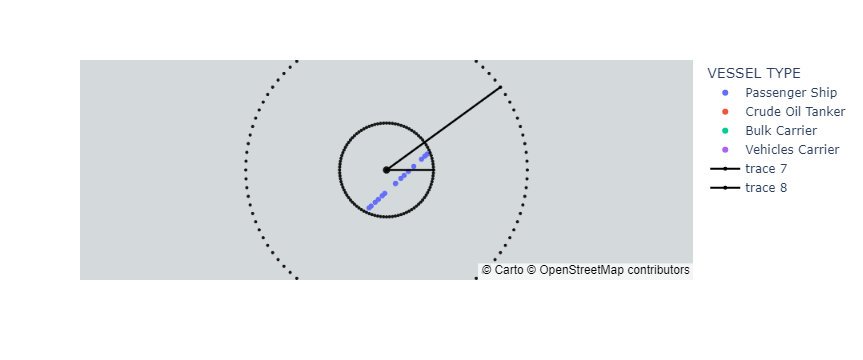

In [21]:
reload(fn)
fn.get_single_isolated_map_plot(1,'scatter',ais,10,30,lat,lon,min_duration,10,90)

In [119]:
ais.head()

,MMSI,SHIPNAME,VESSEL TYPE,SPEED (KNOTSx10),COURSE,HEADING,TIMESTAMP UTC,LENGTH,Year,ship_Loc,LAT,LON,distance(in km),central_caldera_Loc
0,209605000,AKILI,Bulk Carrier,108,83,84,2015-01-01 00:28:00,189.99,2014,"(46.09859, -129.655)",46.09859,-129.6550,31.72,"(45.9549, -130.0089)"
1,256832000,NaN,NaN,115,178,181,2015-01-01 00:28:00,NaN,2014,"(45.07486, -128.943)",45.07486,-128.9430,128.46,"(45.9549, -130.0089)"
2,352358000,ANNA G,Bulk Carrier,132,86,85,2015-01-01 00:28:00,229.00,2014,"(45.86138, -130.5627)",45.86138,-130.5627,44.21,"(45.9549, -130.0089)"
3,356566000,GLOBAL SAIKAI,General Cargo,104,272,275,2015-01-01 00:31:00,188.50,2014,"(46.50261, -129.0129)",46.50261,-129.0129,98.03,"(45.9549, -130.0089)"
4,477293500,JIN XIU FENG,Bulk Carrier,112,299,298,2015-01-01 00:48:00,229.00,2014,"(46.74633, -129.5912)",46.74633,-129.5912,93.66,"(45.9549, -130.0089)"


## Comparison of various options

In [20]:
inner_rad=[5,10,15]
outer_rad=[20,30,40]
min_duration=20


In [21]:
reload(fn)

print(colored('Comparative view with minimum duration: '+ str(min_duration),'green',attrs=['bold']))
table=pd.DataFrame(columns=['hydrophone_idx','inner_rad','outer_rad','no_unique_ships','no_unique_vessels','no_records'])
for i in tqdm(range(1,4,1)):
    for i_r in tqdm(inner_rad):
        for o_r in outer_rad:
            temp_dict=dict()
            ais=fn.choose_df(df,i,verbose=False)
            
            d1=fn.get_isolated_ships(ais,i_r,o_r,min_duration)
            
            temp_dict['hydrophone_idx']=i
            temp_dict['inner_rad']=i_r
            temp_dict['outer_rad']=o_r
            temp_dict['no_unique_ships']=d1['MMSI'].nunique()
            temp_dict['no_unique_vessels']=d1['VESSEL TYPE'].nunique()
            temp_dict['no_records']=len(d1)
            table=table.append(temp_dict,ignore_index=True)
         
table


Comparative view with minimum number of timestamps: 20


100%|██████████| 3/3 [00:22<00:00,  7.41s/it]


,hydrophone_idx,inner_rad,outer_rad,no_unique_ships,no_unique_vessels,no_records
0,1,5,20,29,11,102
1,1,5,30,29,11,103
2,1,5,40,27,10,114
3,1,10,20,215,28,348
4,1,10,30,200,27,329
5,1,10,40,179,27,316
6,1,15,20,437,35,682
7,1,15,30,413,35,646
8,1,15,40,373,34,607
9,2,5,20,54,13,210


In [22]:
reload(fn)

print(colored('Overlapping of all hydrophones with minimum number of timestamps: '+ str(min_duration),'green',attrs=['bold']))
table2=pd.DataFrame(columns=['inner_rad','outer_rad','no_unique_ships','no_unique_vessels','no_records'])

for i_r in inner_rad:
    for o_r in outer_rad:
        combined_df=pd.DataFrame()
        for i in range(1,4,1):
            temp_dict=dict()
            ais=fn.choose_df(df,i,verbose=False)
            d1=fn.get_isolated_ships(ais,i_r,o_r,min_duration)
            combined_df=pd.concat([combined_df,d1])

        temp_dict['inner_rad']=i_r
        temp_dict['outer_rad']=o_r
        temp_dict['no_unique_ships']=combined_df['MMSI'].nunique()
        temp_dict['no_unique_vessels']=combined_df['VESSEL TYPE'].nunique()
        temp_dict['no_records']=len(combined_df)
        table2=table2.append(temp_dict,ignore_index=True)
table2
        

Overlapping of all hydrophones with minimum number of timestamps: 20


,inner_rad,outer_rad,no_unique_ships,no_unique_vessels,no_records
0,5,20,88,19,524
1,5,30,82,19,558
2,5,40,73,19,613
3,10,20,478,37,1374
4,10,30,447,36,1362
5,10,40,396,36,1341
6,15,20,839,42,2683
7,15,30,797,42,2607
8,15,40,718,41,2440


In [ ]:
reload(fn)
df['TIMESTAMP UTC']=df['TIMESTAMP UTC'].astype('datetime64[ns]')
ais = fn.choose_df(df,1)
pings= fn.ais_ping_distribution(ais,show=False)